# Orbit Homework

Megan Ku

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
degrees = UNITS.degree
years = UNITS.year

<Unit('year')>

In [3]:
# And an inition condition (with everything in SI units)

init = State(x=0,
             y=149.6*1000000*1000*m,
             vx=30.3*1000*m/s,
             vy=0*m/s)

x                          0
y       149600000000.0 meter
vx    30300.0 meter / second
vy        0.0 meter / second
dtype: object

In [4]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=50*years)

init       x                          0
y       149600000...
G              6.674e-11 meter ** 2 * newton / kilogram ** 2
m1                                        1.989e+30 kilogram
r_final                                    701879000.0 meter
m2                                        5.972e+24 kilogram
t_0                                                 0 second
t_end                                                50 year
dtype: object

In [5]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with x and y positions
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    print(x, y)
    distance = Vector(x, y)
    print(distance)
    angle = distance.angle
    print(angle.to(degrees))
    
    #computing force vector all at once
    force = distance.hat() * G * m1 * m2 / (distance.mag**2)
    
    return force

In [6]:
universal_gravitation(init, system)

0 149600000000.0 meter
[0.000e+00 1.496e+11] meter
90.0 degree


<Quantity([0.00000000e+00 3.54223686e+22], 'newton')>

In [7]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)
    
    position = Vector(x, y)

    force = universal_gravitation(state, system)
    dxdt = vx
    dydt = vy
    dvxdt = -force.x / m2
    dvydt = -force.y / m2
    
    return dxdt, dydt, dvxdt, dvydt

In [8]:
# Always test the slope function!
slope_func(init, 0, system)

0 149600000000.0 meter
[0.000e+00 1.496e+11] meter
90.0 degree


(<Quantity(30300.0, 'meter / second')>,
 <Quantity(0.0, 'meter / second')>,
 <Quantity(-0.0, 'newton / kilogram')>,
 <Quantity(-0.005931407997083129, 'newton / kilogram')>)

In [9]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func)
details

0.0 149600000000.0
[0.000e+00 1.496e+11] dimensionless
90.0 degree
1.4142135390362066e-05 149600000000.0
[1.41421354e-05 1.49600000e+11] dimensionless
90.0 degree
0.0002828427078072413 149600000000.0
[2.82842708e-04 1.49600000e+11] dimensionless
89.9999999999999 degree
0.000424264061710862 149600000000.0
[4.24264062e-04 1.49600000e+11] dimensionless
89.99999999999984 degree
0.0011313708312289646 149600000000.0
[1.13137083e-03 1.49600000e+11] dimensionless
89.99999999999957 degree
0.0012570787013655184 149600000000.0
[1.2570787e-03 1.4960000e+11] dimensionless
89.99999999999952 degree
0.0014142135390362068 149600000000.0
[1.41421354e-03 1.49600000e+11] dimensionless
89.99999999999946 degree
0.0014142135390362066 149600000000.0
[1.41421354e-03 1.49600000e+11] dimensionless
89.99999999999946 degree
0.00424264061710862 149600000000.0
[4.24264062e-03 1.49600000e+11] dimensionless
89.99999999999838 degree
0.0056568541561448265 149600000000.0
[5.65685416e-03 1.49600000e+11] dimensionless
89.9

-63827986635.08479 -122894408788.64777
[-6.38279866e+10 -1.22894409e+11] dimensionless
-117.44612752676504 degree
-78789604307.70671 -114980757650.88422
[-7.87896043e+10 -1.14980758e+11] dimensionless
-124.42056608859946 degree
-103806358951.31607 -102071066442.47507
[-1.03806359e+11 -1.02071066e+11] dimensionless
-135.48292124485988 degree
-123268441483.87302 -80676610205.39838
[-1.23268441e+11 -8.06766102e+10] dimensionless
-146.7960940595763 degree
-128326074258.62642 -65384097236.58414
[-1.28326074e+11 -6.53840972e+10] dimensionless
-153.00046201877183 degree
-136298834668.60602 -3199580345.9003143
[-1.36298835e+11 -3.19958035e+09] dimensionless
-178.65524318314095 degree
-129056100607.07497 -10769438834.93045
[-1.29056101e+11 -1.07694388e+10] dimensionless
-175.229849041126 degree
-130345890287.89255 6563460488.906662
[-1.30345890e+11  6.56346049e+09] dimensionless
177.1173526897321 degree
-134904690812.51093 35413819747.10828
[-1.34904691e+11  3.54138197e+10] dimensionless
165.29

-92072128964.44502 70290813762.52705
[-9.20721290e+10  7.02908138e+10] dimensionless
142.64072583243953 degree
-116528636125.90526 -29672794151.828762
[-1.16528636e+11 -2.96727942e+10] dimensionless
-165.71384362148603 degree
-116801233515.43616 -18319574573.63931
[-1.16801234e+11 -1.83195746e+10] dimensionless
-171.0861203567497 degree
-111204929777.86247 27888732225.15651
[-1.11204930e+11  2.78887322e+10] dimensionless
165.92133404344142 degree
-108333701086.98239 24588649377.635696
[-1.08333701e+11  2.45886494e+10] dimensionless
167.21215302871778 degree
-105601297088.43944 36748836115.55138
[-1.05601297e+11  3.67488361e+10] dimensionless
160.812304369359 degree
-103522809528.60802 53248669721.77884
[-1.03522810e+11  5.32486697e+10] dimensionless
152.78022607485713 degree
-93224862887.19223 72343981018.96288
[-9.32248629e+10  7.23439810e+10] dimensionless
142.18796657070388 degree
-84113097033.25092 79853308769.20157
[-8.41130970e+10  7.98533088e+10] dimensionless
136.48818899608108

92804604801.54279 -9511532369.045258
[ 9.28046048e+10 -9.51153237e+09] dimensionless
-5.851804914437368 degree
91835302985.86992 -20699606495.624786
[ 9.18353030e+10 -2.06996065e+10] dimensionless
-12.702153566667794 degree
90020644023.10753 -39360718334.36452
[ 9.00206440e+10 -3.93607183e+10] dimensionless
-23.616922033678875 degree
82335510828.82985 -56596597379.299515
[ 8.23355108e+10 -5.65965974e+10] dimensionless
-34.50423861522379 degree
74738277670.13057 -63572842659.59849
[ 7.47382777e+10 -6.35728427e+10] dimensionless
-40.384694796656234 degree
41274899988.86124 -85909228256.39206
[ 4.12749000e+10 -8.59092283e+10] dimensionless
-64.33814506171878 degree
44362367168.29864 -80832610752.51782
[ 4.43623672e+10 -8.08326108e+10] dimensionless
-61.24124070294551 degree
34568624138.75858 -86314234536.53668
[ 3.45686241e+10 -8.63142345e+10] dimensionless
-68.17402805241402 degree
18444414711.545776 -95500868407.58478
[ 1.84444147e+10 -9.55008684e+10] dimensionless
-79.06885337296143 de

-56655675786.08912 -63355945191.33404
[-5.66556758e+10 -6.33559452e+10] dimensionless
-131.80448418637093 degree
-69032745638.3245 -51766256850.74417
[-6.90327456e+10 -5.17662569e+10] dimensionless
-143.13451272423282 degree
-72694135427.32376 -43145399812.7829
[-7.26941354e+10 -4.31453998e+10] dimensionless
-149.31003527693218 degree
-80802136060.71684 -7909095782.103134
[-8.08021361e+10 -7.90909578e+09] dimensionless
-174.40956801915308 degree
-76688645630.45059 -12397617366.817558
[-7.66886456e+10 -1.23976174e+10] dimensionless
-170.8169149235472 degree
-78386921981.16028 -2397453101.8288574
[-7.8386922e+10 -2.3974531e+09] dimensionless
-178.24816266225554 degree
-81992765096.41617 14580338044.64254
[-8.19927651e+10  1.45803380e+10] dimensionless
169.91679650245177 degree
-67794717757.764305 -52925526166.01447
[-6.77947178e+10 -5.29255262e+10] dimensionless
-142.0217920264853 degree
-71317369117.34232 -45421378112.67366
[-7.13173691e+10 -4.54213781e+10] dimensionless
-147.5073134694

[-6.76364503e+10 -2.66157361e+10] dimensionless
-158.51978064357718 degree
-68654015001.59456 -18875093096.851345
[-6.86540150e+10 -1.88750931e+10] dimensionless
-164.62744281413123 degree
-67281823351.19078 11459763324.586533
[-6.72818234e+10  1.14597633e+10] dimensionless
170.33386851797908 degree
-64883303682.06199 7228402665.859901
[-6.48833037e+10  7.22840267e+09] dimensionless
173.64310732141246 degree
-63984572539.52112 15640914019.629662
[-6.39845725e+10  1.56409140e+10] dimensionless
166.2635282824283 degree
-63263258290.87083 29734635941.64247
[-6.32632583e+10  2.97346359e+10] dimensionless
154.8258044813141 degree
-66787155609.26124 -28021077902.5902
[-6.67871556e+10 -2.80210779e+10] dimensionless
-157.23913047547072 degree
-67957325647.43602 -21353534571.516273
[-6.79573256e+10 -2.13535346e+10] dimensionless
-162.5562508231232 degree
-68840109328.34016 6440374664.110222
[-6.88401093e+10  6.44037466e+09] dimensionless
174.65521894520907 degree
-66913178160.42045 4823775055.0

44531801495.57927 -38361111765.750984
[ 4.45318015e+10 -3.83611118e+10] dimensionless
-40.742657059110904 degree
40110341897.43754 -43599084425.52065
[ 4.01103419e+10 -4.35990844e+10] dimensionless
-47.38652465227496 degree
32998384361.690678 -51940907224.11347
[ 3.29983844e+10 -5.19409072e+10] dimensionless
-57.571948678769324 degree
22812953030.961052 -58220063817.635345
[ 2.28129530e+10 -5.82200638e+10] dimensionless
-68.6027645200007 degree
16303303907.224052 -59129326578.41829
[ 1.63033039e+10 -5.91293266e+10] dimensionless
-74.58525379304378 degree
-9227151426.77792 -58489039520.338585
[-9.22715143e+09 -5.84890395e+10] dimensionless
-98.96501844921676 degree
-5625259632.784878 -56776970646.85062
[-5.62525963e+09 -5.67769706e+10] dimensionless
-95.65819569984423 degree
-12729920661.881893 -56094325631.76012
[-1.27299207e+10 -5.60943256e+10] dimensionless
-102.78601522944659 degree
-24693423033.32487 -55179666202.85855
[-2.46934230e+10 -5.51796662e+10] dimensionless
-114.1089678365

36796677643.699394 30357786517.002277
[3.67966776e+10 3.03577865e+10] dimensionless
39.5231199578059 degree
45482890412.187096 22859001490.459145
[4.54828904e+10 2.28590015e+10] dimensionless
26.683399206976624 degree
50110323852.538895 13176626223.948788
[5.01103239e+10 1.31766262e+10] dimensionless
14.732546907427807 degree
50167273267.87516 7201222037.668085
[5.01672733e+10 7.20122204e+09] dimensionless
8.168677843990517 degree
46150165112.47631 -14793742725.463722
[ 4.61501651e+10 -1.47937427e+10] dimensionless
-17.773598545286163 degree
44942108592.628716 -10209544543.260197
[ 4.49421086e+10 -1.02095445e+10] dimensionless
-12.798724634656434 degree
43573295072.564644 -16496059492.77906
[ 4.35732951e+10 -1.64960595e+10] dimensionless
-20.735757150979843 degree
41137630071.39755 -28462212807.384163
[ 4.11376301e+10 -2.84622128e+10] dimensionless
-34.67849944209262 degree
49318246091.97738 14833958353.491137
[4.93182461e+10 1.48339584e+10] dimensionless
16.740253435609254 degree
4968

-38736009852.165985 -16426748143.736912
[-3.87360099e+10 -1.64267481e+10] dimensionless
-157.0196955937619 degree
-40712065923.85397 -11927160515.826694
[-4.07120659e+10 -1.19271605e+10] dimensionless
-163.67132696692326 degree
-43963151402.78621 -5309859145.209564
[-4.39631514e+10 -5.30985915e+09] dimensionless
-173.1131875699996 degree
-44904320279.735054 3136077617.906582
[-4.49043203e+10  3.13607762e+09] dimensionless
176.00500071534125 degree
-43572513515.80108 7576738387.384481
[-4.35725135e+10  7.57673839e+09] dimensionless
170.1355843463925 degree
-35793677375.62961 23975673248.893116
[-3.57936774e+10  2.39756732e+10] dimensionless
146.18464410955195 degree
-35748788590.83821 21396277335.617424
[-3.57487886e+10  2.13962773e+10] dimensionless
149.09873885477333 degree
-33229786440.344284 25773041733.84625
[-3.32297864e+10  2.57730417e+10] dimensionless
142.20282355060317 degree
-29276764501.41043 32931407401.600807
[-2.92767645e+10  3.29314074e+10] dimensionless
131.637817789309

15517500626.513554 -33765687119.75743
[ 1.55175006e+10 -3.37656871e+10] dimensionless
-65.31818238892427 degree
16123574399.510788 -32269783644.752796
[ 1.61235744e+10 -3.22697836e+10] dimensionless
-63.45102656387201 degree
12469944345.402763 -34140525816.301407
[ 1.24699443e+10 -3.41405258e+10] dimensionless
-69.9351052164128 degree
7334454074.074173 -37092196434.951096
[ 7.33445407e+09 -3.70921964e+10] dimensionless
-78.8148627681738 degree
107849019.93596554 -38435619764.64207
[ 1.07849020e+08 -3.84356198e+10] dimensionless
-89.8392304459397 degree
-3814399518.277506 -37544913011.23493
[-3.81439952e+09 -3.75449130e+10] dimensionless
-95.80109709788854 degree
-18353425851.38413 -31731552469.69845
[-1.83534259e+10 -3.17315525e+10] dimensionless
-120.04494751122407 degree
-15997245108.755432 -31543262446.455986
[-1.59972451e+10 -3.15432624e+10] dimensionless
-116.89195979983326 degree
-19929333124.382698 -29625356395.250225
[-1.99293331e+10 -2.96253564e+10] dimensionless
-123.92919548

20560283510.929115 25035444178.710144
[2.05602835e+10 2.50354442e+10] dimensionless
50.605551630331924 degree
28002554559.400314 14415531954.090324
[2.80025546e+10 1.44155320e+10] dimensionless
27.239113471613177 degree
26638645326.503025 14865397344.891426
[2.66386453e+10 1.48653973e+10] dimensionless
29.163211894980893 degree
28385153261.35147 11802497220.922573
[2.83851533e+10 1.18024972e+10] dimensionless
22.577456006448667 degree
31176983584.176205 7515546844.712563
[3.11769836e+10 7.51554684e+09] dimensionless
13.553185514700088 degree
32565309484.20769 1409719865.8609848
[3.25653095e+10 1.40971987e+09] dimensionless
2.47872976669412 degree
31939994317.810024 -1961267999.416584
[ 3.19399943e+10 -1.96126800e+09] dimensionless
-3.5138222424330645 degree
27469375920.183918 -14525131588.150711
[ 2.74693759e+10 -1.45251316e+10] dimensionless
-27.868786728256566 degree
27212180129.33029 -12507852862.354687
[ 2.72121801e+10 -1.25078529e+10] dimensionless
-24.685484368791734 degree
25714

152.0842921379391 degree
-26613092813.167526 -8834178461.434254
[-2.66130928e+10 -8.83417846e+09] dimensionless
-161.63648710623715 degree
-26906150976.65377 -6243448909.818768
[-2.69061510e+10 -6.24344891e+09] dimensionless
-166.93597987547437 degree
-26711038206.112083 4405371596.140736
[-2.67110382e+10  4.40537160e+09] dimensionless
170.6346862767623 degree
-26133155230.329395 3668751460.318243
[-2.61331552e+10  3.66875146e+09] dimensionless
172.00865171789957 degree
-25773216202.19488 6508070505.982162
[-2.57732162e+10  6.50807051e+09] dimensionless
165.8283256571932 degree
-25479669823.50583 10367875616.382454
[-2.54796698e+10  1.03678756e+10] dimensionless
157.8582104470115 degree
-23587301838.54933 14968595555.007084
[-2.35873018e+10  1.49685956e+10] dimensionless
147.60062577795577 degree
-21714831740.415134 16892042511.11526
[-2.17148317e+10  1.68920425e+10] dimensionless
142.12053019043915 degree
-13235793946.818861 23554633819.77296
[-1.32357939e+10  2.35546338e+10] dimensio

-34.06102045139844 degree
17058824224.510986 -17024552330.677464
[ 1.70588242e+10 -1.70245523e+10] dimensionless
-44.94238733337947 degree
13723200401.730171 -20324961208.121056
[ 1.37232004e+10 -2.03249612e+10] dimensionless
-55.973191624031145 degree
11331683410.609053 -21252914520.991543
[ 1.13316834e+10 -2.12529145e+10] dimensionless
-61.93423901619622 degree
1612695229.5290146 -23381462717.285015
[ 1.61269523e+09 -2.33814627e+10] dimensionless
-86.05437340874839 degree
2854160161.486862 -22474471784.570995
[ 2.85416016e+09 -2.24744718e+10] dimensionless
-82.76242820980285 degree
92018763.89068985 -22867052984.778023
[ 9.20187639e+07 -2.28670530e+10] dimensionless
-89.76943866127594 degree
-4550280311.172096 -23543562121.714584
[-4.55028031e+09 -2.35435621e+10] dimensionless
-100.93872505813033 degree
-9149821424.868496 -22610421638.43426
[-9.14982142e+09 -2.26104216e+10] dimensionless
-112.03183752027842 degree
-11253604891.378002 -21129796454.92293
[-1.12536049e+10 -2.11297965e+1

5648822287.63067 19720440098.745518
[5.64882229e+09 1.97204401e+10] dimensionless
74.01590228068156 degree
12917210854.859846 15068452478.421104
[1.29172109e+10 1.50684525e+10] dimensionless
49.39564893805784 degree
11473426586.553087 15274400093.373608
[1.14734266e+10 1.52744001e+10] dimensionless
53.08780975639527 degree
13435733243.961924 13833361169.410774
[1.34357332e+10 1.38333612e+10] dimensionless
45.83540682026691 degree
16865692946.613745 11359129921.98954
[1.68656929e+10 1.13591299e+10] dimensionless
33.96046680093581 degree
19102819858.027294 7919588994.888346
[1.91028199e+10 7.91958899e+09] dimensionless
22.51776970725039 degree
19449603491.537334 5680020898.400118
[1.94496035e+10 5.68002090e+09] dimensionless
16.279804027182564 degree
19271285296.066673 -2979997056.1488285
[ 1.92712853e+10 -2.97999706e+09] dimensionless
-8.790256855943138 degree
18624065230.424507 -1563646304.8243713
[ 1.86240652e+10 -1.56364630e+09] dimensionless
-4.799205274454241 degree
18438507147.177

[-1.54137066e+10 -7.65297270e+09] dimensionless
-153.59540055994256 degree
-14712845779.571281 -7907430673.182945
[-1.47128458e+10 -7.90743067e+09] dimensionless
-151.744157704202 degree
-15632152879.821323 -6243037187.418449
[-1.56321529e+10 -6.24303719e+09] dimensionless
-158.22963801938772 degree
-17074362982.802238 -3916695810.776327
[-1.70743630e+10 -3.91669581e+09] dimensionless
-167.08040984355014 degree
-17805690218.973736 -587426926.2154021
[-1.78056902e+10 -5.87426926e+08] dimensionless
-178.11044220327966 degree
-17452385688.516403 1242131943.3082104
[-1.74523857e+10  1.24213194e+09] dimensionless
175.92897421362593 degree
-14996311874.388338 8059259028.852236
[-1.49963119e+10  8.05925903e+09] dimensionless
151.74570134895558 degree
-14890570349.258392 6966880758.8162155
[-1.48905703e+10  6.96688076e+09] dimensionless
154.92642298925614 degree
-14064044416.039974 8817970705.077652
[-1.40640444e+10  8.81797071e+09] dimensionless
147.91282935134478 degree
-12733801251.607676 1

14668178949.436453 3549560228.090539
[1.46681789e+10 3.54956023e+09] dimensionless
13.603521363565747 degree
14615505420.676613 -2270646297.6578674
[ 1.46155054e+10 -2.27064630e+09] dimensionless
-8.830803152219469 degree
14295430437.233683 -1871054467.1085758
[ 1.42954304e+10 -1.87105447e+09] dimensionless
-7.456758929913647 degree
14113231701.766766 -3424482487.9220867
[ 1.41132317e+10 -3.42448249e+09] dimensionless
-13.638853931009091 degree
13973149093.448757 -5535228022.668184
[ 1.39731491e+10 -5.53522802e+09] dimensionless
-21.610161816702245 degree
12960709688.240292 -8063121761.091046
[ 1.29607097e+10 -8.06312176e+09] dimensionless
-31.886585479319066 degree
11944674773.206678 -9125113907.616184
[ 1.19446748e+10 -9.12511391e+09] dimensionless
-37.37795682993653 degree
7336392259.052061 -12808453047.96698
[ 7.33639226e+09 -1.28084530e+10] dimensionless
-60.19689426841606 degree
7571247092.445678 -12227172508.410788
[ 7.57124709e+09 -1.22271725e+10] dimensionless
-58.233592365961

-7561719135.619259 11062307367.867968
[-7.56171914e+09  1.10623074e+10] dimensionless
124.35483773022746 degree
-6257012346.49296 11577031708.143133
[-6.25701235e+09  1.15770317e+10] dimensionless
118.38979203011861 degree
-951425893.6881027 12769564425.54417
[-9.51425894e+08  1.27695644e+10] dimensionless
94.26108113537181 degree
-1630014499.4299822 12269395328.027645
[-1.63001450e+09  1.22693953e+10] dimensionless
97.5675486427502 degree
-121129836.41657639 12492658033.630274
[-1.21129836e+08  1.24926580e+10] dimensionless
90.55552716647443 degree
2418391341.6678333 12876526116.971842
[2.41839134e+09 1.28765261e+10] dimensionless
79.36296814602613 degree
4935565426.192896 12379402610.86253
[4.93556543e+09 1.23794026e+10] dimensionless
68.26323898596574 degree
6089851294.561384 11575497821.907307
[6.08985129e+09 1.15754978e+10] dimensionless
62.251212334172834 degree
10004151030.535366 7793489243.248935
[1.00041510e+10 7.79348924e+09] dimensionless
37.91950173344423 degree
9185408356.

-9205985748.62906 -6208267688.023781
[-9.20598575e+09 -6.20826769e+09] dimensionless
-146.0053392382921 degree
-10429355353.657906 -4329801893.238139
[-1.04293554e+10 -4.32980189e+09] dimensionless
-157.4539608604053 degree
-10619351321.401365 -3106193455.974553
[-1.06193513e+10 -3.10619346e+09] dimensionless
-163.69563701376862 degree
-10523220537.972137 1624327147.479498
[-1.05232205e+10  1.62432715e+09] dimensionless
171.2252771616054 degree
-10169097864.538715 848884307.6431112
[-1.01690979e+10  8.48884308e+08] dimensionless
175.22819193372703 degree
-10068383494.048628 2184979078.611766
[-1.00683835e+10  2.18497908e+09] dimensionless
167.75587625738743 degree
-9929050656.778917 4560735190.65283
[-9.92905066e+09  4.56073519e+09] dimensionless
155.329145653738 degree
-10260609148.996523 -4588909175.414592
[-1.02606091e+10 -4.58890918e+09] dimensionless
-155.9041092094312 degree
-10474540661.224155 -3567894799.9735813
[-1.04745407e+10 -3.56789480e+09] dimensionless
-161.1898521954785

8534326536.771973 3415308225.4906425
[8.53432654e+09 3.41530823e+09] dimensionless
21.810539418862888 degree
9322851158.878477 2145296859.2517052
[9.32285116e+09 2.14529686e+09] dimensionless
12.958841182165763 degree
9723518042.546616 327422886.92687273
[9.72351804e+09 3.27422887e+08] dimensionless
1.9286089352704125 degree
9531265905.83354 -671852622.7507062
[ 9.53126591e+09 -6.71852623e+08] dimensionless
-4.032072270742726 degree
8192610510.211623 -4395623732.765354
[ 8.19261051e+09 -4.39562373e+09] dimensionless
-28.215123073972176 degree
8134548688.568097 -3799023000.306613
[ 8.13454869e+09 -3.79902300e+09] dimensionless
-25.03366612302655 degree
7683883425.905044 -4810238876.11634
[ 7.68388343e+09 -4.81023888e+09] dimensionless
-32.04725107760852 degree
6958449898.448092 -6499219102.442968
[ 6.9584499e+09 -6.4992191e+09] dimensionless
-43.04559166010693 degree
5680804686.64752 -7852294680.985059
[ 5.68080469e+09 -7.85229468e+09] dimensionless
-54.11584477081441 degree
4744792102.

171.18563783378806 degree
-7806473756.974524 1019386764.9300327
[-7.80647376e+09  1.01938676e+09] dimensionless
172.56028530202525 degree
-7707230116.496587 1867757602.9974537
[-7.70723012e+09  1.86775760e+09] dimensionless
166.37765211973417 degree
-7631100887.203727 3020572775.788369
[-7.63110089e+09  3.02057278e+09] dimensionless
158.40515253535128 degree
-7078575977.6029215 4401212373.424994
[-7.07857598e+09  4.40121237e+09] dimensionless
148.12808811632337 degree
-6523859297.233068 4981313310.575693
[-6.52385930e+09  4.98131331e+09] dimensionless
142.63634234399132 degree
-4007803011.554768 6993367866.640902
[-4.00780301e+09  6.99336787e+09] dimensionless
119.8164292422297 degree
-4136062456.279087 6675824138.5007305
[-4.13606246e+09  6.67582414e+09] dimensionless
121.78062994480605 degree
-3398175723.1336856 7152777961.337763
[-3.39817572e+09  7.15277796e+09] dimensionless
115.41167984788572 degree
-2331981601.7249565 7872657780.446301
[-2.33198160e+09  7.87265778e+09] dimensionl

-61.60041079503998 degree
520744102.3446703 -6973091400.536727
[ 5.20744102e+08 -6.97309140e+09] dimensionless
-85.72913119614765 degree
891293526.2987337 -6699898656.551724
[ 8.91293526e+08 -6.69989866e+09] dimensionless
-82.42238296784917 degree
67340762.61278439 -6821962261.126585
[ 6.73407626e+07 -6.82196226e+09] dimensionless
-89.43444187646148 degree
-1319451459.5163345 -7031810664.566266
[-1.31945146e+09 -7.03181066e+09] dimensionless
-100.62742379142564 degree
-2694076823.3749523 -6760569365.470762
[-2.69407682e+09 -6.76056937e+09] dimensionless
-111.72720817697191 degree
-3324482875.4312468 -6321673711.7995
[-3.32448288e+09 -6.32167371e+09] dimensionless
-117.73927627148461 degree
-5462332293.0465145 -4256729889.5668044
[-5.46233229e+09 -4.25672989e+09] dimensionless
-142.07114212040733 degree
-5015193391.128416 -4413596205.681345
[-5.01519339e+09 -4.41359621e+09] dimensionless
-138.65076757777118 degree
-5573116715.827185 -3793096747.0561485
[-5.57311672e+09 -3.79309675e+09] 

[5.69507309e+09 2.36452570e+09] dimensionless
22.547635822488424 degree
5798842913.574982 1696341447.936207
[5.79884291e+09 1.69634145e+09] dimensionless
16.305835371257 degree
5746401090.186441 -886873955.6721683
[ 5.74640109e+09 -8.86873956e+08] dimensionless
-8.77355208205623 degree
5553008483.722137 -463394579.22279453
[ 5.55300848e+09 -4.63394579e+08] dimensionless
-4.770239265503386 degree
5498031098.205342 -1193008106.4367146
[ 5.49803110e+09 -1.19300811e+09] dimensionless
-12.2427202896645 degree
5421971528.078919 -2490397881.5802093
[ 5.42197153e+09 -2.49039788e+09] dimensionless
-24.670072484207147 degree
5602909728.478958 2506031492.2671795
[5.60290973e+09 2.50603149e+09] dimensionless
24.097689490828152 degree
5719748662.074132 1948492525.9407468
[5.71974866e+09 1.94849253e+09] dimensionless
18.811949600275227 degree
5887134821.456248 -377800848.26157427
[ 5.88713482e+09 -3.77800848e+08] dimensionless
-3.6718628884825173 degree
5738844320.5234 -235675026.2446332
[ 5.7388443

[-5.09089181e+09 -1.17159774e+09] dimensionless
-167.03983219402403 degree
-5309707283.296304 -178917744.28088224
[-5.30970728e+09 -1.78917744e+08] dimensionless
-178.0700716965557 degree
-5204737027.439294 366758357.3062172
[-5.20473703e+09  3.66758357e+08] dimensionless
175.96924340686394 degree
-4473786849.4853115 2400211151.101607
[-4.47378685e+09  2.40021115e+09] dimensionless
151.78619823944067 degree
-4442075219.092343 2074425001.154859
[-4.44207522e+09  2.07442500e+09] dimensionless
154.96768084810526 degree
-4195993827.208416 2626624711.7565227
[-4.19599383e+09  2.62662471e+09] dimensionless
147.95409531151716 degree
-3799875793.6834617 3548935947.6555095
[-3.79987579e+09  3.54893595e+09] dimensionless
136.95571886297446 degree
-3102210271.555461 4287824757.280179
[-3.10221027e+09  4.28782476e+09] dimensionless
125.88546690482026 degree
-2591087705.758644 4505696807.303524
[-2.59108771e+09  4.50569681e+09] dimensionless
119.9018838165883 degree
-506803828.39654016 5034153912.6

4208678265.6481605 -1019880601.2545643
[ 4.20867827e+09 -1.01988060e+09] dimensionless
-13.621786730273719 degree
4167113313.1325297 -1649399609.4243937
[ 4.16711331e+09 -1.64939961e+09] dimensionless
-21.594326867307398 degree
3865403504.5328875 -2403326800.058471
[ 3.8654035e+09 -2.4033268e+09] dimensionless
-31.87141294373869 degree
3562492601.5648737 -2720104581.847579
[ 3.56249260e+09 -2.72010458e+09] dimensionless
-37.36317137901042 degree
2188562402.318598 -3818835728.0112166
[ 2.18856240e+09 -3.81883573e+09] dimensionless
-60.18311752011348 degree
2258600978.456094 -3645433016.5769014
[ 2.25860098e+09 -3.64543302e+09] dimensionless
-58.218886389861645 degree
1855666220.8624072 -3905886280.98766
[ 1.85566622e+09 -3.90588628e+09] dimensionless
-64.5878508094168 degree
1273451791.915946 -4298996566.683643
[ 1.27345179e+09 -4.29899657e+09] dimensionless
-73.4996202417652 degree
443921176.83331656 -4546004777.48242
[ 4.43921177e+08 -4.54600478e+09] dimensionless
-84.42270203950876 d

-3921747939.9577665 393300868.4727311
[-3.92174794e+09  3.93300868e+08] dimensionless
174.27311854079295 degree
-3327829528.1846447 1908554368.6535625
[-3.32782953e+09  1.90855437e+09] dimensionless
150.16515717863976 degree
-3311230971.027894 1665906627.300314
[-3.31123097e+09  1.66590663e+09] dimensionless
153.2926680414224 degree
-3113730115.2845516 2075607648.4301019
[-3.11373012e+09  2.07560765e+09] dimensionless
146.3126387191303 degree
-2795972856.528593 2756974089.835332
[-2.79597286e+09  2.75697409e+09] dimensionless
135.40238598047722 degree
-2255457705.541245 3298331130.895115
[-2.25545771e+09  3.29833113e+09] dimensionless
124.36501737183106 degree
-1866424081.5171213 3451890314.0441556
[-1.86642408e+09  3.45189031e+09] dimensionless
118.3999223131443 degree
-284383846.7191405 3807781173.4980297
[-2.84383847e+08  3.80778117e+09] dimensionless
94.27120134753842 degree
-486728837.35056925 3658598182.1700635
[-4.86728837e+08  3.65859818e+09] dimensionless
97.57795927266993 deg

-3137924519.002895 484291093.888577
[-3.13792452e+09  4.84291094e+08] dimensionless
171.2264872118096 degree
-3032318727.719531 253042012.05580664
[-3.03231873e+09  2.53042012e+08] dimensionless
175.22981352070826 degree
-3002297708.1800056 651460715.1061902
[-3.00229771e+09  6.51460715e+08] dimensionless
167.75732689198685 degree
-2960764498.5055833 1359924657.875474
[-2.96076450e+09  1.35992466e+09] dimensionless
155.32995362791067 degree
-3059566901.2093797 -1368466231.5665345
[-3.05956690e+09 -1.36846623e+09] dimensionless
-155.9022499188032 degree
-3123369203.4284625 -1064012255.0513678
[-3.12336920e+09 -1.06401226e+09] dimensionless
-161.18798969713794 degree
-3214774782.654751 206301438.94744992
[-3.21477478e+09  2.06301439e+08] dimensionless
176.3281981795072 degree
-3133798043.524057 128691231.08993292
[-3.13379804e+09  1.28691231e+08] dimensionless
177.64843692448562 degree
-3121696737.517648 470054789.90708923
[-3.12169674e+09  4.70054790e+08] dimensionless
171.4369218051323

2842139436.674541 -200272716.83429182
[ 2.84213944e+09 -2.00272717e+08] dimensionless
-4.030712015641729 degree
2442991971.7765536 -1310676116.5247426
[ 2.44299197e+09 -1.31067612e+09] dimensionless
-28.213756988790035 degree
2425675163.0094557 -1132774773.092782
[ 2.42567516e+09 -1.13277477e+09] dimensionless
-25.032273513686356 degree
2291298278.7253585 -1434313365.074778
[ 2.29129828e+09 -1.43431337e+09] dimensionless
-32.045859068392076 degree
2074991323.1856093 -1937958042.704789
[ 2.07499132e+09 -1.93795804e+09] dimensionless
-43.04423672728545 degree
1694018961.3000822 -2341441726.9530153
[ 1.69401896e+09 -2.34144173e+09] dimensionless
-54.11448864442868 degree
1414911478.0829692 -2460414854.057213
[ 1.41491148e+09 -2.46041485e+09] dimensionless
-60.09807171250125 degree
276751393.7471576 -2748989142.7941823
[ 2.76751394e+08 -2.74898914e+09] dimensionless
-84.25118141332737 degree
423463921.3241701 -2636856667.2764735
[ 4.23463921e+08 -2.63685667e+09] dimensionless
-80.876530081

158.40569086864627 degree
-2110772613.7661273 1312378650.4389157
[-2.11077261e+09  1.31237865e+09] dimensionless
148.1286040570697 degree
-1945362773.963479 1485360845.262733
[-1.94536277e+09  1.48536085e+09] dimensionless
142.6368451919279 degree
-1195103924.5481544 2085342738.4059126
[-1.19510392e+09  2.08534274e+09] dimensionless
119.81689792894765 degree
-1233349736.7471023 1990653065.9256787
[-1.23334974e+09  1.99065307e+09] dimensionless
121.78113009213003 degree
-1013320084.0966835 2132878272.7795181
[-1.01332008e+09  2.13287827e+09] dimensionless
115.41216518620273 degree
-695391554.2787817 2347543256.6138725
[-6.95391554e+08  2.34754326e+09] dimensionless
106.50039404670473 degree
-242411669.37954032 2482426595.1923156
[-2.42411669e+08  2.48242660e+09] dimensionless
95.57731240208342 degree
13052463.762158036 2452055506.2498446
[1.30524638e+07 2.45205551e+09] dimensionless
89.69501342014472 degree
977307486.4081197 2191184487.6091123
[9.77307486e+08 2.19118449e+09] dimensionle

-89.43408926076403 degree
-393435134.2114825 -2096819289.6083164
[-3.93435134e+08 -2.09681929e+09] dimensionless
-100.62708633011566 degree
-803335481.5611238 -2015940170.2119062
[-8.03335482e+08 -2.01594017e+09] dimensionless
-111.72687280399158 degree
-991317179.1840119 -1885066826.6264086
[-9.91317179e+08 -1.88506683e+09] dimensionless
-117.73894244725102 degree
-1628806426.0027242 -1269324258.9754949
[-1.62880643e+09 -1.26932426e+09] dimensionless
-142.07081400863663 degree
-1495473549.0279608 -1316099556.8122988
[-1.49547355e+09 -1.31609956e+09] dimensionless
-138.6504342869591 degree
-1661841897.1654837 -1131073603.3318403
[-1.6618419e+09 -1.1310736e+09] dimensionless
-145.76023116585327 degree
-1947194760.569443 -819058985.1672237
[-1.94719476e+09 -8.19058985e+08] dimensionless
-157.18665610252773 degree
-2103918536.9474392 -429673520.73442346
[-2.10391854e+09 -4.29673521e+08] dimensionless
-168.45747386272276 degree
-2095774420.106117 -198593303.2362305
[-2.09577442e+09 -1.9859

[ 1.65585148e+09 -1.38178028e+08] dimensionless
-4.770184563424912 degree
1639457975.0681138 -355741639.754045
[ 1.63945798e+09 -3.55741640e+08] dimensionless
-12.24267138391617 degree
1616778037.9832377 -742610977.6201756
[ 1.61677804e+09 -7.42610978e+08] dimensionless
-24.67004536958418 degree
1670730801.8857856 747275347.0863397
[1.67073080e+09 7.47275347e+08] dimensionless
24.097752263215416 degree
1705571188.2946126 581022848.9795921
[1.70557119e+09 5.81022849e+08] dimensionless
18.81201248839019 degree
1755484855.1600628 -112654496.4521513
[ 1.75548486e+09 -1.12654496e+08] dimensionless
-3.6717996231605565 degree
1711266067.4449003 -70274066.76690984
[ 1.71126607e+09 -7.02740668e+07] dimensionless
-2.351560899675578 degree
1704657941.7732494 -256681699.25174832
[ 1.70465794e+09 -2.56681699e+08] dimensionless
-8.563076009731995 degree
1711177551.6303847 -506981468.37269783
[ 1.71117755e+09 -5.06981468e+08] dimensionless
-16.503311669592744 degree
1612589835.8987312 -823464619.6594

[-1.33403917e+09  7.15717927e+08] dimensionless
151.78624472455022 degree
-1324583014.616398 618571739.3403484
[-1.32458301e+09  6.18571739e+08] dimensionless
154.96772823089276 degree
-1251204135.83694 783232244.2131896
[-1.25120414e+09  7.83232244e+08] dimensionless
147.9541426756295 degree
-1133085889.1229186 1058256367.9769132
[-1.13308589e+09  1.05825637e+09] dimensionless
136.95576497314525 degree
-925049172.5830349 1278585804.6263843
[-9.25049173e+08  1.27858580e+09] dimensionless
125.88551305760456 degree
-772637577.1901042 1343553197.802131
[-7.72637577e+08  1.34355320e+09] dimensionless
119.90192999033363 degree
-151125057.60934448 1501134330.7744217
[-1.51125058e+08  1.50113433e+09] dimensionless
95.74882029559346 degree
-231240036.84345376 1439902399.0815706
[-2.31240037e+08  1.43990240e+09] dimensionless
99.12347163466323 degree
-53840389.508309126 1471258804.244328
[-5.38403895e+07  1.47125880e+09] dimensionless
92.09579112710065 degree
246780081.1650803 1524442976.378436

1062299893.2623532 -811107649.794485
[ 1.06229989e+09 -8.11107650e+08] dimensionless
-37.363154111146784 degree
652607730.5016409 -1138738420.9378674
[ 6.52607731e+08 -1.13873842e+09] dimensionless
-60.183101418422176 degree
673492535.3641471 -1087031443.0909257
[ 6.73492535e+08 -1.08703144e+09] dimensionless
-58.21886921469484 degree
553341437.4542344 -1164696044.301784
[ 5.53341437e+08 -1.16469604e+09] dimensionless
-64.58783413984591 degree
379730918.8430346 -1281917673.1523714
[ 3.79730919e+08 -1.28191767e+09] dimensionless
-73.49960534650877 degree
132373210.73470935 -1355573117.8262703
[ 1.32373211e+08 -1.35557312e+09] dimensionless
-84.42268698467448 degree
-7127515.1443455815 -1338988447.0494926
[-7.12751514e+06 -1.33898845e+09] dimensionless
-90.30498596163453 degree
-533676092.44027925 -1196535201.8257082
[-5.33676092e+08 -1.19653520e+09] dimensionless
-114.03772584434086 degree
-452153608.1891012 -1188423624.4494982
[-4.52153608e+08 -1.18842362e+09] dimensionless
-110.830068

438675592.6972251 1100839929.018685
[4.38675593e+08 1.10083993e+09] dimensionless
68.27312776392594 degree
541326337.2057667 1029374216.9349967
[5.41326337e+08 1.02937422e+09] dimensionless
62.261058117387385 degree
889438662.861973 693137057.9688324
[8.89438663e+08 6.93137058e+08] dimensionless
37.92918654447497 degree
816629877.5134109 718679539.2556473
[8.16629878e+08 7.18679539e+08] dimensionless
41.34956627643624 degree
907478269.0383977 617642832.8858821
[9.07478269e+08 6.17642833e+08] dimensionless
34.2397693915332 degree
1063300268.6433305 447261711.8209442
[1.06330027e+09 4.47261712e+08] dimensionless
22.813344435869844 degree
1148882071.4724853 234630865.73546603
[1.14888207e+09 2.34630866e+08] dimensionless
11.54252666524758 degree
1144434832.962503 108445409.78767288
[1.14443483e+09 1.08445410e+08] dimensionless
5.413122917606368 degree
1045646799.427561 -367735592.6877042
[ 1.04564680e+09 -3.67735593e+08] dimensionless
-19.375876706678852 degree
1024798443.5933641 -2884369

-882870354.9445719 405515907.7310741
[-8.82870355e+08  4.05515908e+08] dimensionless
155.3299547538818 degree
-912332217.4556515 -408062974.1906868
[-9.12332217e+08 -4.08062974e+08] dimensionless
-155.90224756036508 degree
-931357429.3398596 -317277845.79354036
[-9.31357429e+08 -3.17277846e+08] dimensionless
-161.18798733527015 degree
-958613674.5580487 61516985.054065466
[-9.58613675e+08  6.15169851e+07] dimensionless
176.32820055322557 degree
-934467220.3389225 38374399.026162386
[-9.3446722e+08  3.8374399e+07] dimensionless
177.6484392763634 degree
-930858736.3073736 140165596.482036
[-9.30858736e+08  1.40165596e+08] dimensionless
171.43692416653005 degree
-934418885.4584284 276846229.5421541
[-9.34418885e+08  2.76846230e+08] dimensionless
163.49668850759522 degree
-880583313.360484 449667473.7944852
[-8.80583313e+08  4.49667474e+08] dimensionless
152.9489947942894 degree
-817734702.1150347 525432641.6872394
[-8.17734702e+08  5.25432642e+08] dimensionless
147.27736589263745 degree
-

683242235.5891027 -427697871.1402054
[ 6.83242236e+08 -4.27697871e+08] dimensionless
-32.04585711912144 degree
618741670.2239704 -577879677.3488779
[ 6.18741670e+08 -5.77879677e+08] dimensionless
-43.04423482465838 degree
505139527.80555445 -698194478.6749609
[ 5.05139528e+08 -6.98194479e+08] dimensionless
-54.114486739854456 degree
421912470.1353655 -733671077.5355802
[ 4.21912470e+08 -7.33671078e+08] dimensionless
-60.09806980692826 degree
82524523.91058195 -819721054.3139331
[ 8.25245239e+07 -8.19721054e+08] dimensionless
-84.25117950083994 degree
126272730.68243283 -786284270.6648996
[ 1.26272731e+08 -7.86284271e+08] dimensionless
-80.87652816157333 degree
29400503.51110196 -803406992.7915555
[ 2.94005035e+07 -8.03406993e+08] dimensionless
-87.90420866889232 degree
-134758642.04662085 -832449154.863398
[-1.34758642e+08 -8.32449155e+08] dimensionless
-99.19539227977168 degree
-297717849.82990795 -804694932.2669474
[-2.97717850e+08 -8.04694932e+08] dimensionless
-110.3032665374847 de

119.81689870222469 degree
-367772558.2763398 593592819.2155781
[-3.67772558e+08  5.93592819e+08] dimensionless
121.781130911384 degree
-302161918.0164129 636002953.8284936
[-3.02161918e+08  6.36002954e+08] dimensionless
115.41216598357151 degree
-207358811.8654387 700013905.8376017
[-2.07358812e+08  7.00013906e+08] dimensionless
106.5003947678109 degree
-72284743.53875586 740234769.4493421
[-7.22847435e+07  7.40234769e+08] dimensionless
95.57731313074314 degree
3892104.712869823 731178415.6663013
[3.89210471e+06 7.31178416e+08] dimensionless
89.69501415456672 degree
291423304.509323 653389292.4434085
[2.91423305e+08 6.53389292e+08] dimensionless
65.96227427520697 degree
246906504.5591902 648959821.5146358
[2.46906505e+08 6.48959822e+08] dimensionless
69.16993132355594 degree
325513601.9454355 620693845.8860382
[3.25513602e+08 6.20693846e+08] dimensionless
62.32590874615559 degree
456565775.9938812 571423036.8003081
[4.56565776e+08 5.71423037e+08] dimensionless
51.375220542960854 degree

-117.73894172629034 degree
-485693773.1324588 -378499798.67689157
[-4.85693773e+08 -3.78499799e+08] dimensionless
-142.0708133032071 degree
-445935243.0719928 -392447724.00826097
[-4.45935243e+08 -3.92447724e+08] dimensionless
-138.6504335676517 degree
-495544620.4672268 -337274836.67251635
[-4.95544620e+08 -3.37274837e+08] dimensionless
-145.76023045460278 degree
-580633990.3203723 -244235200.51683956
[-5.80633990e+08 -2.44235201e+08] dimensionless
-157.18665541670885 degree
-627367453.590128 -128124351.76277007
[-6.27367454e+08 -1.28124352e+08] dimensionless
-168.4574731905903 degree
-624938960.202989 -59218543.04610494
[-6.2493896e+08 -5.9218543e+07] dimensionless
-174.58687694044863 degree
-570994001.0388737 200808548.29814607
[-5.70994001e+08  2.00808548e+08] dimensionless
160.62412342718753 degree
-559609386.0376639 157506139.0490867
[-5.59609386e+08  1.57506139e+08] dimensionless
164.28035674278914 degree
-539926738.9950156 229605320.44242316
[-5.39926739e+08  2.29605320e+08] di

[4.98195206e+08 2.22830033e+08] dimensionless
24.097752517187057 degree
508584260.54076064 173255201.7318253
[5.08584261e+08 1.73255202e+08] dimensionless
18.812012742314256 degree
523468017.46917075 -33592441.22788948
[ 5.23468017e+08 -3.35924412e+07] dimensionless
-3.6717993689856163 degree
510282417.40022945 -20955021.244749665
[ 5.10282417e+08 -2.09550212e+07] dimensionless
-2.3515606460708605 degree
508311940.70190376 -76539911.94594538
[ 5.08311941e+08 -7.65399119e+07] dimensionless
-8.563075755755351 degree
510256023.4599932 -151176798.4213134
[ 5.10256023e+08 -1.51176798e+08] dimensionless
-16.503311414184598 degree
480858153.580281 -245548907.38234842
[ 4.80858154e+08 -2.45548907e+08] dimensionless
-27.051005128529624 degree
446538553.5691332 -286921822.591601
[ 4.46538554e+08 -2.86921823e+08] dimensionless
-32.722634030756595 degree
287179735.6067153 -429934637.89329153
[ 2.87179736e+08 -4.29934638e+08] dimensionless
-56.2586065143522 degree
294430726.1280892 -405084782.35397

[-3.37874876e+08  3.15561458e+08] dimensionless
136.95576529653346 degree
-275840408.877004 381261491.15984464
[-2.75840409e+08  3.81261491e+08] dimensionless
125.88551338143081 degree
-230392796.3548109 400634117.961797
[-2.30392796e+08  4.00634118e+08] dimensionless
119.90193031440538 degree
-45063982.4803949 447623236.0172471
[-4.50639825e+07  4.47623236e+08] dimensionless
95.74882062078309 degree
-68953467.51485014 429364486.57566684
[-6.89534675e+07  4.29364487e+08] dimensionless
99.12347196032115 degree
-16054667.89118439 438714653.1238487
[-1.60546679e+07  4.38714653e+08] dimensionless
92.09579145305436 degree
73587348.20735073 454573641.5628519
[7.35873482e+07 4.54573642e+08] dimensionless
80.80460784170992 degree
162574117.04129517 439417955.7157857
[1.62574117e+08 4.39417956e+08] dimensionless
69.6967335838707 degree
203887080.80972886 412193591.60176027
[2.03887081e+08 4.12193592e+08] dimensionless
63.681199395934435 degree
344863438.09976554 282964733.18504906
[3.44863438e+

165000880.74782833 -347300705.0897437
[ 1.65000881e+08 -3.47300705e+08] dimensionless
-64.58783393991477 degree
113231961.39373797 -382255022.0566921
[ 1.13231961e+08 -3.82255022e+08] dimensionless
-73.4996051617936 degree
39472368.14205262 -404218338.8553735
[ 3.94723681e+07 -4.04218339e+08] dimensionless
-84.4226867984258 degree
-2125352.3878169954 -399272956.1278318
[-2.12535239e+06 -3.99272956e+08] dimensionless
-90.30498577426987 degree
-159136869.26958418 -356794824.4367515
[-1.59136869e+08 -3.56794824e+08] dimensionless
-114.03772565192462 degree
-134827680.25746173 -354376033.16410166
[-1.34827680e+08 -3.54376033e+08] dimensionless
-110.83006860397485 degree
-177752481.49068338 -338940895.35908866
[-1.77752481e+08 -3.38940895e+08] dimensionless
-117.674091180642 degree
-249315848.02000743 -312035695.3312259
[-2.49315848e+08 -3.12035695e+08] dimensionless
-128.62477938277405 degree
-308906923.12007016 -264073038.516854
[-3.08906923e+08 -2.64073039e+08] dimensionless
-139.4740988

243510856.77613097 214303048.17271104
[2.43510857e+08 2.14303048e+08] dimensionless
41.3495665408405 degree
270600938.18797904 184174913.4824772
[2.70600938e+08 1.84174913e+08] dimensionless
34.23976965358019 degree
317065499.48004675 133368968.29828832
[3.17065499e+08 1.33368968e+08] dimensionless
22.813344690510405 degree
342585136.9811516 69964577.79877597
[3.42585137e+08 6.99645778e+07] dimensionless
11.542526915831306 degree
341259015.1161845 32337337.50159733
[3.41259015e+08 3.23373375e+07] dimensionless
5.4131231653801 degree
311801412.6013353 -109655072.64199135
[ 3.11801413e+08 -1.09655073e+08] dimensionless
-19.375876469787514 degree
305584641.3931096 -86009023.23047143
[ 3.05584641e+08 -8.60090232e+07] dimensionless
-15.71964315326316 degree
294836582.5740682 -125380061.39335051
[ 2.94836583e+08 -1.25380061e+08] dimensionless
-23.037755848669622 degree
277654057.112566 -193778835.28858945
[ 2.77654057e+08 -1.93778835e+08] dimensionless
-34.911752682899625 degree
237015029.48

-285849005.2492236 18343748.657500356
[-2.85849005e+08  1.83437487e+07] dimensionless
176.32820069438935 degree
-278648774.21182126 11442861.105259478
[-2.78648774e+08  1.14428611e+07] dimensionless
177.6484394169517 degree
-277572760.4585448 41795977.59469673
[-2.77572760e+08  4.17959776e+07] dimensionless
171.43692430753785 degree
-278634361.41161156 82552774.64408004
[-2.78634361e+08  8.25527746e+07] dimensionless
163.49668864986955 degree
-262581132.65709054 134086340.3591238
[-2.62581133e+08  1.34086340e+08] dimensionless
152.94899493544406 degree
-243840305.74474058 156678755.31594223
[-2.43840306e+08  1.56678755e+08] dimensionless
147.2773660332217 degree
-156819593.8377151 234773442.43629813
[-1.56819594e+08  2.34773442e+08] dimensionless
123.74139355035572 degree
-160779125.9431438 221203737.60042953
[-1.60779126e+08  2.21203738e+08] dimensionless
126.01105232497974 degree
-135109629.2722958 240412839.28631675
[-1.35109629e+08  2.40412839e+08] dimensionless
119.33555447618203 

125810077.48111227 -218773373.27681807
[ 1.25810077e+08 -2.18773373e+08] dimensionless
-60.098069594650546 degree
24607988.15073982 -244432615.65772867
[ 2.46079882e+07 -2.44432616e+08] dimensionless
-84.25117928679975 degree
37653265.59964195 -234462101.3187541
[ 3.76532656e+07 -2.34462101e+08] dimensionless
-80.87652794794145 degree
8766936.843213022 -239567925.82274663
[ 8.76693684e+06 -2.39567926e+08] dimensionless
-87.90420845457747 degree
-40183677.645870626 -248228008.11536878
[-4.01836776e+07 -2.48228008e+08] dimensionless
-99.19539206470706 degree
-88776482.76137933 -239951976.8450165
[-8.87764828e+07 -2.39951977e+08] dimensionless
-110.30326632184934 degree
-111336160.17250375 -225085629.48293787
[-1.11336160e+08 -2.25085629e+08] dimensionless
-116.31880050937714 degree
-188318803.25658363 -154517916.9818725
[-1.88318803e+08 -1.54517917e+08] dimensionless
-140.63069647391598 degree
-172415439.54737425 -159812613.80995083
[-1.72415440e+08 -1.59812614e+08] dimensionless
-137.17

106.5003948963741 degree
-21554587.69110003 220730600.88863823
[-2.15545877e+07  2.20730601e+08] dimensionless
95.57731326055051 degree
1160586.181024775 218030086.86819935
[1.16058618e+06 2.18030087e+08] dimensionless
89.69501428522837 degree
86899512.76672146 194834148.94445625
[8.68995128e+07 1.94834149e+08] dimensionless
65.96227440897223 degree
73625048.49974564 193513325.00917912
[7.36250485e+07 1.93513325e+08] dimensionless
69.16993145517347 degree
97064898.3586618 185084693.9820708
[9.70648984e+07 1.85084694e+08] dimensionless
62.325908879266024 degree
136143345.2802723 170392631.84521994
[1.36143345e+08 1.70392632e+08] dimensionless
51.375220680106985 degree
168684109.91708106 144201771.54395014
[1.68684110e+08 1.44201772e+08] dimensionless
40.525901186120784 degree
179313078.98143286 124045730.02295685
[1.79313079e+08 1.24045730e+08] dimensionless
34.674824090996005 degree
208521341.576356 40102644.90314074
[2.08521342e+08 4.01026449e+07] dimensionless
10.886159518208537 degr

-145.76023025746804 degree
-173139245.45387617 -72828493.40828507
[-1.73139245e+08 -7.28284934e+07] dimensionless
-157.18665522014476 degree
-187074696.67201275 -38205400.237304665
[-1.87074697e+08 -3.82054002e+07] dimensionless
-168.45747299472163 degree
-186350544.31372944 -17658377.59106294
[-1.86350544e+08 -1.76583776e+07] dimensionless
-174.58687674514982 degree
-170264697.55175227 59879099.103387386
[-1.70264698e+08  5.98790991e+07] dimensionless
160.6241236192203 degree
-166869919.23171282 46966753.98708519
[-1.66869919e+08  4.69667540e+07] dimensionless
164.28035693536327 degree
-161000750.91207498 68466008.42726885
[-1.61000751e+08  6.84660084e+07] dimensionless
156.9622442397972 degree
-151617927.86329526 105816373.36299993
[-1.51617928e+08  1.05816373e+08] dimensionless
145.08824740591814 degree
-129426265.31496397 136269115.68613687
[-1.29426265e+08  1.36269116e+08] dimensionless
133.52470225863883 degree
-111268121.73670927 146566595.61361986
[-1.11268122e+08  1.46566596e+

[ 1.52161111e+08 -6.24857740e+06] dimensionless
-2.3515605530235275 degree
151573534.21810147 -22823435.583913714
[ 1.51573534e+08 -2.28234356e+07] dimensionless
-8.563075663227329 degree
152153240.27847525 -45079408.264919
[ 1.52153240e+08 -4.50794083e+07] dimensionless
-16.50331132358445 degree
143387089.70013642 -73220226.8208344
[ 1.43387090e+08 -7.32202268e+07] dimensionless
-27.05100503967563 degree
133153328.4204568 -85557216.14721343
[ 1.33153328e+08 -8.55572161e+07] dimensionless
-32.72263394293893 degree
85634123.62253594 -128202206.65746324
[ 8.56341236e+07 -1.28202207e+08] dimensionless
-56.25860642890439 degree
87796296.43212277 -120792228.39187224
[ 8.77962964e+07 -1.20792228e+08] dimensionless
-53.98894765160132 degree
73779012.00974543 -131281699.436342
[ 7.37790120e+07 -1.31281699e+08] dimensionless
-60.66444550185298 degree
53241728.47657548 -147980660.78770763
[ 5.32417285e+07 -1.47980661e+08] dimensionless
-70.21185605185077 degree
24384929.931990873 -158106986.2581

[-1.3437629e+07  1.3347677e+08] dimensionless
95.74882076662944 degree
-20561234.331377104 128032193.33751643
[-2.05612343e+07  1.28032193e+08] dimensionless
99.12347210043585 degree
-4787341.637925491 130820319.47558829
[-4.78734164e+06  1.30820319e+08] dimensionless
92.09579159608894 degree
21943010.508585453 135549311.1938884
[2.19430105e+07 1.35549311e+08] dimensionless
80.80460799425697 degree
48477974.51506956 131030037.40522963
[4.84779745e+07 1.31030037e+08] dimensionless
69.69673374001538 degree
60797086.92261311 122912004.48981363
[6.07970869e+07 1.22912004e+08] dimensionless
63.68119955434379 degree
102834826.06152771 84377252.19400394
[1.02834826e+08 8.43772522e+07] dimensionless
39.369303595102615 degree
94150511.94855398 87268515.38971871
[94150511.94855398 87268515.38971871] dimensionless
42.827568650077076 degree
105173110.46879567 75634507.29877236
[1.05173110e+08 7.56345073e+07] dimensionless
35.72153620662229 degree
124077158.83730592 55879202.4964132
[1.24077159e+08

-633758.7202436402 -119059200.09049346
[-6.3375872e+05 -1.1905920e+08] dimensionless
-90.30498572907243 degree
-47453021.87755269 -106392646.34037344
[-4.74530219e+07 -1.06392646e+08] dimensionless
-114.03772559890098 degree
-40204264.98354602 -105671386.98290834
[-4.02042650e+07 -1.05671387e+08] dimensionless
-110.83006855673192 degree
-53004011.17215276 -101068783.35808176
[-5.30040112e+07 -1.01068783e+08] dimensionless
-117.6740911297047 degree
-74343490.9411665 -93045921.96701422
[-74343490.9411665  -93045921.96701422] dimensionless
-128.62477932154763 degree
-92112953.23179576 -78743937.68192036
[-92112953.23179576 -78743937.68192036] dimensionless
-139.47409881159774 degree
-97917090.50745119 -67737373.3409249
[-97917090.50745119 -67737373.3409249 ] dimensionless
-145.32517590424703 degree
-113866780.90213151 -21898761.304357335
[-1.13866781e+08 -2.18987613e+07] dimensionless
-169.11384046954416 degree
-109053428.726327 -27120603.770547464
[-1.09053429e+08 -2.71206038e+07] dimens

102155459.63212892 20862737.293618094
[1.02155460e+08 2.08627373e+07] dimensionless
11.542527089548553 degree
101760023.39331816 9642670.752132956
[1.01760023e+08 9.64267075e+06] dimensionless
5.413123334336011 degree
92976061.19835655 -32698045.11975041
[ 92976061.19835655 -32698045.11975041] dimensionless
-19.375876316711285 degree
91122282.20729199 -25647029.788550258
[ 91122282.20729199 -25647029.78855026] dimensionless
-15.719642988442247 degree
87917318.6510869 -37387079.41124049
[ 87917318.6510869  -37387079.41124049] dimensionless
-23.037755691476324 degree
82793661.55253084 -57782909.38777463
[ 82793661.55253084 -57782909.38777463] dimensionless
-34.911752546061095 degree
70675510.20473754 -74412170.04829057
[ 70675510.20473754 -74412170.04829057] dimensionless
-46.475297702939336 degree
60759933.496586286 -80035291.80606191
[ 60759933.49658629 -80035291.80606191] dimensionless
-52.7955307223472 degree
19730907.711226203 -94336939.29937705
[ 19730907.7112262  -94336939.2993770

-83085978.38506047 24616411.197260268
[-83085978.38506047  24616411.19726027] dimensionless
163.4966887306631 degree
-78299066.23153478 39983204.822003625
[-78299066.23153478  39983204.82200363] dimensionless
152.94899501303112 degree
-72710739.18776049 46720036.89535692
[-72710739.18776049  46720036.89535692] dimensionless
147.27736610886413 degree
-46762033.71477647 70007091.1580572
[-46762033.71477647  70007091.1580572 ] dimensionless
123.7413936211622 degree
-47942726.56714464 65960740.95667858
[-47942726.56714464  65960740.95667858] dimensionless
126.01105240162839 degree
-40288339.53313924 71688702.87099692
[-40288339.53313924  71688702.87099692] dimensionless
119.33555455041214 degree
-29073591.21818932 80807467.22359589
[-29073591.21818932  80807467.22359589] dimensionless
109.78814399541207 degree
-13315824.025522683 86337127.05253214
[-13315824.02552268  86337127.05253214] dimensionless
98.7676769941575 degree
-4213312.986352485 85700993.05652635
[-4213312.98635248 85700993.0

2614213.000193566 -71436758.16314746
[  2614213.00019357 -71436758.16314746] dimensionless
-87.9042083241338 degree
-11982370.427185707 -74019108.08512227
[-11982370.42718571 -74019108.08512227] dimensionless
-99.19539195748025 degree
-26472258.67455326 -71551278.39896907
[-26472258.67455326 -71551278.39896907] dimensionless
-110.30326622548338 degree
-33199328.743503798 -67118282.38370548
[-33199328.7435038  -67118282.38370548] dimensionless
-116.31880041999774 degree
-56154782.60333073 -46075696.67704168
[-56154782.60333073 -46075696.67704168] dimensionless
-140.63069640592568 degree
-51412558.66152884 -47654522.2906511
[-51412558.66152884 -47654522.2906511 ] dimensionless
-137.1724313273202 degree
-57431644.301656954 -41301565.602436475
[-57431644.30165695 -41301565.60243648] dimensionless
-144.2784637838425 degree
-67754535.59620774 -30513830.625492685
[-67754535.59620774 -30513830.62549268] dimensionless
-155.75517572312157 degree
-73609026.5682613 -16970378.523152307
[-73609026.5

65.9622744477621 degree
21954252.69044213 57703737.08714937
[21954252.69044213 57703737.08714937] dimensionless
69.16993147955138 degree
28943781.356987134 55190403.66349829
[28943781.35698713 55190403.66349829] dimensionless
62.32590890930794 degree
40596583.158459924 50809377.772612736
[40596583.15845992 50809377.77261274] dimensionless
51.37522073374634 degree
50299913.54626477 42999525.33245494
[50299913.54626477 42999525.33245494] dimensionless
40.52590124730962 degree
53469365.764651984 36989195.45726248
[53469365.76465198 36989195.45726248] dimensionless
34.674824157065956 degree
62178977.42503895 11958207.50193724
[62178977.42503895 11958207.50193724] dimensionless
10.886159599327657 degree
59550561.00910786 14809687.285586476
[59550561.00910786 14809687.28558648] dimensionless
13.965632193472151 degree
61409125.82120693 7649455.08696834
[61409125.82120693  7649455.08696834] dimensionless
7.100499922259947 degree
64468924.5086408 -4196876.127854921
[64468924.5086408  -4196876.1

-174.58687678465202 degree
-50771228.97195314 17855348.212811224
[-50771228.97195314  17855348.21281122] dimensionless
160.62412354889216 degree
-49758940.04741364 14005016.080672048
[-49758940.04741364  14005016.08067205] dimensionless
164.28035689472642 degree
-48008812.77809144 20415878.625301212
[-48008812.77809144  20415878.62530121] dimensionless
156.96224418358085 degree
-45210948.816628955 31553383.734278
[-45210948.81662896  31553383.734278  ] dimensionless
145.08824730030045 degree
-38593617.08286685 40634086.76203117
[-38593617.08286685  40634086.76203117] dimensionless
133.52470213306998 degree
-33179040.35373321 43704692.22354445
[-33179040.35373321  43704692.22354445] dimensionless
127.20446910687141 degree
-10774412.30660674 51514360.691359326
[-10774412.30660674  51514360.69135933] dimensionless
101.81332258662178 degree
-13815983.360921338 48335359.21805612
[-13815983.36092134  48335359.21805612] dimensionless
105.95184048607173 degree
-7363976.694544181 50233585.81661

[ 42756595.26967674 -21833538.9705878 ] dimensionless
-27.0510050924152 degree
39704990.06281308 -25512305.72876727
[ 39704990.06281308 -25512305.72876727] dimensionless
-32.722633993093275 degree
25535238.708120946 -38228615.14293936
[ 25535238.70812095 -38228615.14293936] dimensionless
-56.25860647063844 degree
26179977.002260506 -36019033.780500665
[ 26179977.00226051 -36019033.78050067] dimensionless
-53.988947700203994 degree
22000163.05635591 -39146889.07450635
[ 22000163.05635591 -39146889.07450635] dimensionless
-60.66444554639506 degree
15876150.624658212 -44126352.23433442
[ 15876150.62465821 -44126352.23433442] dimensionless
-70.21185608385869 degree
7271342.062646689 -47145921.15375666
[  7271342.06264669 -47145921.15375666] dimensionless
-81.23232308970378 degree
2300754.293029668 -46798548.88368514
[  2300754.29302967 -46798548.88368514] dimensionless
-87.18543711280309 degree
-16584584.62023338 -42500893.72518283
[-16584584.62023338 -42500893.72518283] dimensionless
-111

[ 6543186.14780089 40419448.18008951] dimensionless
80.80460800260438 degree
14455646.870054325 39071845.96540275
[14455646.87005433 39071845.96540275] dimensionless
69.69673376824318 degree
18129082.90920578 36651129.79489183
[18129082.90920578 36651129.79489183] dimensionless
63.68119959541717 degree
30664316.059109837 25160452.308707558
[30664316.05910984 25160452.30870756] dimensionless
39.36930367458142 degree
28074740.51547632 26022598.048246875
[28074740.51547632 26022598.04824688] dimensionless
42.82756869364385 degree
31361569.089670982 22553453.26499335
[31361569.08967098 22553453.26499335] dimensionless
35.721536269346046 degree
36998567.12073235 16662619.095331691
[36998567.12073235 16662619.09533169] dimensionless
24.244824431036406 degree
40195515.87584182 9266976.6446378
[40195515.87584182  9266976.6446378 ] dimensionless
12.98255560133862 degree
40151011.351611994 4829225.90978393
[40151011.35161199  4829225.90978393] dimensionless
6.858394222741323 degree
37105705.6385

-15805265.50917349 -30137699.95146118
[-15805265.50917349 -30137699.95146118] dimensionless
-117.6740906979402 degree
-22168484.841224737 -27745363.02549944
[-22168484.84122474 -27745363.02549944] dimensionless
-128.62477885986726 degree
-27467160.71370998 -23480654.47442057
[-27467160.71370998 -23480654.47442057] dimensionless
-139.47409834168786 degree
-29197896.395507332 -20198607.1455142
[-29197896.39550733 -20198607.1455142 ] dimensionless
-145.32517542877207 degree
-33953934.58739842 -6529991.781701639
[-33953934.58739842  -6529991.78170164] dimensionless
-169.11383997469662 degree
-32518641.127627105 -8087092.932678666
[-32518641.1276271   -8087092.93267867] dimensionless
-166.03436738797157 degree
-33533543.47125751 -4177121.018069081
[-33533543.47125751  -4177121.01806908] dimensionless
-172.8994996536496 degree
-35204400.916922525 2291778.4575214237
[-35204400.91692252   2291778.45752142] dimensionless
176.27534603798247 degree
-34661366.22958662 9088568.196526375
[-34661366.

27171752.801724546 -7647687.55656882
[27171752.80172455 -7647687.55656882] dimensionless
-15.719642779377923 degree
26216064.757545207 -11148452.86480787
[ 26216064.75754521 -11148452.86480787] dimensionless
-23.03775543972538 degree
24688241.51617558 -17230285.21532942
[ 24688241.51617558 -17230285.21532942] dimensionless
-34.91175217093531 degree
21074730.09591027 -22188964.34618511
[ 21074730.09591027 -22188964.34618511] dimensionless
-46.47529727353357 degree
18118004.37250299 -23865723.00260752
[ 18118004.37250299 -23865723.00260752] dimensionless
-52.79553025783819 degree
5883559.524954379 -28130331.289050817
[  5883559.52495438 -28130331.28905082] dimensionless
-78.18667665999823 degree
7544463.334143732 -26394381.108929344
[  7544463.33414373 -26394381.10892934] dimensionless
-74.04815888532174 degree
4021230.566357862 -27430941.480625615
[  4021230.56635786 -27430941.48062561] dimensionless
-81.660145157733 degree
-2233186.157762002 -29450584.375594072
[ -2233186.157762   -294

-13943970.488079282 20875414.046493165
[-13943970.48807928  20875414.04649317] dimensionless
123.74139355642939 degree
-14296041.274690945 19668832.91286403
[-14296041.27469094  19668832.91286403] dimensionless
126.0110523146364 degree
-12013579.656562576 21376853.831978373
[-12013579.65656258  21376853.83197837] dimensionless
119.33555446753896 degree
-8669453.944427097 24095978.1020606
[-8669453.9444271 24095978.1020606] dimensionless
109.78814394640646 degree
-3970645.451360383 25744867.32469933
[-3970645.45136038 25744867.32469933] dimensionless
98.76767694275708 degree
-1256367.7469556537 25555178.530702736
[-1256367.74695565 25555178.53070274] dimensionless
92.81456292104073 degree
9056306.879525928 23208367.632721834
[ 9056306.87952593 23208367.63272183] dimensionless
68.68340980469277 degree
7487702.873910703 22877556.0381646
[ 7487702.8739107 22877556.0381646] dimensionless
71.87700253575325 degree
10317137.308420243 22006606.792117413
[10317137.30842024 22006606.79211741] dim

-9899707.616775822 -20014000.16935383
[ -9899707.61677582 -20014000.16935383] dimensionless
-116.3188004283579 degree
-16744794.239565222 -13739311.721435241
[-16744794.23956522 -13739311.72143524] dimensionless
-140.63069631361333 degree
-15330710.546962172 -14210101.705771398
[-15330710.54696217 -14210101.7057714 ] dimensionless
-137.17243132565713 degree
-17125541.64493537 -12315713.60474873
[-17125541.64493537 -12315713.60474873] dimensionless
-144.27846373225847 degree
-20203724.491652492 -9098919.026725395
[-20203724.49165249  -9098919.02672539] dimensionless
-155.75517551639246 degree
-21949475.12421293 -5060397.1653982885
[-21949475.12421293  -5060397.16539829] dimensionless
-167.01744432086076 degree
-21925172.643786337 -2637084.589297577
[-21925172.64378634  -2637084.58929758] dimensionless
-173.14160568280712 degree
-20262229.420964397 6548025.936864171
[-20262229.4209644    6548025.93686417] dimensionless
162.0910277684765 degree
-19827524.619776547 5036615.9663959425
[-198

51.375221043519595 degree
14998930.833600178 12822028.250877233
[14998930.83360018 12822028.25087723] dimensionless
40.5259015179409 degree
15944029.78077758 11029808.020178333
[15944029.78077758 11029808.02017833] dimensionless
34.674824402849524 degree
18541148.85043023 3565817.8698531147
[18541148.85043023  3565817.86985311] dimensionless
10.886159769639008 degree
17757381.359822888 4416100.6224524565
[17757381.35982289  4416100.62245246] dimensionless
13.965632427675384 degree
18311586.79971429 2280991.0233390406
[18311586.79971429  2280991.02333904] dimensionless
7.100500120633681 degree
19223988.174194872 -1251466.4351675846
[19223988.17419487 -1251466.43516758] dimensionless
-3.7246543120831372 degree
18927454.414941974 -4962974.167419182
[18927454.41494197 -4962974.16741918] dimensionless
-14.692776112855459 degree
17966564.06268061 -6765826.887788085
[17966564.06268061 -6765826.88778809] dimensionless
-20.63530948532371 degree
13131846.76853343 -13102535.763650158
[ 13131846.7

156.9622441540564 degree
-13481452.509099307 9408903.300460298
[-13481452.50909931   9408903.3004603 ] dimensionless
145.088247223012 degree
-11508230.393183898 12116678.078571511
[-11508230.3931839   12116678.07857151] dimensionless
133.52470202253542 degree
-9893657.786698718 13032301.899030602
[-9893657.78669872 13032301.8990306 ] dimensionless
127.204468974312 degree
-3212821.875142891 15361066.864036141
[-3212821.87514289 15361066.86403614] dimensionless
101.81332238202707 degree
-4119787.9407994244 14413120.426238608
[-4119787.94079942 14413120.42623861] dimensionless
105.95184033650979 degree
-2195864.1090882514 14979152.599365257
[-2195864.10908825 14979152.59936526] dimensionless
98.33985396657684 degree
1219471.277228687 16082014.43896098
[ 1219471.27722869 16082014.43896098] dimensionless
85.66365886808575 degree
-11735064.559235074 11805402.511217393
[-11735064.55923507  11805402.51121739] dimensionless
134.82880306568103 degree
-10369986.743986856 12660359.175017908
[-1036

[  7806607.41532606 -10740515.28996719] dimensionless
-53.9889464481576 degree
6560228.728127714 -11673210.478370197
[  6560228.72812771 -11673210.4783702 ] dimensionless
-60.664444364062696 degree
4734109.469295802 -13158036.643270895
[  4734109.4692958  -13158036.64327089] dimensionless
-70.21185518527369 degree
2168241.678094933 -14058441.918204023
[  2168241.67809493 -14058441.91820402] dimensionless
-81.23232214885506 degree
686062.1445359332 -13954859.007982211
[   686062.14453593 -13954859.00798221] dimensionless
-87.18543614681839 degree
-4945356.964953873 -12673341.34105763
[ -4945356.96495387 -12673341.34105763] dimensionless
-111.31658920532549 degree
-4088792.912005352 -12492695.781109955
[ -4088792.91200535 -12492695.78110996] dimensionless
-108.12299653527928 degree
-5633855.828573376 -12017098.505251212
[ -5633855.82857338 -12017098.50525121] dimensionless
-115.11812185349896 degree
-8211914.319965983 -11251125.082483726
[ -8211914.31996598 -11251125.08248373] dimensionl

[9143791.90635784 7502595.55367354] dimensionless
39.36930625640844 degree
8371606.403634239 7759678.740939374
[8371606.40363424 7759678.74093937] dimensionless
42.82757114244664 degree
9351705.835165478 6725214.527512644
[9351705.83516548 6725214.52751264] dimensionless
35.72153878621324 degree
11032602.291507816 4968626.825366404
[11032602.29150782  4968626.8253664 ] dimensionless
24.24482717136513 degree
11985900.523606041 2763320.307171703
[11985900.52360604  2763320.3071717 ] dimensionless
12.98255843116579 degree
11972629.788130302 1440027.4516991964
[11972629.7881303  1440027.4516992] dimensionless
6.858397110481508 degree
11064550.374326933 -3575665.2807734422
[11064550.37432693 -3575665.28077344] dimensionless
-17.908969320703715 degree
10827172.060578275 -2750333.0640066415
[10827172.06057828 -2750333.06400664] dimensionless
-14.252891505993597 degree
10484253.596964154 -4143247.8079766612
[10484253.59696415 -4143247.80797666] dimensionless
-21.56332103636906 degree
9937960.6

-8706520.390765708 -6023022.77301074
[-8706520.39076571 -6023022.77301074] dimensionless
-145.32517391407077 degree
-10124723.508614514 -1947178.4949678835
[-10124723.50861451  -1947178.49496788] dimensionless
-169.11383837633338 degree
-9696733.35612777 -2411490.4642399168
[-9696733.35612777 -2411490.46423992] dimensionless
-166.03436581453272 degree
-9999367.112270124 -1245575.974854013
[-9999367.11227012 -1245575.97485401] dimensionless
-172.899498043817 degree
-10497600.130030524 683385.0992495632
[-10497600.13003052    683385.09924956] dimensionless
176.27534770825753 degree
-10335672.683140067 2710119.7874739794
[-10335672.68314007   2710119.78747398] dimensionless
165.30722602270424 degree
-9810961.490271755 3694599.5377859697
[-9810961.49027175  3694599.53778597] dimensionless
159.3646927250048 degree
-7170878.440630533 7154872.030040259
[-7170878.44063053  7154872.03004026] dimensionless
135.06401754604192 degree
-7277683.439136692 6508183.763531173
[-7277683.43913669  6508183

6284273.762702636 -6616527.033513303
[ 6284273.76270264 -6616527.0335133 ] dimensionless
-46.47529623561726 degree
5402607.762361845 -7116519.697216525
[ 5402607.76236185 -7116519.69721652] dimensionless
-52.79552911136933 degree
1754418.7935593845 -8388183.300237822
[ 1754418.79355938 -8388183.30023782] dimensionless
-78.1866752340549 degree
2249683.6362057487 -7870540.344334956
[ 2249683.63620575 -7870540.34433496] dimensionless
-74.04815780911946 degree
1199090.9000721257 -8179632.290815273
[ 1199090.90007213 -8179632.29081527] dimensionless
-81.66014392769786 degree
-665913.4947284702 -8781869.611329518
[ -665913.49472847 -8781869.61132952] dimensionless
-94.3363381816304 degree
6408140.558362459 -6446549.512078068
[ 6408140.55836246 -6446549.51207807] dimensionless
-45.171195445583265 degree
5662715.590855888 -6913413.799798568
[ 5662715.59085589 -6913413.79979857] dimensionless
-50.679400428310046 degree
2407838.0004266826 -8343635.529720813
[ 2407838.00042668 -8343635.52972081] 

-2585144.4437452024 7185179.546776247
[-2585144.4437452   7185179.54677625] dimensionless
109.78814416438185 degree
-1184006.7710938184 7676861.816146741
[-1184006.77109382  7676861.81614674] dimensionless
98.76767716429093 degree
-374636.3197019263 7620298.518026942
[-374636.31970193 7620298.51802694] dimensionless
92.81456314230203 degree
2700500.0654678093 6920502.995257019
[2700500.06546781 6920502.99525702] dimensionless
68.68340998244659 degree
2232758.051102387 6821858.280825208
[2232758.05110239 6821858.28082521] dimensionless
71.87700267535313 degree
3076467.0874259053 6562149.932371372
[3076467.08742591 6562149.93237137] dimensionless
64.8818773165836 degree
4484261.7001929935 6143876.531142035
[4484261.70019299 6143876.53114203] dimensionless
53.87522942016568 degree
5677814.524967365 5262978.744648467
[5677814.52496736 5262978.74464847] dimensionless
42.828588987476614 degree
6083635.096315624 4560901.697497763
[6083635.09631562 4560901.69749776] dimensionless
36.8588980803

-5106664.950885201 -3672422.81337223
[-5106664.9508852  -3672422.81337223] dimensionless
-144.27846078820332 degree
-6024548.346343135 -2713206.8963303273
[-6024548.34634314 -2713206.89633033] dimensionless
-155.75517275880878 degree
-6545113.779947253 -1508960.1027710547
[-6545113.77994725 -1508960.10277105] dimensionless
-167.01744166243765 degree
-6537867.056997066 -786352.5337052459
[-6537867.05699707  -786352.53370525] dimensionless
-173.1416030833413 degree
-6041994.1492499085 1952555.5520138503
[-6041994.14924991  1952555.55201385] dimensionless
162.0910302464215 degree
-5912369.50854055 1501868.207750875
[-5912369.50854055  1501868.20775088] dimensionless
165.74710836648552 degree
-5725112.790200328 2262494.044614202
[-5725112.79020033  2262494.0446142 ] dimensionless
158.43667871021654 degree
-5426799.8046356365 3583349.369945261
[-5426799.80463564  3583349.36994526] dimensionless
146.56297126234472 degree
-6490320.019187319 -1635716.90689721
[-6490320.01918732 -1635716.906897

10.886159745441901 degree
5295073.422140218 1316837.0302568325
[5295073.42214022 1316837.03025683] dimensionless
13.965632599583703 degree
5460331.939365057 680168.7029544222
[5460331.93936506  680168.70295442] dimensionless
7.10050017957547 degree
5732400.906537259 -373174.7993067587
[5732400.90653726 -373174.79930676] dimensionless
-3.7246546234090556 degree
5643977.489860309 -1479909.284419902
[ 5643977.48986031 -1479909.2844199 ] dimensionless
-14.69277663248058 degree
5357449.584161317 -2017501.93273697
[ 5357449.58416132 -2017501.93273697] dimensionless
-20.635310149805985 degree
3915785.176523499 -3907045.1000882653
[ 3915785.1765235  -3907045.10008827] dimensionless
-44.93598617555393 degree
3974107.9612888815 -3553909.441197337
[ 3974107.96128888 -3553909.44119734] dimensionless
-41.80518210255555 degree
3535167.7989386213 -4049572.5854157186
[ 3535167.79893862 -4049572.58541572] dimensionless
-48.87991635980361 degree
2831280.474757832 -4887089.820458695
[ 2831280.47475783 -4

127.20446332175989 degree
-958030.7245166604 4580516.398818098
[-958030.72451666 4580516.3988181 ] dimensionless
101.81331515099191 degree
-1228479.0677860067 4297848.2042569555
[-1228479.06778601  4297848.20425696] dimensionless
105.95183481426821 degree
-654784.1795542473 4466633.289152026
[-654784.17955425 4466633.28915203] dimensionless
98.33984760950477 degree
363634.88400999457 4795495.609949778
[ 363634.88400999 4795495.60994978] dimensionless
85.66364978319734 degree
-3499278.527430177 3520253.047031147
[-3499278.52743018  3520253.04703115] dimensionless
134.8287994204176 degree
-3092226.0006552003 3775192.5248888675
[-3092226.0006552   3775192.52488887] dimensionless
129.32059475764024 degree
-1314842.3401316204 4556190.316682773
[-1314842.34013162  4556190.31668277] dimensionless
106.09727873977081 degree
-1409608.9554243446 4374108.927420456
[-1409608.95542434  4374108.92742046] dimensionless
107.86215716022144 degree
-910192.7381366319 4538654.222554235
[-910192.73813663 45

[  646548.02986997 -4192086.6530808 ] dimensionless
-81.23232126964768 degree
204576.92108700098 -4161199.271986471
[  204576.921087   -4161199.27198647] dimensionless
-87.18543536559834 degree
-1474655.9097329094 -3779063.5474374807
[-1474655.90973291 -3779063.54743748] dimensionless
-111.3165886543682 degree
-1219237.063706332 -3725196.8480001315
[-1219237.06370633 -3725196.84800013] dimensionless
-108.12299570570512 degree
-1679959.3696775413 -3583378.5065538315
[-1679959.36967754 -3583378.50655383] dimensionless
-115.11812113913717 degree
-2448710.6407142435 -3354972.899087058
[-2448710.64071424 -3354972.89908706] dimensionless
-126.12476942003501 degree
-3100471.364497723 -2873943.0363910003
[-3100471.36449772 -2873943.036391  ] dimensionless
-137.1714099162916 degree
-3322076.9008986703 -2490561.402966404
[-3322076.90089867 -2490561.4029664 ] dimensionless
-143.1411008595897 degree
-3941991.0618388327 -891376.8757892661
[-3941991.06183883  -891376.87578927] dimensionless
-167.258

[3289811.55345275 1481594.90905844] dimensionless
24.24482907946098 degree
3574075.5584982093 823994.6043942389
[3574075.55849821  823994.60439424] dimensionless
12.982560704549625 degree
3570118.3752051108 429401.93159206514
[3570118.37520511  429401.93159207] dimensionless
6.85839960932155 degree
3299338.2634530277 -1066227.433565692
[ 3299338.26345303 -1066227.43356569] dimensionless
-17.908966295230478 degree
3228554.4132707454 -820121.6725532212
[3228554.41327075 -820121.67255322] dimensionless
-14.252889208078573 degree
3126299.578271006 -1235474.900107318
[ 3126299.57827101 -1235474.90010732] dimensionless
-21.563318451966218 degree
2963400.5387098966 -1956751.3158290694
[ 2963400.5387099  -1956751.31582907] dimensionless
-33.43702428464559 degree
3544154.4713850706 893212.3584969341
[3544154.47138507  893212.35849693] dimensionless
14.145342126423712 degree
3554372.321809894 546350.0203922332
[3554372.32180989  546350.02039223] dimensionless
8.738658770085014 degree
3399951.544

-2981711.2275947263 -371417.6775039821
[-2981711.22759473  -371417.67750398] dimensionless
-172.89950970001124 degree
-3130279.202649852 203779.22094687354
[-3130279.20264985   203779.22094687] dimensionless
176.27533622689165 degree
-3081993.9359987285 808131.1982850452
[-3081993.93599873   808131.19828505] dimensionless
165.30721457909814 degree
-2925530.2530948804 1101693.169273181
[-2925530.25309488  1101693.16927318] dimensionless
159.36468129652175 degree
-2138283.7101688785 2133511.616108795
[-2138283.71016888  2133511.6161088 ] dimensionless
135.06400604768257 degree
-2170131.9230700955 1940675.6594842635
[-2170131.9230701   1940675.65948426] dimensionless
138.1948095600198 degree
-1930440.8283208078 2211341.270636349
[-1930440.82832081  2211341.27063635] dimensionless
131.12007566539614 degree
-1546070.6277648301 2668682.3215570417
[-1546070.62776483  2668682.32155704] dimensionless
120.08536781958058 degree
-1008235.4002003114 2963965.3996287226
[-1008235.40020031  2963965.39

670833.2096436108 -2346916.4215136017
[  670833.20964361 -2346916.4215136 ] dimensionless
-74.0481567429657 degree
357556.99381900276 -2439084.547046002
[  357556.993819 -2439084.547046] dimensionless
-81.66014210707137 degree
-198568.5594038749 -2618665.6663833037
[ -198568.55940387 -2618665.6663833 ] dimensionless
-94.33633419866653 degree
1910843.3799828002 -1922296.550819818
[ 1910843.3799828  -1922296.55081982] dimensionless
-45.171195523776476 degree
1688565.1230366216 -2061510.8071356518
[ 1688565.12303662 -2061510.80713565] dimensionless
-50.679400343679866 degree
717993.2346385049 -2487988.624412017
[  717993.2346385  -2487988.62441202] dimensionless
-73.90271641725182 degree
769742.2560545388 -2388559.83849489
[  769742.25605454 -2388559.83849489] dimensionless
-72.13783720049015 degree
497027.1603149944 -2478412.7503039306
[  497027.16031499 -2478412.75030393] dimensionless
-78.66018159911489 degree
118071.14133151947 -2631132.812594336
[  118071.14133152 -2631132.81259434] 

805261.8685108323 2063624.8198335723
[ 805261.86851083 2063624.81983357] dimensionless
68.68341620808262 degree
665785.9167378813 2034209.9238753694
[ 665785.91673788 2034209.92387537] dimensionless
71.87700795535098 degree
917371.5072329149 1956767.517575771
[ 917371.50723291 1956767.51757577] dimensionless
64.88188277228787 degree
1337161.7373709034 1832042.6478351597
[1337161.7373709  1832042.64783516] dimensionless
53.87523626905692 degree
1693067.2681547224 1569367.7890012916
[1693067.26815472 1569367.78900129] dimensionless
42.828595982074255 degree
1814078.92466508 1360015.459089869
[1814078.92466508 1360015.45908987] dimensionless
36.85890516475796 degree
2152594.148827361 486752.3982110985
[2152594.14882736  486752.3982111 ] dimensionless
12.741645712546736 degree
2050261.8659009472 591227.1401020035
[2050261.86590095  591227.140102  ] dimensionless
16.085797001473967 degree
2126886.134605512 339683.5292025979
[2126886.13460551  339683.5292026 ] dimensionless
9.074036928170594

-1949526.525323942 -234482.48074598063
[-1949526.52532394  -234482.48074598] dimensionless
-173.14160235840845 degree
-1801662.1940833966 582232.5144927641
[-1801662.1940834    582232.51449276] dimensionless
162.09103059833507 degree
-1763009.427904365 447842.03040926694
[-1763009.42790436   447842.03040927] dimensionless
165.74710962897757 degree
-1707171.3520861948 674653.0520358037
[-1707171.35208619   674653.0520358 ] dimensionless
158.43667972465872 degree
-1618217.3916631604 1068518.935656002
[-1618217.39166316  1068518.935656  ] dimensionless
146.56297089697452 degree
-1935348.4535255297 -487754.48211018875
[-1935348.45352553  -487754.48211019] dimensionless
-165.85465730789488 degree
-1940928.0985546901 -298344.1691998494
[-1940928.09855469  -298344.16919985] dimensionless
-171.2613400035421 degree
-1856603.9525564066 465881.0125287466
[-1856603.95255641   465881.01252875] dimensionless
165.91351864933532 degree
-1816912.2648862018 401313.8967303189
[-1816912.2648862    401313.

-3.724677563211141 degree
1682977.3583728618 -441294.8295457795
[1682977.35837286 -441294.82954578] dimensionless
-14.69280071072372 degree
1597537.5205992544 -601599.5527750757
[1597537.52059925 -601599.55277508] dimensionless
-20.635334999594804 degree
1167647.297695647 -1165042.2222707993
[ 1167647.29769565 -1165042.2222708 ] dimensionless
-44.93601387418748 degree
1185038.6208899156 -1059740.6563374018
[ 1185038.62088992 -1059740.6563374 ] dimensionless
-41.805208035901934 degree
1054150.9759414743 -1207542.3955009347
[ 1054150.97594147 -1207542.39550093] dimensionless
-48.879943618297396 degree
844258.6650539036 -1457281.6223051455
[  844258.6650539  -1457281.62230515] dimensionless
-59.91465576778256 degree
550564.0712073249 -1618526.0806417796
[  550564.07120732 -1618526.08064178] dimensionless
-71.21355180973808 degree
366167.26329038065 -1634333.7990889014
[  366167.26329038 -1634333.7990889 ] dimensionless
-77.37160963713633 degree
-346178.21560471295 -1570125.5671124808
[ -3

98.33981188377525 degree
108433.1369884212 1429968.600988644
[ 108433.13698842 1429968.60098864] dimensionless
85.6636151736195 degree
-1043449.1174244611 1049704.7446951838
[-1043449.11742446  1049704.74469518] dimensionless
134.82876558661292 degree
-922070.1223565014 1125725.0538261132
[-922070.1223565  1125725.05382611] dimensionless
129.3205620984651 degree
-392072.10022404173 1358610.452338522
[-392072.10022404 1358610.45233852] dimensionless
106.0972493468257 degree
-420330.52026133286 1304315.6677233144
[-420330.52026133 1304315.66772331] dimensionless
107.86212472834563 degree
-271409.6173863204 1353381.3280033085
[-271409.61738632 1353381.32800331] dimensionless
101.33978191306116 degree
-64474.08072785707 1436776.6490215147
[ -64474.08072786 1436776.64902151] dimensionless
92.5693736925512 degree
213297.6271647915 1444845.3825445294
[ 213297.62716479 1444845.38254453] dimensionless
81.60227330894013 degree
354856.8151739048 1389305.6706516743
[ 354856.8151739  1389305.670651

[ -363563.64225231 -1110816.61703874] dimensionless
-108.12296248458493 degree
-500946.47263017436 -1068527.8742560726
[ -500946.47263017 -1068527.87425607] dimensionless
-115.11808935189875 degree
-730180.5488190785 -1000419.6984035566
[ -730180.54881908 -1000419.69840356] dimensionless
-126.12474260158183 degree
-924529.1727638432 -856981.4598880464
[-924529.17276384 -856981.45988805] dimensionless
-137.17138520766932 degree
-990609.7825925024 -742660.8879194753
[-990609.7825925  -742660.88791948] dimensionless
-143.14107755314873 degree
-1175462.1345615932 -265800.02927601954
[-1175462.13456159  -265800.02927602] dimensionless
-167.25834190543785 degree
-1119581.6977891608 -322850.369703225
[-1119581.69778916  -322850.36970322] dimensionless
-163.9141864963781 degree
-1161423.7848279732 -185490.49087243725
[-1161423.78482797  -185490.49087244] dimensionless
-170.92594898081322 degree
-1232185.5107061523 46716.54253476183
[-1232185.51070615    46716.54253476] dimensionless
177.828752

[ 983829.74948681 -317937.97528431] dimensionless
-17.908944853542064 degree
962722.7035062059 -244551.6955582319
[ 962722.70350621 -244551.69555823] dimensionless
-14.252866734257369 degree
932231.3887352673 -368405.8801033285
[ 932231.38873527 -368405.88010333] dimensionless
-21.56329576424794 degree
883656.5908577723 -583483.3190813143
[ 883656.59085777 -583483.31908131] dimensionless
-33.437002727525176 degree
1056831.2489317493 266347.3399198293
[1056831.24893175  266347.33991983] dimensionless
14.145362023304866 degree
1059878.1478227878 162916.45534020528
[1059878.14782279  162916.45534021] dimensionless
8.73867796597891 degree
1013831.5701348356 -254402.32849456614
[1013831.57013484 -254402.32849457] dimensionless
-14.086466751689501 degree
992157.2132687231 -219144.2500345033
[ 992157.21326872 -219144.2500345 ] dimensionless
-12.455313088831426 degree
968325.3641816787 -330031.8681302384
[ 968325.36418168 -330031.86813024] dimensionless
-18.820519451826442 degree
943238.657806

-872364.1810899067 328513.07817048545
[-872364.18108991  328513.07817049] dimensionless
159.36473459408666 degree
-637615.4438371956 636191.247198578
[-637615.4438372   636191.24719858] dimensionless
135.0640602872962 degree
-647112.224196603 578689.4824063396
[-647112.2241966   578689.48240634] dimensionless
138.19486449290574 degree
-575638.8155539323 659399.3316208677
[-575638.81555393  659399.33162087] dimensionless
131.12013092062185 degree
-461023.5757119194 795773.9721135661
[-461023.57571192  795773.97211357] dimensionless
120.08542239354756 degree
-300646.5791522333 883824.589349744
[-300646.57915223  883824.58934974] dimensionless
108.78652951157035 degree
-199953.4633954594 892456.8253444004
[-199953.46339546  892456.8253444 ] dimensionless
102.62847377977558 degree
189035.44274292077 857395.4278360718
[189035.44274292 857395.42783607] dimensionless
77.56654941799754 degree
129664.74054636405 830262.9083408087
[129664.74054636 830262.90834081] dimensionless
81.12364137796715

569795.3979746768 -573208.6122155379
[ 569795.39797468 -573208.61221554] dimensionless
-45.17109492839921 degree
503514.3016172573 -614721.0314989543
[ 503514.30161726 -614721.03149895] dimensionless
-50.67930076413022 degree
214099.62804183346 -741892.9413784915
[ 214099.62804183 -741892.94137849] dimensionless
-73.9026211033484 degree
229530.62513139832 -712244.2175225458
[ 229530.6251314  -712244.21752255] dimensionless
-72.13774072589815 degree
148209.74078606901 -739037.5990789023
[ 148209.74078607 -739037.5990789 ] dimensionless
-78.66008681163825 degree
35208.893831375986 -784577.4157826542
[  35208.89383138 -784577.41578265] dimensionless
-87.43050411790065 degree
-116473.33871893887 -788983.8141199461
[-116473.33871894 -788983.81411995] dimensionless
-98.39760815553747 degree
-193774.3470136237 -758655.508223761
[-193774.34701362 -758655.50822376] dimensionless
-104.3280422639853 degree
-473961.4762753598 -593834.634875687
[-473961.47627536 -593834.63487569] dimensionless
-128

398728.34396323166 546296.6768547551
[398728.34396323 546296.67685476] dimensionless
53.87522441033837 degree
504855.86673934717 467969.576517954
[504855.86673935 467969.57651795] dimensionless
42.82857568899788 degree
540940.3288070373 405542.73209301464
[540940.32880704 405542.73209301] dimensionless
36.85887951255987 degree
641882.0179837983 145144.2104666821
[641882.0179838  145144.21046668] dimensionless
12.741604943413643 degree
611367.4690776945 176297.69390132918
[611367.46907769 176297.69390133] dimensionless
16.085771620162124 degree
634216.0407018964 101289.83525585412
[634216.0407019  101289.83525585] dimensionless
9.074003925272514 degree
672856.6897581916 -25511.165765675833
[672856.68975819 -25511.16576568] dimensionless
-2.171312781661334 degree
666652.3728724648 -157207.63217252144
[ 666652.37287246 -157207.63217252] dimensionless
-13.268877034966211 degree
634513.9571345878 -221954.9641226118
[ 634513.95713459 -221954.96412261] dimensionless
-19.279996434083017 degree

-509061.3039861709 201174.98143868794
[-509061.30398617  201174.98143869] dimensionless
158.43665676359493 degree
-482536.1104070515 318621.7392101722
[-482536.11040705  318621.73921017] dimensionless
146.5629571699149 degree
-577101.616623528 -145443.157200512
[-577101.61662353 -145443.15720051] dimensionless
-165.8546915926209 degree
-578765.3681841762 -88962.84835730735
[-578765.36818418  -88962.84835731] dimensionless
-171.26137891024098 degree
-553620.5104481304 138921.5503619713
[-553620.51044813  138921.55036197] dimensionless
165.91346539371398 degree
-541784.8439006086 119668.16126525635
[-541784.84390061  119668.16126526] dimensionless
167.54462632853253 degree
-528770.9638782656 180220.33517903648
[-528770.96387827  180220.33517904] dimensionless
161.17941511443723 degree
-515071.8078201089 265917.1740508465
[-515071.80782011  265917.17405085] dimensionless
152.69395791126806 degree
-465067.73804795416 359170.9478255274
[-465067.73804795  359170.94782553] dimensionless
142.3

-44.936064453613895 degree
353366.207701665 -316004.1739455396
[ 353366.20770167 -316004.17394554] dimensionless
-41.80525468620018 degree
314336.77070383064 -360077.1526228589
[ 314336.77070383 -360077.15262286] dimensionless
-48.87999632206797 degree
251748.92657568015 -434546.91156018083
[ 251748.92657568 -434546.91156018] dimensionless
-59.91471750232457 degree
164172.04501647298 -482628.3089313764
[ 164172.04501647 -482628.30893138] dimensionless
-71.21362215779779 degree
109186.72580244474 -487341.93834610924
[ 109186.72580244 -487341.93834611] dimensionless
-77.37168549585715 degree
-103227.58770515263 -468195.3239566391
[-103227.58770515 -468195.32395664] dimensionless
-102.43363452134973 degree
-70806.98355006211 -453379.16442235233
[ -70806.98355006 -453379.16442235] dimensionless
-98.87652509397282 degree
-129916.21347377001 -444520.96776626905
[-129916.21347377 -444520.96776627] dimensionless
-106.29159116605683 degree
-231337.95453627047 -433585.6353850622
[-231337.9545362

129.32038960205185 degree
-116910.54153481903 405124.31301796675
[-116910.54153482  405124.31301797] dimensionless
106.09705172453155 degree
-125337.1103244453 388934.0824750987
[-125337.11032445  388934.0824751 ] dimensionless
107.86194991845939 degree
-80930.28443932725 403564.8563724221
[-80930.28443933 403564.85637242] dimensionless
101.33959560439669 degree
-19223.832423132088 428432.3937287283
[-19223.83242313 428432.39372873] dimensionless
92.56914785307023 degree
63604.94310621319 430838.07636668225
[ 63604.94310621 430838.07636668] dimensionless
81.6020418983469 degree
105816.42302047365 414276.504734402
[105816.42302047 414276.5047344 ] dimensionless
75.67160639525393 degree
258816.97730729455 324272.180465069
[258816.97730729 324272.18046507] dimensionless
51.40497573542067 degree
233113.4257047064 324923.82477857
[233113.42570471 324923.82477857] dimensionless
54.34282095154612 degree
273669.9747990017 296807.2415153058
[273669.974799   296807.24151531] dimensionless
47.322

[-275686.01800203 -255542.18803291] dimensionless
-137.1715784772718 degree
-295390.46580142225 -221452.91708367667
[-295390.46580142 -221452.91708368] dimensionless
-143.14126803323862 degree
-350511.1301660122 -79257.77841780346
[-350511.13016601  -79257.7784178 ] dimensionless
-167.25852067524718 degree
-333848.25193148607 -96269.63565960483
[-333848.25193149  -96269.6356596 ] dimensionless
-163.9143718100542 degree
-346325.005660937 -55310.30291806834
[-346325.00566094  -55310.30291807] dimensionless
-170.92612871300366 degree
-367425.1787005514 13931.466771546111
[-367425.17870055   13931.46677155] dimensionless
177.82858632351034 degree
-364037.10658784036 85846.52806232392
[-364037.10658784   85846.52806232] dimensionless
166.73103795777484 degree
-346487.35838123964 121202.8660302225
[-346487.35838124  121202.86603022] dimensionless
160.71992904332114 degree
-257668.0891053176 245434.25983129686
[-257668.08910532  245434.2598313 ] dimensionless
136.39297436633845 degree
-262305

[ 263494.62912814 -173992.72301858] dimensionless
-33.437875921555715 degree
315137.53015591775 79416.87906976935
[315137.53015592  79416.87906977] dimensionless
14.14442326255122 degree
316045.5558530429 48574.63763431761
[316045.55585304  48574.63763432] dimensionless
8.737704656087331 degree
302312.5667516521 -75865.7712995091
[302312.56675165 -75865.77129951] dimensionless
-14.087538317304531 degree
295849.65061222034 -65351.57874132009
[295849.65061222 -65351.57874132] dimensionless
-12.456297721367624 degree
288742.6339128226 -98417.2024100442
[288742.63391282 -98417.20241004] dimensionless
-18.82154803828272 degree
281261.0205910994 -145214.0477403682
[ 281261.0205911  -145214.04774037] dimensionless
-27.3071432360376 degree
253954.33279277626 -196136.57392913802
[ 253954.33279278 -196136.57392914] dimensionless
-37.679989083261866 degree
229828.3122222578 -216190.83193292137
[ 229828.31222226 -216190.83193292] dimensionless
-43.24867001399768 degree
122369.46660400709 -281945.3

-171647.91531052737 196627.62249590395
[-171647.91531053  196627.6224959 ] dimensionless
131.11963659588966 degree
-137470.52595784847 237292.79377869508
[-137470.52595785  237292.7937787 ] dimensionless
120.08494400858223 degree
-89647.56186278479 263548.1779444042
[-89647.56186278 263548.1779444 ] dimensionless
108.78605802077557 degree
-59621.908707327224 266121.98050271044
[-59621.90870733 266121.98050271] dimensionless
102.62800693040319 degree
56370.456798752566 255666.14776505015
[ 56370.45679875 255666.14776505] dimensionless
77.5660986334862 degree
38666.709617911256 247575.6749498597
[ 38666.70961791 247575.67494986] dimensionless
81.12317904106939 degree
70944.26154606993 242738.34391029665
[ 70944.26154607 242738.3439103 ] dimensionless
73.70813228661797 degree
126327.13025063009 236766.6259201833
[126327.13025063 236766.62592018] dimensionless
61.91779304441037 degree
-95838.29414733585 260149.39124279268
[-95838.29414734 260149.39124279] dimensionless
110.22365354506816 d

68445.11397600862 -212383.65248235274
[  68445.11397601 -212383.65248235] dimensionless
-72.13736872887854 degree
44196.09482993223 -220373.33138107604
[  44196.09482993 -220373.33138108] dimensionless
-78.6597142884325 degree
10500.472612707468 -233953.07126214082
[  10500.47261271 -233953.07126214] dimensionless
-87.43012879405305 degree
-34729.58365653711 -235267.31909665655
[ -34729.58365654 -235267.31909666] dimensionless
-98.39721823196957 degree
-57779.999319479815 -226223.90350519464
[ -57779.99931948 -226223.90350519] dimensionless
-104.32764286215608 degree
-141329.29576063724 -177076.6723672642
[-141329.29576064 -177076.67236726] dimensionless
-128.5942378487674 degree
-127293.5224254195 -177432.31132130863
[-127293.52242542 -177432.31132131] dimensionless
-125.65642074559777 degree
-149440.3244237411 -162079.0709645747
[-149440.32442374 -162079.07096457] dimensionless
-132.67670997300098 degree
-186093.32140594866 -138493.3451287212
[-186093.32140595 -138493.34512872] dimen

191402.46243915783 43282.84348588725
[191402.46243916  43282.84348589] dimensionless
12.742279159570657 degree
182303.309325737 52572.323302384015
[182303.30932574  52572.32330238] dimensionless
16.086414814639042 degree
189116.77022649517 30205.846502458968
[189116.7702265   30205.84650246] dimensionless
9.074668122842638 degree
200639.38489128987 -7604.659786700067
[200639.38489129  -7604.6597867 ] dimensionless
-2.170593002543246 degree
198789.8351181704 -46875.18147431827
[198789.83511817 -46875.18147432] dimensionless
-13.26812821163068 degree
189206.7711371926 -66182.27473062396
[189206.77113719 -66182.27473062] dimensionless
-19.279228882904786 degree
140706.4462510328 -134021.78810429943
[ 140706.44625103 -134021.7881043 ] dimensionless
-43.606160220142264 degree
143238.5182576127 -120953.44998938582
[ 143238.51825761 -120953.44998939] dimensionless
-40.17841176858066 degree
128314.69599454607 -138994.91780367092
[ 128314.69599455 -138994.91780367] dimensionless
-47.28800721116

-172581.47881179888 -26533.132698414345
[-172581.4788118   -26533.13269841] dimensionless
-171.25963143113222 degree
-165085.70502556322 41419.79870365665
[-165085.70502556   41419.79870366] dimensionless
165.91530075646057 degree
-161556.24196883582 35679.003036586946
[-161556.24196884   35679.00303659] dimensionless
167.54637102648923 degree
-157676.19540859477 53735.093934339006
[-157676.19540859   53735.09393434] dimensionless
161.18120024274637 degree
-153592.1568246462 79288.75052090503
[-153592.15682465   79288.75052091] dimensionless
152.69589772796647 degree
-138682.62634242594 107096.15718831663
[-138682.62634243  107096.15718832] dimensionless
142.3232739766434 degree
-125509.15438156485 118047.69734013396
[-125509.15438156  118047.69734013] dimensionless
136.754729241105 degree
-66832.52012736473 153957.58829250137
[-66832.52012736 153957.5882925 ] dimensionless
113.4655179222194 degree
-69928.00576047422 146951.6977205593
[-69928.00576047 146951.69772056] dimensionless
115

-59.91311966374252 degree
48958.78514586968 -143913.80283079212
[  48958.78514587 -143913.80283079] dimensionless
-71.21194207876826 degree
32562.859926936057 -145319.85261513613
[  32562.85992694 -145319.85261514] dimensionless
-77.36995345170813 degree
-30776.971394945445 -139612.62894461464
[ -30776.97139495 -139612.62894461] dimensionless
-102.43176140914751 degree
-21109.963330157378 -135194.36378282093
[ -21109.96333016 -135194.36378282] dimensionless
-98.87480267492721 degree
-38735.72649903511 -132553.4773119014
[ -38735.72649904 -132553.4773119 ] dimensionless
-106.28979652980385 degree
-68978.2371078318 -129293.6687483902
[ -68978.23710783 -129293.66874839] dimensionless
-118.07994335881848 degree
52339.26000743468 -142057.73270850864
[  52339.26000743 -142057.73270851] dimensionless
-69.77435908903057 degree
38442.07058941632 -143931.21666929888
[  38442.07058942 -143931.2166693 ] dimensionless
-75.04613280084043 degree
-19224.546803892023 -143703.55233436427
[ -19224.546803

101.34033513544055 degree
-5734.205510744563 127753.8064695911
[ -5734.20551074 127753.80646959] dimensionless
92.56998531399779 degree
18964.647912339497 128471.50893973238
[ 18964.64791234 128471.50893973] dimensionless
81.60278203751001 degree
31551.83999755633 123533.12562736573
[ 31551.83999756 123533.12562737] dimensionless
75.67228690229649 degree
77175.49139563233 96695.07254176913
[77175.49139563 96695.07254177] dimensionless
51.405490899376346 degree
69510.64128468867 96889.38045412458
[69510.64128469 96889.38045412] dimensionless
54.34348415380446 degree
81604.38674652597 88505.39671963487
[81604.38674653 88505.39671963] dimensionless
47.32310006591677 degree
101619.87500663401 75625.66034217089
[101619.87500663  75625.66034217] dimensionless
36.6566771353891 degree
116285.80998008879 55604.48214172675
[116285.80998009  55604.48214173] dimensionless
25.555766430671852 degree
119283.23947958232 42367.37929897428
[119283.23947958  42367.37929897] dimensionless
19.5541736112094

[-99550.42060226 -28705.76965579] dimensionless
-163.91486792235304 degree
-103270.73499316722 -16492.147415420128
[-103270.73499317  -16492.14741542] dimensionless
-170.92658578054133 degree
-109562.3217842317 4154.9007423922885
[-109562.32178423    4154.90074239] dimensionless
177.82822916161706 degree
-108551.90798346486 25599.120605717682
[-108551.90798346   25599.12060572] dimensionless
166.73072839137586 degree
-103318.73209869103 36141.93311538946
[-103318.73209869   36141.93311539] dimensionless
160.71964885130757 degree
-76833.69708634306 73186.23007450502
[-76833.69708634  73186.23007451] dimensionless
136.39277031441367 degree
-78216.46564080582 66050.18280861698
[-78216.46564081  66050.18280862] dimensionless
139.82045694753347 degree
-70066.89881804309 75901.82421897298
[-70066.89881804  75901.82421897] dimensionless
132.71088837332366 degree
-56337.36390180941 92765.11692309688
[-56337.36390181  92765.1169231 ] dimensionless
121.27080997113607 degree
-37718.05026799426 10

[ 90147.093946   -22619.95449615] dimensionless
-14.085991025214215 degree
88219.7808307859 -19484.77005550661
[ 88219.78083079 -19484.77005551] dimensionless
-12.454749761541375 degree
86100.80073188762 -29344.68663104385
[ 86100.80073189 -29344.68663104] dimensionless
-18.820024588200294 degree
83870.28602361835 -43299.13134389056
[ 83870.28602362 -43299.13134389] dimensionless
-27.305636205877754 degree
75728.21547943362 -58483.717739331616
[ 75728.21547943 -58483.71773933] dimensionless
-37.67834831470323 degree
68534.38065888103 -64463.824855185856
[ 68534.38065888 -64463.82485519] dimensionless
-43.24694713417431 degree
36492.23120552519 -84072.08650392803
[ 36492.23120553 -84072.08650393] dimensionless
-66.53632026832022 degree
38182.830924024485 -80246.30186535488
[ 38182.83092402 -80246.30186535] dimensionless
-64.55393983116768 degree
28993.074676060533 -84745.90214674693
[ 28993.07467606 -84745.90214675] dimensionless
-71.11327377601512 degree
15893.135448445042 -91978.73312

-17781.332464760944 79354.60585483751
[-17781.33246476  79354.60585484] dimensionless
102.62989372911039 degree
16806.54510043568 76238.03739057742
[16806.54510044 76238.03739058] dimensionless
77.56808433299611 degree
11527.568223758637 73825.41832374694
[11527.56822376 73825.41832375] dimensionless
81.12513916516393 degree
21152.463186142006 72383.30878393595
[21152.46318614 72383.30878394] dimensionless
73.71013471489219 degree
37667.11657304199 70603.11351879104
[37667.11657304 70603.11351879] dimensionless
61.91985442306401 degree
-28580.50561675488 77573.34072608344
[-28580.50561675  77573.34072608] dimensionless
110.2254146612358 degree
-20991.580686464873 78596.37071230535
[-20991.58068646  78596.37071231] dimensionless
104.95356707724935 degree
10498.588944382624 78471.84627345155
[10498.58894438 78471.84627345] dimensionless
82.37976444607955 degree
8631.55305345216 76471.30772934602
[ 8631.55305345 76471.30772935] dimensionless
83.56010464034972 degree
16994.133479994154 755

-10359.344717447182 -70153.70080888434
[-10359.34471745 -70153.70080888] dimensionless
-98.39995801662208 degree
-17232.51930063221 -67456.76506855553
[-17232.51930063 -67456.76506856] dimensionless
-104.33030725116019 degree
-42145.21775546279 -52800.58431899351
[-42145.21775546 -52800.58431899] dimensionless
-128.5967291040761 degree
-37960.162143808215 -52906.70419314169
[-37960.16214381 -52906.70419314] dimensionless
-125.65915497631562 degree
-44563.80450406696 -48328.267181046205
[-44563.80450407 -48328.26718105] dimensionless
-132.67935129281096 degree
-55492.65734043812 -41295.04660482594
[-55492.65734044 -41295.04660483] dimensionless
-143.34509743401924 degree
-63500.75120133109 -30362.08319042157
[-63500.75120133 -30362.08319042] dimensionless
-154.445793135913 degree
-65137.33956294241 -23133.849269133203
[-65137.33956294 -23133.84926913] dimensionless
-160.44725316167927 degree
-67066.2702733404 5501.234148316704
[-67066.27027334   5501.23414832] dimensionless
175.31070666

59829.08469382396 -2266.8095915090307
[59829.08469382 -2266.80959151] dimensionless
-2.16978965095626 degree
59277.788178215276 -13976.716816050262
[ 59277.78817822 -13976.71681605] dimensionless
-13.267078715419169 degree
56420.40653342484 -19733.853488043613
[ 56420.40653342 -19733.85348804] dimensionless
-19.27802308533424 degree
41958.89775799359 -39963.15452742558
[ 41958.89775799 -39963.15452743] dimensionless
-43.60446549048267 degree
42713.773342441054 -36066.65879329138
[ 42713.77334244 -36066.65879329] dimensionless
-40.17708068698292 degree
38263.83423705408 -41446.44722896207
[ 38263.83423705 -41446.44722896] dimensionless
-47.28644889212795 degree
30767.168596106498 -50654.894578773296
[ 30767.16859611 -50654.89457877] dimensionless
-58.72601218334936 degree
20600.195064291067 -56606.523167859676
[ 20600.19506429 -56606.52316786] dimensionless
-70.00258701286724 degree
14147.950030084383 -57328.821492354116
[ 14147.95003008 -57328.82149235] dimensionless
-76.13720401320658

-47017.198931029525 16024.70368750874
[-47017.19893103  16024.70368751] dimensionless
161.17953349939748 degree
-45799.11225489237 23644.284509689587
[-45799.11225489  23644.28450969] dimensionless
152.69446828533256 degree
-41352.879264293864 31936.42739453342
[-41352.87926429  31936.42739453] dimensionless
142.32143924149295 degree
-37424.37853032494 35202.07587344825
[-37424.37853032  35202.07587345] dimensionless
136.75265124801132 degree
-19926.642867834864 45909.556187263915
[-19926.64286783  45909.55618726] dimensionless
113.46283412510887 degree
-20850.271395347594 43820.133233430635
[-20850.27139535  43820.13323343] dimensionless
115.44580021756063 degree
-15831.846391463623 46277.29312225449
[-15831.84639146  46277.29312225] dimensionless
108.88624348406674 degree
-8677.515160046343 50227.15576359218
[-8677.51516005 50227.15576359] dimensionless
99.80197045829979 degree
1061.0194024055363 51806.295509550466
[ 1061.01940241 51806.29550955] dimensionless
88.82671718702292 degre

-102.43582770239075 degree
-6296.954266241595 -40313.013109380685
[ -6296.95426624 -40313.01310938] dimensionless
-98.8779481054026 degree
-11552.956329443481 -39525.212971553185
[-11552.95632944 -39525.21297155] dimensionless
-106.29328961275914 degree
-20571.9788077718 -38552.38086208969
[-20571.97880777 -38552.38086209] dimensionless
-118.08487648553083 degree
15605.087773727366 -42360.93006728268
[ 15605.08777373 -42360.93006728] dimensionless
-69.77701112712748 degree
11461.104314356515 -42919.40375680239
[ 11461.10431436 -42919.4037568 ] dimensionless
-75.04873058307497 degree
-5734.364351206743 -42850.85904214555
[ -5734.36435121 -42850.85904215] dimensionless
-97.62212046950566 degree
-4715.0059764027355 -41758.53448618163
[ -4715.0059764  -41758.53448618] dimensionless
-96.44205087999416 degree
-9281.415324069705 -41252.58174389616
[ -9281.41532407 -41252.5817439 ] dimensionless
-102.6798341190569 degree
-15316.605580393141 -41080.778371649314
[-15316.60558039 -41080.77837165]

75.67564922993077 degree
23011.37848810078 28833.944311718893
[23011.3784881  28833.94431172] dimensionless
51.40783731888271 degree
20725.159416706756 28891.983860491546
[20725.15941671 28891.98386049] dimensionless
54.34689586984089 degree
24331.744702559597 26392.101737153134
[24331.74470256 26392.10173715] dimensionless
47.326024364633895 degree
30301.2565407206 22551.26463447313
[30301.25654072 22551.26463447] dimensionless
36.65792441862031 degree
34674.85510039873 16581.08472869396
[34674.8551004  16581.08472869] dimensionless
25.55654715709738 degree
35568.76418122442 12633.780255687516
[35568.76418122 12633.78025569] dimensionless
19.55468819820412 degree
36622.68899514928 -3003.207813438974
[36622.68899515 -3003.20781344] dimensionless
-4.6879947821444645 degree
35472.4595085409 -833.7910133115765
[35472.45950854  -833.79101331] dimensionless
-1.3465068818252828 degree
35450.9752005147 -5234.8279403183915
[35450.97520051 -5234.82794032] dimensionless
-8.399815533727052 degree

[-32368.32219766   7635.20327228] dimensionless
166.72740258473976 degree
-30807.846523933204 10778.630376123268
[-30807.84652393  10778.63037612] dimensionless
160.71677337622825 degree
-22910.536895986643 21824.10269038874
[-22910.53689599  21824.10269039] dimensionless
136.3912230260109 degree
-23322.738401460607 19696.912387759952
[-23322.73840146  19696.91238776] dimensionless
139.81767510541152 degree
-20892.676786263528 22634.230320703067
[-20892.67678626  22634.2303207 ] dimensionless
132.70876274241175 degree
-16799.18133108616 27661.58850299157
[-16799.18133109  27661.58850299] dimensionless
121.27076173265753 degree
-11247.539430157802 30911.094391051294
[-11247.53943016  30911.09439105] dimensionless
109.99479689648622 degree
-7724.44421946858 31305.383023884508
[-7724.44421947 31305.38302388] dimensionless
103.8605778378641 degree
5907.528978878967 30503.91841535568
[ 5907.52897888 30503.91841536] dimensionless
79.03951973939844 degree
3790.960201770624 29589.719417484135


[ 25004.59520907 -12919.61700243] dimensionless
-27.324933312823035 degree
22574.960172469826 -17447.161092513896
[ 22574.96017247 -17447.16109251] dimensionless
-37.698806868770156 degree
20428.905963212506 -19229.77272343446
[ 20428.90596321 -19229.77272343] dimensionless
-43.26811306251738 degree
10871.279092887504 -25073.27901267987
[ 10871.27909289 -25073.27901268] dimensionless
-66.55939656753961 degree
11376.550786545104 -23932.066360346864
[ 11376.55078655 -23932.06636035] dimensionless
-64.57505705092537 degree
8635.468076687 -25272.936218270534
[  8635.46807669 -25272.93621827] dimensionless
-71.13529954937192 degree
4726.960874248583 -27428.809843042658
[  4726.96087425 -27428.80984304] dimensionless
-80.2219428669549 degree
-590.8224269510929 -28288.787389569596
[  -590.82242695 -28288.78738957] dimensionless
-91.19647089515504 degree
-3446.707009279301 -27575.698864639886
[ -3446.70700928 -27575.69886464] dimensionless
-97.12449395627408 degree
-14026.272749562231 -23112.5

6317.475106234315 21578.070516015392
[ 6317.47510623 21578.07051602] dimensionless
73.68139734589307 degree
11244.052296866214 21044.78457207257
[11244.05229687 21044.78457207] dimensionless
61.88478281794406 degree
-8513.337289200212 23133.491967185713
[-8513.3372892  23133.49196719] dimensionless
110.20407814606428 degree
-6250.606054469172 23437.655850682524
[-6250.60605447 23437.65585068] dimensionless
104.93270551929758 degree
3138.530208588234 23397.06711741842
[ 3138.53020859 23397.06711742] dimensionless
82.35983558970207 degree
2582.2517338881153 22800.69084098275
[ 2582.25173389 22800.69084098] dimensionless
83.53859969390616 degree
5075.447680531486 22523.574470487314
[ 5075.44768053 22523.57447049] dimensionless
77.30111129888567 degree
8370.033655095604 22428.984084961096
[ 8370.0336551  22428.98408496] dimensionless
69.53546432097062 degree
12504.285981752191 20799.76732257127
[12504.28598175 20799.76732257] dimensionless
58.98679586667185 degree
14251.619117254288 19128.

-11319.813766427873 -15776.562062996254
[-11319.81376643 -15776.562063  ] dimensionless
-125.65975243141726 degree
-13288.85975152126 -14411.337550102064
[-13288.85975152 -14411.3375501 ] dimensionless
-132.6795084789992 degree
-16547.39710321093 -12314.138310504104
[-16547.39710321 -12314.1383105 ] dimensionless
-143.34434555702276 degree
-18935.279111041986 -9054.170344455168
[-18935.27911104  -9054.17034446] dimensionless
-154.44454821989058 degree
-19423.32119111948 -6898.874922588709
[-19423.32119112  -6898.87492259] dimensionless
-160.44571805450767 degree
-19998.732193620235 1639.683473401994
[-19998.73219362   1639.6834734 ] dimensionless
175.31283908205017 degree
-19370.66925161362 455.84007753661353
[-19370.66925161    455.84007754] dimensionless
178.6519364561467 degree
-19358.83101009372 2858.887195743133
[-19358.83101009   2858.88719574] dimensionless
171.59935192791966 degree
-19366.819644271978 6909.45930564419
[-19366.81964427   6909.45930564] dimensionless
160.36523211

12511.052285305861 -11917.965127338895
[ 12511.05228531 -11917.96512734] dimensionless
-43.60924750343737 degree
12736.185199196281 -10756.8967127889
[ 12736.1851992  -10756.89671279] dimensionless
-40.1842122382959 degree
11409.31373412447 -12360.68379253323
[ 11409.31373412 -12360.68379253] dimensionless
-47.29198216703255 degree
9174.248167880396 -15105.22082006787
[  9174.24816788 -15105.22082007] dimensionless
-58.72734154105089 degree
6143.123083539144 -16879.652218569932
[  6143.12308354 -16879.65221857] dimensionless
-70.00170215364615 degree
4219.572471104375 -17095.1235110292
[  4219.5724711  -17095.12351103] dimensionless
-76.1348805449982 degree
-3223.8371331664457 -16658.704667702492
[ -3223.83713317 -16658.7046677 ] dimensionless
-100.95264278188188 degree
-2068.8336206754375 -16159.674305939674
[ -2068.83362068 -16159.67430594] dimensionless
-97.29557532083882 degree
-4151.489527979282 -15908.32761452334
[ -4151.48952798 -15908.32761452] dimensionless
-104.62590179808919

-11146.890429495626 10509.65522751422
[-11146.8904295   10509.65522751] dimensionless
136.68541911302884 degree
-5923.285102608003 13696.445282788256
[-5923.28510261 13696.44528279] dimensionless
113.38697593835089 degree
-6200.871124887229 13072.337376161537
[-6200.87112489 13072.33737616] dimensionless
115.37735234780206 degree
-4702.841544857296 13803.584529538748
[-4702.84154486 13803.58452954] dimensionless
108.81382898404057 degree
-2565.0848362755023 14980.21960861846
[-2565.08483628 14980.21960862] dimensionless
99.71660681554815 degree
338.52327344592504 15446.474459965702
[  338.52327345 15446.47445997] dimensionless
88.74451283709514 degree
1897.1771408524628 15055.593808229967
[ 1897.17714085 15055.59380823] dimensionless
82.81793076799389 degree
7670.990467721913 12613.071304592313
[ 7670.99046772 12613.07130459] dimensionless
58.69295983076294 degree
6748.516574253757 12559.13033442025
[ 6748.51657425 12559.13033442] dimensionless
61.749106422931376 degree
8303.0536236048

-118.12966055466732 degree
4647.3355961045 -12633.387500748355
[  4647.3355961  -12633.38750075] dimensionless
-69.80337924726383 degree
3411.8230698042735 -12799.366224605581
[  3411.8230698  -12799.36622461] dimensionless
-75.0741884320579 degree
-1714.951223261398 -12777.009677809965
[ -1714.95122326 -12777.00967781] dimensionless
-97.64464487524458 degree
-1411.3337209176016 -12451.56478464209
[ -1411.33372092 -12451.56478464] dimensionless
-96.46664254779922 degree
-2772.669263928223 -12300.156155639055
[ -2772.66926393 -12300.15615564] dimensionless
-102.70314453709238 degree
-4571.3877708543205 -12248.250306965314
[ -4571.38777085 -12248.25030697] dimensionless
-110.46697343851757 degree
-6829.426410642684 -11358.388561540789
[ -6829.42641064 -11358.38856154] dimensionless
-121.01711258988995 degree
-7783.732863807016 -10445.344496331894
[ -7783.73286381 -10445.34449633] dimensionless
-126.69299291126137 degree
-11013.353587563659 -6274.667181490016
[-11013.35358756  -6274.66718

47.38625831732513 degree
9031.406735921712 6734.0180755634165
[9031.40673592 6734.01807556] dimensionless
36.70903209045266 degree
10337.669877799693 4953.940343799577
[10337.6698778  4953.9403438] dimensionless
25.60432193856685 degree
10605.198751387423 3776.387515821209
[10605.19875139  3776.38751582] dimensionless
19.600221066379245 degree
10922.095234938464 -888.3927412212388
[10922.09523494  -888.39274122] dimensionless
-4.650146548015305 degree
10577.97144526745 -240.58838382207978
[10577.97144527  -240.58838382] dimensionless
-1.3029268275928207 degree
10572.46434722252 -1553.6593985973586
[10572.46434722 -1553.6593986 ] dimensionless
-8.359972601635201 degree
10578.502455550843 -3768.499465688882
[10578.50245555 -3768.49946569] dimensionless
-19.607998930465754 degree
9829.688130273553 -5840.941970479534
[ 9829.68813027 -5840.94197048] dimensionless
-30.71939015072245 degree
8999.281425532032 -6714.717353245425
[ 8999.28142553 -6714.71735325] dimensionless
-36.72806516186201 d

[-6951.85755465  5875.12137825] dimensionless
139.79833516490626 degree
-6226.65194818576 6751.104773759096
[-6226.65194819  6751.10477376] dimensionless
132.68584105532494 degree
-5004.339684985204 8251.245134133074
[-5004.33968499  8251.24513413] dimensionless
121.23660601268172 degree
-3347.668489585818 9219.561939001187
[-3347.66848959  9219.561939  ] dimensionless
109.95620963812969 degree
-2296.555093576053 9336.400307222919
[-2296.55509358  9336.40030722] dimensionless
103.81918577082021 degree
1769.1998694528975 9093.771574831348
[1769.19986945 9093.77157483] dimensionless
78.99059158245281 degree
1136.5241687985645 8821.382711824614
[1136.5241688  8821.38271182] dimensionless
82.65860162285522 degree
2274.29122556071 8683.149683773056
[2274.29122556 8683.14968377] dimensionless
75.32278575300799 degree
4246.485203067047 8487.388385845872
[4246.48520307 8487.38838585] dimensionless
63.41987779667127 degree
-3558.824687105769 9096.142098613773
[-3558.82468711  9096.14209861] dim

[ 3232.16571593 -7479.5331253 ] dimensionless
-66.62915245788072 degree
3383.8575974310806 -7138.464397041971
[ 3383.85759743 -7138.46439704] dimensionless
-64.63757051895689 degree
2565.602042448706 -7537.619920988863
[ 2565.60204245 -7537.61992099] dimensionless
-71.202813947054 degree
1397.857325268621 -8180.191016900957
[ 1397.85732527 -8180.1910169 ] dimensionless
-80.30277887405052 degree
-187.52274088490958 -8434.189573136458
[ -187.52274088 -8434.18957314] dimensionless
-91.2736839297321 degree
-1038.424140388233 -8220.538852061654
[-1038.42414039 -8220.53885206] dimensionless
-97.19951001091547 degree
-4190.592351741419 -6886.118729021146
[-4190.59235174 -6886.11872902] dimensionless
-121.32287532933591 degree
-3687.2704463013333 -6856.65131654413
[-3687.2704463  -6856.65131654] dimensionless
-118.26983008480798 degree
-4535.867845807617 -6418.818931211195
[-4535.86784581 -6418.81893121] dimensionless
-125.2469944172331 degree
-5940.425791774575 -5726.708935196947
[-5940.42579

-1857.833698517432 6989.314849490655
[-1857.83369852  6989.31484949] dimensionless
104.88561267749787 degree
941.4911762770166 6974.72821145082
[ 941.49117628 6974.72821145] dimensionless
82.31233586888247 degree
775.8210879939802 6796.91039763593
[ 775.82108799 6796.91039764] dimensionless
83.48825869303677 degree
1519.0321643752063 6713.63596529054
[1519.03216438 6713.63596529] dimensionless
77.25088133655225 degree
2500.7889639473256 6684.8831164278445
[2500.78896395 6684.88311643] dimensionless
69.48937093364997 degree
3732.9555454868214 6198.1670241073925
[3732.95554549 6198.16702411] dimensionless
58.94080425303691 degree
4253.504646667512 5699.435613687969
[4253.50464667 5699.43561369] dimensionless
53.2659175679403 degree
6015.060085549294 3421.5609358210572
[6015.06008555 3421.56093582] dimensionless
29.63262060438518 degree
5689.2244808869955 3527.065163306453
[5689.22448089 3527.06516331] dimensionless
31.797064935843604 degree
6114.408836227183 2864.126609022397
[6114.40883

-5653.311079571522 -2679.1322577697883
[-5653.31107957 -2679.13225777] dimensionless
-154.64349397509235 degree
-5796.568535920716 -2036.7438195058198
[-5796.56853592 -2036.74381951] dimensionless
-160.6400236653432 degree
-5960.3525489936665 507.6372004897821
[-5960.35254899   507.63720049] dimensionless
175.13192431671413 degree
-5774.77580322781 155.52867558343405
[-5774.77580323   155.52867558] dimensionless
178.45725905812137 degree
-5768.886461278517 871.2704936759837
[-5768.88646128   871.27049368] dimensionless
171.4115700902552 degree
-5767.360484900668 2076.2949881316536
[-5767.3604849   2076.29498813] dimensionless
160.20072600687064 degree
-5355.722054276094 3204.716165664924
[-5355.72205428  3204.71616566] dimensionless
149.10486301220595 degree
-4901.994783493767 3679.6779109723184
[-4901.99478349  3679.67791097] dimensionless
143.10630818673914 degree
-2888.0939862207942 5222.038520525213
[-2888.09398622  5222.03852053] dimensionless
118.94517061108576 degree
-3091.74799

2742.9439904758756 -4500.1509866027745
[ 2742.94399048 -4500.1509866 ] dimensionless
-58.63674589404869 degree
1839.5499972402777 -5030.841352094549
[ 1839.54999724 -5030.84135209] dimensionless
-69.91483116563418 degree
1265.8004907439472 -5095.943757498152
[ 1265.80049074 -5095.9437575 ] dimensionless
-76.05040789425739 degree
-954.6368223466711 -4968.650644223134
[ -954.63682235 -4968.65064422] dimensionless
-100.87581972207074 degree
-609.9170689871185 -4819.11772044143
[ -609.91706899 -4819.11772044] dimensionless
-97.21311722491592 degree
-1231.3094929135973 -4745.041945440937
[-1231.30949291 -4745.04194544] dimensionless
-104.5470521588089 degree
-2307.8945815336356 -4640.771688446998
[-2307.89458153 -4640.77168845] dimensionless
-116.44154294019232 degree
1953.6972527032592 -4963.786612772484
[ 1953.6972527  -4963.78661277] dimensionless
-68.51589241361326 degree
1465.9163659485273 -5042.767584346651
[ 1465.91636595 -5042.76758435] dimensionless
-73.79102162468175 degree
-557.8

-1392.7989828038376 4118.236242423246
[-1392.7989828   4118.23624242] dimensionless
108.68568027294766 degree
-755.1538199201013 4467.592498598418
[-755.15381992 4467.5924986 ] dimensionless
99.59397917926104 degree
110.23149991121261 4604.604289914655
[ 110.23149991 4604.60428991] dimensionless
88.62863490255275 degree
574.3374104670618 4487.26513094329
[ 574.33741047 4487.26513094] dimensionless
82.70621230998941 degree
2293.7090775412535 3756.314897942387
[2293.70907754 3756.31489794] dimensionless
58.59061436516081 degree
2019.693570771503 3740.3994117232714
[2019.69357077 3740.39941172] dimensionless
61.632401942658 degree
2482.347830650733 3500.6931538290996
[2482.34783065 3500.69315383] dimensionless
54.659477703602604 degree
3247.4208885951757 3122.343907212118
[3247.4208886  3122.34390721] dimensionless
43.87508212113407 degree
3851.4272952740657 2486.5472919302188
[3851.42729527 2486.54729193] dimensionless
32.84697810150757 degree
4015.9909528121157 2036.503031188429
[4015.9

-97.81143530906752 degree
-431.7525387076312 -3710.2943987196713
[ -431.75253871 -3710.29439872] dimensionless
-96.63743526621822 degree
-837.3240019870182 -3663.9557802619693
[ -837.32400199 -3663.95578026] dimensionless
-102.87274849935127 degree
-1373.015801688809 -3647.0335792663964
[-1373.01580169 -3647.03357927] dimensionless
-110.63008531140454 degree
-2044.419346129077 -3380.232197160475
[-2044.41934613 -3380.23219716] dimensionless
-121.16623027394628 degree
-2327.7926262145957 -3107.8354597891966
[-2327.79262621 -3107.83545979] dimensionless
-126.83349261599353 degree
-3287.097054896687 -1863.9277575910567
[-3287.0970549  -1863.92775759] dimensionless
-150.4448676075852 degree
-3110.3218186998374 -1921.009732996033
[-3110.3218187 -1921.009733 ] dimensionless
-148.29952228019147 degree
-3341.5443148940367 -1559.1082179115192
[-3341.54431489 -1559.10821791] dimensionless
-154.98703682717957 degree
-3714.0839786078195 -1039.9591974458222
[-3714.08397861 -1039.95919745] dimension

26.016421312350126 degree
3312.9320559337307 116.76118865211083
[3312.93205593  116.76118865] dimensionless
2.0185006275195825 degree
3194.2416454543454 290.8101392078204
[3194.24164545  290.81013921] dimensionless
5.201981373680351 degree
3236.0379391652887 -98.52281727037735
[3236.03793917  -98.52281727] dimensionless
-1.743860405093625 degree
3307.6278788961376 -746.7358196155437
[3307.6278789  -746.73581962] dimensionless
-12.721918067751687 degree
3158.066452571756 -1387.9011169289101
[ 3158.06645257 -1387.90111693] dimensionless
-23.72443827605461 degree
2943.1385597297935 -1676.8438946821266
[ 2943.13855973 -1676.84389468] dimensionless
-29.672190999727768 degree
1944.852812075785 -2655.9177620207856
[ 1944.85281208 -2655.91776202] dimensionless
-53.78574595512866 degree
2022.8216122021006 -2455.7676969924723
[ 2022.8216122  -2455.76769699] dimensionless
-50.52163648545669 degree
1723.5402823154488 -2708.330886280961
[ 1723.54028232 -2708.33088628] dimensionless
-57.527949565793

[-2958.74171136   100.78882408] dimensionless
178.04898748813793 degree
-2882.9055903571784 384.0187047424615
[-2882.90559036   384.01870474] dimensionless
172.4125565612486 degree
-2409.750744577695 1462.2227822663833
[-2409.75074458  1462.22278227] dimensionless
148.75086656526003 degree
-2375.847556347247 1330.5411374561945
[-2375.84755635  1330.54113746] dimensionless
150.74995271894664 degree
-2221.6340148892086 1611.4291810377047
[-2221.63401489  1611.42918104] dimensionless
144.04530439069813 degree
-2025.5573243986619 2036.8575957086591
[-2025.5573244   2036.85759571] dimensionless
134.8406228324231 degree
-1620.1098578002247 2428.1733153721684
[-1620.1098578   2428.17331537] dimensionless
123.7117503229602 degree
-1331.1998019864077 2537.1640325141097
[-1331.19980199  2537.16403251] dimensionless
117.6851080682084 degree
-155.17795054431303 2776.1401935582608
[-155.17795054 2776.14019356] dimensionless
93.19933374816192 degree
-298.96218780666527 2659.7047838616268
[-298.96218

[  519.987946   -2429.23987602] dimensionless
-77.91794969052732 degree
48.06680641873908 -2525.791951866638
[   48.06680642 -2525.79195187] dimensionless
-88.90977055705666 degree
-209.68538125303292 -2472.263577728383
[ -209.68538125 -2472.26357773] dimensionless
-94.84794702858227 degree
-1169.3081160053948 -2111.8332969844378
[-1169.30811601 -2111.83329698] dimensionless
-118.9730087130416 degree
-1016.4127427829121 -2098.798225063748
[-1016.41274278 -2098.79822506] dimensionless
-115.84012766916551 degree
-1276.231645282033 -1978.1765569294082
[-1276.23164528 -1978.17655693] dimensionless
-122.82831079905391 degree
-1708.5588101101366 -1784.5569403610143
[-1708.55881011 -1784.55694036] dimensionless
-133.75363841997688 degree
-2054.352349833983 -1448.7592056486715
[-2054.35234983 -1448.75920565] dimensionless
-144.80795201337648 degree
-2154.451041669132 -1204.824140639316
[-2154.45104167 -1204.82414064] dimensionless
-150.7849628323585 degree
-2391.0278677784486 -210.663169122326

1826.9934165007621 860.7244909110095
[1826.9934165   860.72449091] dimensionless
25.22584055519781 degree
2027.7440723881366 581.6755516533422
[2027.74407239  581.67555165] dimensionless
16.005986528958612 degree
2136.1887481686613 183.769061469098
[2136.18874817  183.76906147] dimensionless
4.916855935423824 degree
2104.3722693386317 -39.86514650234608
[2104.37226934  -39.8651465 ] dimensionless
-1.0852792071771618 degree
1844.5479516020403 -878.7137427163877
[1844.5479516  -878.71374272] dimensionless
-25.47239840165175 degree
1821.8863497748234 -745.9841977834205
[1821.88634977 -745.98419778] dimensionless
-22.26699183243751 degree
1732.781713174661 -974.8592753496305
[1732.78171317 -974.85927535] dimensionless
-29.362012452321437 degree
1593.922344337968 -1358.202868545186
[ 1593.92234434 -1358.20286855] dimensionless
-40.4347674849418 degree
1323.9206247414054 -1671.0058407164295
[ 1323.92062474 -1671.00584072] dimensionless
-51.610579143970476 degree
1119.7840399773813 -1768.4958

-865.1186906194384 1471.3156518392013
[-865.11869062 1471.31565184] dimensionless
120.45509664446443 degree
-682.9226203053212 1582.17085130436
[-682.92262031 1582.1708513 ] dimensionless
113.34678857993215 degree
-368.81652612731204 1772.3976951360985
[-368.81652613 1772.39769514] dimensionless
101.75487326673962 degree
-17.411700177257387 1842.0342747177108
[ -17.41170018 1842.03427472] dimensionless
90.54156822039188 degree
174.54440546094747 1798.7432462625065
[ 174.54440546 1798.74324626] dimensionless
84.45754990049043 degree
876.3781842615863 1514.290015075534
[ 876.37818426 1514.29001508] dimensionless
59.94037388187634 degree
749.7340426147346 1509.8583080550884
[ 749.73404261 1509.85830806] dimensionless
63.59288016684885 degree
941.8990761859784 1416.7909275562477
[ 941.89907619 1416.79092756] dimensionless
56.38357821695879 degree
1275.860521425377 1257.176999298159
[1275.86052143 1257.1769993 ] dimensionless
44.57739767250685 degree
1524.1298632817454 996.4373349469977
[15

28.595046946485354 -1510.3988916375736
[   28.59504695 -1510.39889164] dimensionless
-88.91539922914018 degree
108.67252567196783 -1451.1124564403667
[  108.67252567 -1451.11245644] dimensionless
-85.71716450563358 degree
-72.31104474124368 -1468.25768514788
[  -72.31104474 -1468.25768515] dimensionless
-92.81951380001615 degree
-371.47966684070934 -1504.339244441612
[ -371.47966684 -1504.33924444] dimensionless
-103.87104619384878 degree
-667.7618282125368 -1430.1501867705795
[ -667.76182821 -1430.15018677] dimensionless
-115.02868333635206 degree
-799.8641826440513 -1328.1054399580062
[ -799.86418264 -1328.10543996] dimensionless
-121.05885472840167 degree
-1242.724483080346 -861.7354498662478
[-1242.72448308  -861.73544987] dimensionless
-145.26161771499895 degree
-1147.91045579151 -905.4016464886553
[-1147.91045579  -905.40164649] dimensionless
-141.73578092159914 degree
-1263.143524820304 -765.2042986875034
[-1263.14352482  -765.20429869] dimensionless
-148.79278601342807 degree
-

1171.5514424794849 660.8572789758455
[1171.55144248  660.85727898] dimensionless
29.42679253904135 degree
1301.479117401221 118.71575816956522
[1301.4791174   118.71575817] dimensionless
5.211870586776733 degree
1248.045089940414 186.74221299502494
[1248.04508994  186.742213  ] dimensionless
8.50990698554785 degree
1273.2893445246907 32.54308227456704
[1273.28934452   32.54308227] dimensionless
1.464062694293275 degree
1317.9880009454412 -226.215057345054
[1317.98800095 -226.21505735] dimensionless
-9.739160326661674 degree
1270.6296671628797 -485.05949765871156
[1270.62966716 -485.05949766] dimensionless
-20.89422300340058 degree
1189.6374923276962 -604.6447046034723
[1189.63749233 -604.6447046 ] dimensionless
-26.942392303740736 degree
806.1979217265543 -1010.0851862161397
[  806.19792173 -1010.08518622] dimensionless
-51.40493692076984 degree
834.5680897730598 -924.2088116733399
[ 834.56808977 -924.20881167] dimensionless
-47.917706422741084 degree
719.3278452098236 -1030.5644993084

-162.0582333776714 degree
-1158.7710350045982 -143.01774716050426
[-1158.771035    -143.01774716] dimensionless
-172.9640271044431 degree
-1147.3358715577554 -23.221009902155572
[-1147.33587156   -23.2210099 ] dimensionless
-178.84054505810766 degree
-1033.5467276925194 433.60043031831333
[-1033.54672769   433.60043032] dimensionless
157.24065075769866 degree
-1020.1074453311345 368.14017283476835
[-1020.10744533   368.14017283] dimensionless
160.15631190925328 degree
-978.374927885484 492.45247019884107
[-978.37492789  492.4524702 ] dimensionless
153.28218836429357 degree
-913.7557582469927 694.6758683531762
[-913.75575825  694.67586835] dimensionless
142.75636357777225 degree
-780.9641874407175 870.0534134098009
[-780.96418744  870.05341341] dimensionless
131.9113042267412 degree
-677.1768512043382 929.3155436874683
[-677.1768512   929.31554369] dimensionless
126.08020388533733 degree
-243.80000934811073 1100.4399371317897
[-243.80000935 1100.43993713] dimensionless
102.4919774594150

-64.1617016222778 degree
280.7511383544512 -939.7456630859133
[ 280.75113835 -939.74566309] dimensionless
-73.36636577087356 degree
93.79431515332644 -992.1708751303012
[  93.79431515 -992.17087513] dimensionless
-84.59962486287021 degree
-11.910437372306319 -977.4587998597024
[ -11.91043737 -977.45879986] dimensionless
-90.6981204960239 degree
-405.87645056359304 -853.8136326141577
[-405.87645056 -853.81363261] dimensionless
-115.42496123567275 degree
-340.1559824763308 -842.0006942249561
[-340.15598248 -842.00069422] dimensionless
-111.9979887966624 degree
-448.2324759480423 -800.2768605034436
[-448.23247595 -800.2768605 ] dimensionless
-119.25304653994752 degree
-632.8813688808592 -735.1682209223179
[-632.88136888 -735.16822092] dimensionless
-130.72404349755791 degree
-779.4853345694164 -606.4262431796892
[-779.48533457 -606.42624318] dimensionless
-142.11769509988676 degree
-824.3014647339685 -508.96549267888975
[-824.30146473 -508.96549268] dimensionless
-148.3067160185649 degree

[719.43118447 314.25964237] dimensionless
23.59651477061166 degree
759.4898673744178 226.50537880007977
[759.48986737 226.5053788 ] dimensionless
16.606347168518383 degree
827.265707680579 80.06954769018012
[827.26570768  80.06954769] dimensionless
5.52833445504822 degree
841.7495630809758 -81.44264683200075
[841.74956308 -81.44264683] dimensionless
-5.526394527209348 degree
813.6416689409988 -165.62018924595148
[ 813.64166894 -165.62018925] dimensionless
-11.505606988458855 degree
655.2595707937942 -470.7535185597086
[ 655.25957079 -470.75351856] dimensionless
-35.69433411499614 degree
658.552670160974 -416.95705783755324
[ 658.55267016 -416.95705784] dimensionless
-32.339600172798974 degree
607.9830839084896 -499.11319309177645
[ 607.98308391 -499.11319309] dimensionless
-39.38369187273165 degree
523.0130556467781 -638.391402301111
[ 523.01305565 -638.3914023 ] dimensionless
-50.673366192534644 degree
396.04285086658626 -739.8012094856142
[ 396.04285087 -739.80120949] dimensionless
-

[-682.93123605  129.85179005] dimensionless
169.23435233075924 degree
-661.5690159726524 85.86019825943754
[-661.56901597   85.86019826] dimensionless
172.60533293636936 degree
-651.1471461784059 170.53207106471376
[-651.14714618  170.53207106] dimensionless
165.32413939909512 degree
-638.8689469200023 313.52626868694614
[-638.86894692  313.52626869] dimensionless
153.8604080068594 degree
-684.1913703145558 -266.198748040043
[-684.19137031 -266.19874804] dimensionless
-158.74045139156829 degree
-694.6205379461098 -197.98293616546087
[-694.62053795 -197.98293617] dimensionless
-164.0912211407995 degree
-697.9987106100409 83.84914445718636
[-697.99871061   83.84914446] dimensionless
173.15000055859193 degree
-679.9439580142043 64.76657427994161
[-679.94395801   64.76657428] dimensionless
174.55883231810606 degree
-673.0353242612402 140.17263288704868
[-673.03532426  140.17263289] dimensionless
168.23522431755998 degree
-670.8644955480418 243.00811684941476
[-670.86449555  243.00811685] d

629.7496881904523 -36.417703689251056
[629.74968819 -36.41770369] dimensionless
-3.309663269751624 degree
550.7537494235031 -279.6803974251095
[ 550.75374942 -279.68039743] dimensionless
-26.922092384156787 degree
548.7502841034081 -242.51190640772876
[ 548.7502841  -242.51190641] dimensionless
-23.842308631694536 degree
521.0498488596671 -308.4700932234056
[ 521.04984886 -308.47009322] dimensionless
-30.626231564023108 degree
473.708721556455 -417.1026308770202
[ 473.70872156 -417.10263088] dimensionless
-41.36406151045184 degree
394.1230332645705 -506.94684259227984
[ 394.12303326 -506.94684259] dimensionless
-52.13691627170217 degree
334.97875933517344 -534.8299286754997
[ 334.97875934 -534.82992868] dimensionless
-57.93994931490674 degree
89.95958943894254 -608.594249521569
[  89.95958944 -608.59424952] dimensionless
-81.59168868823171 degree
117.49426984284196 -585.0831720282475
[ 117.49426984 -585.08317203] dimensionless
-78.64509989974523 degree
47.803320841549805 -599.839587755

-95.2147853125302 537.9751873475973
[-95.21478531 537.97518735] dimensionless
100.03668951525862 degree
-40.25201376074122 536.0138125933635
[-40.25201376 536.01381259] dimensionless
94.29457194931598 degree
172.66444733813228 498.1801833673179
[172.66444734 498.18018337] dimensionless
70.88417693944794 degree
144.74789927645122 491.58835440562956
[144.74789928 491.58835441] dimensionless
73.59296622214195 degree
202.6726180026418 475.8933650934376
[202.672618   475.89336509] dimensionless
66.93190154216951 degree
294.93088981092075 450.7753412328187
[294.93088981 450.77534123] dimensionless
56.804292283762365 degree
379.33328785947594 395.83607149705585
[379.33328786 395.8360715 ] dimensionless
46.21960063335837 degree
409.96258681897905 350.67982806892843
[409.96258682 350.67982807] dimensionless
40.543504614726935 degree
504.9877972597011 157.77004995829583
[504.98779726 157.77004996] dimensionless
17.350030850957054 degree
484.0478196381863 176.06670817501407
[484.04781964 176.0667

-414.5876606784939 -195.26866995377566
[-414.58766068 -195.26866995] dimensionless
-154.77980399886872 degree
-452.9848074371745 -113.50183792460054
[-452.98480744 -113.50183792] dimensionless
-165.93332845717194 degree
-454.26504963676416 -64.1789794733156
[-454.26504964  -64.17897947] dimensionless
-171.95842238574738 degree
-430.382755697277 124.19415136223017
[-430.3827557   124.19415136] dimensionless
163.90361891222506 degree
-423.109570072241 94.04948857799633
[-423.10957007   94.04948858] dimensionless
167.46794822218746 degree
-412.5337585304229 146.6406666512471
[-412.53375853  146.64066665] dimensionless
160.4315600796023 degree
-393.1064553357011 237.17256765250676
[-393.10645534  237.17256765] dimensionless
148.8961965506824 degree
-346.61046022972306 313.9009861544797
[-346.61046023  313.90098615] dimensionless
137.83505314855083 degree
-306.46564182072586 342.07085152433694
[-306.46564182  342.07085152] dimensionless
131.85756723778528 degree
-136.69972759330716 425.8246

217.67586851301232 -306.82569535253504
[ 217.67586851 -306.82569535] dimensionless
-54.646406144378346 degree
163.97238333518544 -357.9162099973155
[ 163.97238334 -357.91621   ] dimensionless
-65.38603318097057 degree
94.40632336512348 -388.9623034071051
[  94.40632337 -388.96230341] dimensionless
-76.35736381851652 degree
52.722639389000705 -389.4227165589725
[  52.72263939 -389.42271656] dimensionless
-82.2897961116563 degree
-107.89685881176473 -365.84945045309087
[-107.89685881 -365.84945045] dimensionless
-106.43192007102773 degree
-84.58134803381938 -358.53177883301953
[ -84.58134803 -358.53177883] dimensionless
-103.27396920872303 degree
-128.82042085408108 -348.60437362638106
[-128.82042085 -348.60437363] dimensionless
-110.28087724827229 degree
-202.43636903678555 -333.16261966218786
[-202.43636904 -333.16261966] dimensionless
-121.28371481334163 degree
-267.2798680384588 -292.46035691156226
[-267.27986804 -292.46035691] dimensionless
-132.42422714618053 degree
-290.9276237279

sol                                                      None
t_events                                                   []
nfev                                                    16364
njev                                                        0
nlu                                                         0
status                                                     -1
message     Required step size is less than spacing betwee...
success                                                 False
dtype: object

In [10]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(389096571.95001274, 'second')>

In [11]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(4503.432545717739, 'day')>

In [12]:
# Before plotting, we run the simulation again with `t_eval`
ts = linspace(t_0, t_final, 201)

<Quantity([0.00000000e+00 1.94548286e+06 3.89096572e+06 5.83644858e+06
 7.78193144e+06 9.72741430e+06 1.16728972e+07 1.36183800e+07
 1.55638629e+07 1.75093457e+07 1.94548286e+07 2.14003115e+07
 2.33457943e+07 2.52912772e+07 2.72367600e+07 2.91822429e+07
 3.11277258e+07 3.30732086e+07 3.50186915e+07 3.69641743e+07
 3.89096572e+07 4.08551401e+07 4.28006229e+07 4.47461058e+07
 4.66915886e+07 4.86370715e+07 5.05825544e+07 5.25280372e+07
 5.44735201e+07 5.64190029e+07 5.83644858e+07 6.03099687e+07
 6.22554515e+07 6.42009344e+07 6.61464172e+07 6.80919001e+07
 7.00373830e+07 7.19828658e+07 7.39283487e+07 7.58738315e+07
 7.78193144e+07 7.97647972e+07 8.17102801e+07 8.36557630e+07
 8.56012458e+07 8.75467287e+07 8.94922115e+07 9.14376944e+07
 9.33831773e+07 9.53286601e+07 9.72741430e+07 9.92196258e+07
 1.01165109e+08 1.03110592e+08 1.05056074e+08 1.07001557e+08
 1.08947040e+08 1.10892523e+08 1.12838006e+08 1.14783489e+08
 1.16728972e+08 1.18674454e+08 1.20619937e+08 1.22565420e+08
 1.24510903e+08 1.26456386e+08 1.28401869e+08 1.30347352e+08
 1.32292834e+08 1.34238317e+08 1.36183800e+08 1.38129283e+08
 1.40074766e+08 1.42020249e+08 1.43965732e+08 1.45911214e+08
 1.47856697e+08 1.49802180e+08 1.51747663e+08 1.53693146e+08
 1.55638629e+08 1.57584112e+08 1.59529594e+08 1.61475077e+08
 1.63420560e+08 1.65366043e+08 1.67311526e+08 1.69257009e+08
 1.71202492e+08 1.73147975e+08 1.75093457e+08 1.77038940e+08
 1.78984423e+08 1.80929906e+08 1.82875389e+08 1.84820872e+08
 1.86766355e+08 1.88711837e+08 1.90657320e+08 1.92602803e+08
 1.94548286e+08 1.96493769e+08 1.98439252e+08 2.00384735e+08
 2.02330217e+08 2.04275700e+08 2.06221183e+08 2.08166666e+08
 2.10112149e+08 2.12057632e+08 2.14003115e+08 2.15948597e+08
 2.17894080e+08 2.19839563e+08 2.21785046e+08 2.23730529e+08
 2.25676012e+08 2.27621495e+08 2.29566977e+08 2.31512460e+08
 2.33457943e+08 2.35403426e+08 2.37348909e+08 2.39294392e+08
 2.41239875e+08 2.43185357e+08 2.45130840e+08 2.47076323e+08
 2.49021806e+08 2.50967289e+08 2.52912772e+08 2.54858255e+08
 2.56803737e+08 2.58749220e+08 2.60694703e+08 2.62640186e+08
 2.64585669e+08 2.66531152e+08 2.68476635e+08 2.70422118e+08
 2.72367600e+08 2.74313083e+08 2.76258566e+08 2.78204049e+08
 2.80149532e+08 2.82095015e+08 2.84040498e+08 2.85985980e+08
 2.87931463e+08 2.89876946e+08 2.91822429e+08 2.93767912e+08
 2.95713395e+08 2.97658878e+08 2.99604360e+08 3.01549843e+08
 3.03495326e+08 3.05440809e+08 3.07386292e+08 3.09331775e+08
 3.11277258e+08 3.13222740e+08 3.15168223e+08 3.17113706e+08
 3.19059189e+08 3.21004672e+08 3.22950155e+08 3.24895638e+08
 3.26841120e+08 3.28786603e+08 3.30732086e+08 3.32677569e+08
 3.34623052e+08 3.36568535e+08 3.38514018e+08 3.40459500e+08
 3.42404983e+08 3.44350466e+08 3.46295949e+08 3.48241432e+08
 3.50186915e+08 3.52132398e+08 3.54077880e+08 3.56023363e+08
 3.57968846e+08 3.59914329e+08 3.61859812e+08 3.63805295e+08
 3.65750778e+08 3.67696260e+08 3.69641743e+08 3.71587226e+08
 3.73532709e+08 3.75478192e+08 3.77423675e+08 3.79369158e+08
 3.81314641e+08 3.83260123e+08 3.85205606e+08 3.87151089e+08
 3.89096572e+08], 'second')>

In [13]:
results, details = run_ode_solver(system, slope_func, t_eval=ts)

0.0 149600000000.0
[0.000e+00 1.496e+11] dimensionless
90.0 degree
1.4142135390362066e-05 149600000000.0
[1.41421354e-05 1.49600000e+11] dimensionless
90.0 degree
0.0002828427078072413 149600000000.0
[2.82842708e-04 1.49600000e+11] dimensionless
89.9999999999999 degree
0.000424264061710862 149600000000.0
[4.24264062e-04 1.49600000e+11] dimensionless
89.99999999999984 degree
0.0011313708312289646 149600000000.0
[1.13137083e-03 1.49600000e+11] dimensionless
89.99999999999957 degree
0.0012570787013655184 149600000000.0
[1.2570787e-03 1.4960000e+11] dimensionless
89.99999999999952 degree
0.0014142135390362068 149600000000.0
[1.41421354e-03 1.49600000e+11] dimensionless
89.99999999999946 degree
0.0014142135390362066 149600000000.0
[1.41421354e-03 1.49600000e+11] dimensionless
89.99999999999946 degree
0.00424264061710862 149600000000.0
[4.24264062e-03 1.49600000e+11] dimensionless
89.99999999999838 degree
0.0056568541561448265 149600000000.0
[5.65685416e-03 1.49600000e+11] dimensionless
89.9

77988701685.24303 111296098854.24088
[7.79887017e+10 1.11296099e+11] dimensionless
54.97985400502175 degree
-33926149337.04564 133897894078.26366
[-3.39261493e+10  1.33897894e+11] dimensionless
104.21800449183257 degree
-20714983906.770615 134396952800.026
[-2.07149839e+10  1.34396953e+11] dimensionless
98.7622076395602 degree
32707558526.825073 129115848250.53554
[3.27075585e+10 1.29115848e+11] dimensionless
75.78489281998385 degree
28381481939.15854 126221986849.87054
[2.83814819e+10 1.26221987e+11] dimensionless
77.32759471344237 degree
42591104814.53053 123371299008.0379
[4.25911048e+10 1.23371299e+11] dimensionless
70.95394314465183 degree
62411876934.24361 120709917903.27074
[6.24118769e+10 1.20709918e+11] dimensionless
62.65921993633829 degree
84388645144.62402 109554390583.91428
[8.43886451e+10 1.09554391e+11] dimensionless
52.39330126028394 degree
93130837549.60979 99632299705.6787
[9.31308375e+10 9.96322997e+10] dimensionless
46.931724055061665 degree
123045299175.40396 55915

[ 7.57715417e+10 -8.60780933e+10] dimensionless
-48.64366365743017 degree
77492519104.11269 -80493712264.83438
[ 7.74925191e+10 -8.04937123e+10] dimensionless
-46.0882911764784 degree
68363220740.6077 -89483127398.86884
[ 6.83632207e+10 -8.94831274e+10] dimensionless
-52.620936029248696 degree
53856380942.91284 -103514509866.60901
[ 5.38563809e+10 -1.03514510e+11] dimensionless
-62.51300623505947 degree
33605841424.450485 -113766616952.60443
[ 3.36058414e+10 -1.13766617e+11] dimensionless
-73.54323808941989 degree
21162614151.01778 -114437446587.6212
[ 2.11626142e+10 -1.14437447e+11] dimensionless
-79.5228064982681 degree
-26893533083.84909 -109197556665.94402
[-2.68935331e+10 -1.09197557e+11] dimensionless
-103.83564342428626 degree
-19714067923.593063 -106660218350.96307
[-1.97140679e+10 -1.06660218e+11] dimensionless
-100.47183094920132 degree
-33027565599.43837 -104238926838.18097
[-3.30275656e+10 -1.04238927e+11] dimensionless
-107.58053623885685 degree
-55606766872.600815 -100416

-57555901068.911865 79992723955.24367
[-5.75559011e+10  7.99927240e+10] dimensionless
125.73555183767111 degree
-19271336556.057953 93909525221.79764
[-1.92713366e+10  9.39095252e+10] dimensionless
101.5967679678735 degree
-23114771653.181427 89582535083.98218
[-2.31147717e+10  8.95825351e+10] dimensionless
104.46831408353778 degree
-12210892844.809807 92623292207.2748
[-1.22108928e+10  9.26232922e+10] dimensionless
97.51021810161265 degree
5159240409.02594 98050530585.65805
[5.15924041e+09 9.80505306e+10] dimensionless
86.98797811280903 degree
24180060317.04356 96998201046.43826
[2.41800603e+10 9.69982010e+10] dimensionless
76.00239546521593 degree
33474866515.330135 92374521726.46129
[3.34748665e+10 9.23745217e+10] dimensionless
70.08039381411885 degree
66521049849.43653 69267393731.46213
[6.65210498e+10 6.92673937e+10] dimensionless
46.1586587124414 degree
60594352323.42261 70573165547.75659
[6.05943523e+10 7.05731655e+10] dimensionless
49.35050293639574 degree
69323687432.08601 633

-67794717757.764305 -52925526166.01447
[-6.77947178e+10 -5.29255262e+10] dimensionless
-142.0217920264853 degree
-71317369117.34232 -45421378112.67366
[-7.13173691e+10 -4.54213781e+10] dimensionless
-147.50731346941708 degree
-81023938122.06934 -13244798960.895271
[-8.10239381e+10 -1.32447990e+10] dimensionless
-170.71610187071482 degree
-78088387749.24033 -15101537215.99247
[-7.80883877e+10 -1.51015372e+10] dimensionless
-169.05466793688345 degree
-79862434461.04276 -6196881816.954567
[-7.98624345e+10 -6.19688182e+09] dimensionless
-175.56305594629615 degree
-83259941435.11905 6085910385.533623
[-8.32599414e+10  6.08591039e+09] dimensionless
175.81938280878512 degree
-81827927745.13649 22019422839.1026
[-8.18279277e+10  2.20194228e+10] dimensionless
164.93880671860254 degree
-77724113731.67809 29738546285.039814
[-7.77241137e+10  2.97385463e+10] dimensionless
159.06231314530453 degree
-57071384195.206055 57231420436.347404
[-5.70713842e+10  5.72314204e+10] dimensionless
134.9197797882

58276954825.98317 -44893371974.84421
[ 5.82769548e+10 -4.48933720e+10] dimensionless
-37.6086854636263 degree
49799411211.67275 -55888288261.89456
[ 4.97994112e+10 -5.58882883e+10] dimensionless
-48.29727817109425 degree
43203580370.18498 -59569997310.242584
[ 4.32035804e+10 -5.95699973e+10] dimensionless
-54.04822312509094 degree
15524387650.133156 -70101470709.35652
[ 1.55243877e+10 -7.01014707e+10] dimensionless
-77.5130372703179 degree
18482893111.266113 -67264415022.225555
[ 1.84828931e+10 -6.72644150e+10] dimensionless
-74.63548634086114 degree
10562348012.515396 -69512294003.68002
[ 1.0562348e+10 -6.9512294e+10] dimensionless
-81.36003384014236 degree
-2340261658.9940033 -73085827931.24734
[-2.34026166e+09 -7.30858279e+10] dimensionless
-91.83402610682926 degree
-16240781524.297066 -72413061218.8382
[-1.62407815e+10 -7.24130612e+10] dimensionless
-102.64109732947502 degree
-23094667064.884113 -69066927987.72807
[-2.30946671e+10 -6.90669280e+10] dimensionless
-108.48895499136002 

28616180272.217064 51316355819.32599
[2.86161803e+10 5.13163558e+10] dimensionless
60.85410553239079 degree
39324410640.366776 47209683096.86209
[3.93244106e+10 4.72096831e+10] dimensionless
50.20660152770613 degree
48346314983.775185 39790966488.762634
[4.83463150e+10 3.97909665e+10] dimensionless
39.45575761529257 degree
51268151548.6315 34173845474.938015
[5.12681515e+10 3.41738455e+10] dimensionless
33.68625901895294 degree
59545927474.18944 10874845494.142395
[5.95459275e+10 1.08748455e+10] dimensionless
10.34983997749975 degree
57354410486.22992 13573302255.177273
[5.73544105e+10 1.35733023e+10] dimensionless
13.314469054624936 degree
59080874311.20654 6888476941.030479
[5.90808743e+10 6.88847694e+09] dimensionless
6.650318844689638 degree
61666286503.61623 -4153313642.6828537
[ 6.16662865e+10 -4.15331364e+09] dimensionless
-3.8531344840556168 degree
60891135646.526474 -15697264858.26897
[ 6.08911356e+10 -1.56972649e+10] dimensionless
-14.455669226942252 degree
58055326255.969795

159.51970661152225 degree
-47506452680.50891 14696678633.187778
[-4.75064527e+10  1.46966786e+10] dimensionless
162.8099334642064 degree
-45719739094.674515 20647084182.76258
[-4.57197391e+10  2.06470842e+10] dimensionless
155.6960127438576 degree
-42914532027.51219 30681504318.083702
[-4.29145320e+10  3.06815043e+10] dimensionless
144.4373400808876 degree
-36643579420.112274 39115460006.9255
[-3.66435794e+10  3.91154600e+10] dimensionless
133.13120521181276 degree
-31595042193.737846 41964705659.319595
[-3.15950422e+10  4.19647057e+10] dimensionless
126.9759297279979 degree
-10546841823.848236 49448721350.6118
[-1.05468418e+10  4.94487214e+10] dimensionless
102.04011620515396 degree
-13109947856.516357 46673197204.98181
[-1.31099479e+10  4.66731972e+10] dimensionless
105.68942311292236 degree
-7076772150.983154 48419637530.81134
[-7.07677215e+09  4.84196375e+10] dimensionless
98.31519051670212 degree
3230590644.342804 51728317806.458084
[3.23059064e+09 5.17283178e+10] dimensionless
86

-85.27404147119431 degree
-15076439815.943798 -40796820241.48494
[-1.50764398e+10 -4.07968202e+10] dimensionless
-110.28176094437326 degree
-11730177723.952774 -40026544661.213425
[-1.17301777e+10 -4.00265447e+10] dimensionless
-106.33374848695577 degree
-16973404407.460495 -38535835876.3762
[-1.69734044e+10 -3.85358359e+10] dimensionless
-113.77145999604744 degree
-26290697956.03824 -36045081408.84865
[-2.62906980e+10 -3.60450814e+10] dimensionless
-126.10640493301172 degree
9690013211.488836 -44882037449.88892
[ 9.69001321e+09 -4.48820374e+10] dimensionless
-77.81686386306079 degree
5293438232.159016 -44856899460.41661
[ 5.29343823e+09 -4.48568995e+10] dimensionless
-83.26980975611727 degree
-12303063474.134796 -42257302238.89212
[-1.23030635e+10 -4.22573022e+10] dimensionless
-106.2327313827718 degree
-10706110075.876114 -41388151724.61246
[-1.07061101e+10 -4.13881517e+10] dimensionless
-104.50312223417896 degree
-15377064993.961136 -40214360353.83834
[-1.53770650e+10 -4.02143604e+1

[3.82429059e+10 9.24832232e+09] dimensionless
13.594889983183243 degree
38253197516.7159 5022273060.650969
[3.82531975e+10 5.02227306e+09] dimensionless
7.479599155766348 degree
35588054769.46016 -11014573431.694157
[ 3.55880548e+10 -1.10145734e+10] dimensionless
-17.19739984798812 degree
34842213153.75823 -8365109021.048908
[ 3.48422132e+10 -8.36510902e+09] dimensionless
-13.500363397245847 degree
33806680340.5974 -12828527442.696114
[ 3.38066803e+10 -1.28285274e+10] dimensionless
-20.780112661937135 degree
32099403248.374405 -20604250593.081135
[ 3.20994032e+10 -2.06042506e+10] dimensionless
-32.695954982178236 degree
37903387246.06825 10006234661.382305
[3.79033872e+10 1.00062347e+10] dimensionless
14.788310803366752 degree
38062972698.702995 6306892241.223858
[3.80629727e+10 6.30689224e+09] dimensionless
9.408216241812664 degree
36653677789.83571 -8656840708.913685
[ 3.66536778e+10 -8.65684071e+09] dimensionless
-13.288568164171792 degree
35893260199.81699 -7415666548.745983
[ 3.58

[-1.51544865e+10  2.93688239e+10] dimensionless
117.29400120025923 degree
-9389863072.887709 32222081371.94931
[-9.38986307e+09  3.22220814e+10] dimensionless
106.24669397155724 degree
-5858545016.078117 32390960301.250572
[-5.85854502e+09  3.23909603e+10] dimensionless
100.25223569028351 degree
7806734477.863464 30775724265.675682
[7.80673448e+09 3.07757243e+10] dimensionless
75.766272703873 degree
5827577601.48196 29990320559.292725
[5.82757760e+09 2.99903206e+10] dimensionless
79.00359016706645 degree
9599503092.178299 29275637170.87321
[9.59950309e+09 2.92756372e+10] dimensionless
71.84564444530824 degree
15918128897.498726 28270356250.77812
[1.59181289e+10 2.82703563e+10] dimensionless
60.61753684506433 degree
-9984490298.91309 31927764737.93263
[-9.98449030e+09  3.19277647e+10] dimensionless
107.3655724540628 degree
-6877471758.512052 32195579246.332767
[-6.87747176e+09  3.21955792e+10] dimensionless
102.05803235762748 degree
5852602824.275829 31543899021.166885
[5.85260282e+09 3

931943385.0522614 -26947506417.17642
[ 9.31943385e+08 -2.69475064e+10] dimensionless
-88.0192916833595 degree
-3246224796.6675034 -27825617701.268555
[-3.24622480e+09 -2.78256177e+10] dimensionless
-96.65422744972759 degree
-8516972769.934785 -27122179816.279205
[-8.51697277e+09 -2.71221798e+10] dimensionless
-107.43345831677443 degree
-11021763302.097107 -25651140583.347446
[-1.10217633e+10 -2.56511406e+10] dimensionless
-113.25219401203103 degree
-19893374554.64115 -18389766635.127804
[-1.98933746e+10 -1.83897666e+10] dimensionless
-137.24919187674797 degree
-18368050745.800697 -18617141757.859837
[-1.83680507e+10 -1.86171418e+10] dimensionless
-134.61412535771387 degree
-20648936546.72558 -16421925389.22008
[-2.06489365e+10 -1.64219254e+10] dimensionless
-141.50506542644825 degree
-24367765179.310246 -13122145217.107048
[-2.43677652e+10 -1.31221452e+10] dimensionless
-151.6973469421246 degree
-26869621865.851387 -8344277552.014221
[-2.68696219e+10 -8.34427755e+09] dimensionless
-162

4861388554.191568 22909109189.311405
[4.86138855e+09 2.29091092e+10] dimensionless
78.01936689390834 degree
7405814923.95079 22387788477.104477
[7.40581492e+09 2.23877885e+10] dimensionless
71.69593579125937 degree
10983230068.368515 21843172214.07867
[1.09832301e+10 2.18431722e+10] dimensionless
63.30573864114434 degree
14920546905.259283 19796184191.562164
[1.49205469e+10 1.97961842e+10] dimensionless
52.99436609674763 degree
16484938055.361134 17968693586.590145
[1.64849381e+10 1.79686936e+10] dimensionless
47.46593547892716 degree
21677888156.21338 9803571739.308868
[2.16778882e+10 9.80357174e+09] dimensionless
24.33430569850096 degree
20716112041.555077 10216436316.796307
[2.07161120e+10 1.02164363e+10] dimensionless
26.250846319458766 degree
21908641888.421593 7869421499.013277
[2.19086419e+10 7.86942150e+09] dimensionless
19.75791147060539 degree
23791552845.85089 4543282431.06842
[2.37915528e+10 4.54328243e+09] dimensionless
10.811155584923508 degree
24630940395.517933 -7260964

-19341204280.676117 5887558782.719234
[-1.93412043e+10  5.88755878e+09] dimensionless
163.06949024070423 degree
-18948555555.53302 4618444136.97044
[-1.89485556e+10  4.61844414e+09] dimensionless
166.30204300454483 degree
-18411540437.734806 6979322147.298296
[-1.84115404e+10  6.97932215e+09] dimensionless
159.23962300846873 degree
-17581550291.789734 10930026411.081198
[-1.75815503e+10  1.09300264e+10] dimensionless
148.13177849041503 degree
-15399059565.312344 14372676358.768698
[-1.53990596e+10  1.43726764e+10] dimensionless
136.97449502056264 degree
-13545405133.275776 15620029975.154854
[-1.35454051e+10  1.56200300e+10] dimensionless
130.93123270936155 degree
-5714476976.563227 19237983563.758507
[-5.71447698e+09  1.92379836e+10] dimensionless
106.54359763143539 degree
-6630955271.413151 18184220998.951344
[-6.63095527e+09  1.81842210e+10] dimensionless
110.0346041122633 degree
-4362810780.410677 19047814018.66699
[-4.36281078e+09  1.90478140e+10] dimensionless
102.90079739673496 

2753850095.637252 -17662381396.157284
[ 2.75385010e+09 -1.76623814e+10] dimensionless
-81.13801543142077 degree
-4740545369.338612 -16564505733.891424
[-4.74054537e+09 -1.65645057e+10] dimensionless
-105.9704305271401 degree
-3509172282.810932 -16167572344.275696
[-3.50917228e+09 -1.61675723e+10] dimensionless
-102.24610195385134 degree
-5598178406.656742 -15730499866.78214
[-5.59817841e+09 -1.57304999e+10] dimensionless
-109.58965336495814 degree
-9242791290.20308 -15039501687.252865
[-9.24279129e+09 -1.50395017e+10] dimensionless
-121.5735387376023 degree
5104251817.63452 -17432343151.643738
[ 5.10425182e+09 -1.74323432e+10] dimensionless
-73.6797823339649 degree
3404968159.934909 -17550166123.98459
[ 3.40496816e+09 -1.75501661e+10] dimensionless
-79.02025596329268 degree
-3523482581.945984 -17081115901.153208
[-3.52348258e+09 -1.70811159e+10] dimensionless
-101.65545711962481 degree
-3001675648.4351177 -16701970221.289738
[-3.00167565e+09 -1.67019702e+10] dimensionless
-100.18842551

83.985836454814 degree
4493070159.460192 14871520862.897469
[4.49307016e+09 1.48715209e+10] dimensionless
73.18907863223457 degree
5872876479.875298 14080471343.378632
[5.87287648e+09 1.40804713e+10] dimensionless
67.35928837145694 degree
10766186815.308094 10155582181.791473
[1.07661868e+10 1.01555822e+10] dimensionless
43.328289523287346 degree
9924339754.941551 10273482088.934418
[9.92433975e+09 1.02734821e+10] dimensionless
45.99032411474843 degree
11185608286.3535 9084973616.919064
[1.11856083e+10 9.08497362e+09] dimensionless
39.08357332978468 degree
13245937381.749846 7295482127.46051
[1.32459374e+10 7.29548213e+09] dimensionless
28.844711391650733 degree
14636927282.765 4698443858.44898
[1.46369273e+10 4.69844386e+09] dimensionless
17.796595427877303 degree
14772870416.628967 3091739643.487078
[1.47728704e+10 3.09173964e+09] dimensionless
11.82053530379021 degree
14314703072.51569 -3164219084.6716404
[ 1.43147031e+10 -3.16421908e+09] dimensionless
-12.464613434023095 degree
139

-108.05294464875921 degree
-5941630912.107877 -11961592629.855213
[-5.94163091e+09 -1.19615926e+10] dimensionless
-116.41477353091055 degree
-8094146323.499766 -10855921494.531403
[-8.09414632e+09 -1.08559215e+10] dimensionless
-126.70811417955791 degree
-8952491872.228775 -9864388793.15494
[-8.95249187e+09 -9.86438879e+09] dimensionless
-132.22552310881528 degree
-11812315418.146057 -5426778379.090055
[-1.18123154e+10 -5.42677838e+09] dimensionless
-155.3251461005091 degree
-11290265449.318918 -5644838862.736761
[-1.12902654e+10 -5.64483886e+09] dimensionless
-153.43614186649026 degree
-11947434501.043636 -4368702181.920681
[-1.19474345e+10 -4.36870218e+09] dimensionless
-159.91454151017183 degree
-12981169150.629536 -2567201156.994301
[-1.29811692e+10 -2.56720116e+09] dimensionless
-168.81333504894664 degree
-13456937612.389894 -46432782.198298454
[-1.34569376e+10 -4.64327822e+07] dimensionless
-179.80230331969398 degree
-13151419360.594767 1321416570.0126863
[-1.31514194e+10  1.3214

[ 1.03520030e+10 -2.50521557e+09] dimensionless
-13.60419589610183 degree
10060655664.489174 -3795338910.048831
[ 1.00606557e+10 -3.79533891e+09] dimensionless
-20.668766773857257 degree
9611038288.637589 -5954440546.312336
[ 9.61103829e+09 -5.95444055e+09] dimensionless
-31.779948056862747 degree
8421405738.2262125 -7836857145.476905
[ 8.42140574e+09 -7.83685715e+09] dimensionless
-42.94087799590207 degree
7409564119.212713 -8519700787.523207
[ 7.40956412e+09 -8.51970079e+09] dimensionless
-48.986591247938286 degree
3133816861.4136963 -10501097647.819387
[ 3.13381686e+09 -1.05010976e+10] dimensionless
-73.38344713825606 degree
3634054319.501977 -9923873653.694067
[ 3.63405432e+09 -9.92387365e+09] dimensionless
-69.88761665797556 degree
2395519493.2720203 -10397321191.34031
[ 2.39551949e+09 -1.03973212e+10] dimensionless
-77.02559251739265 degree
284113396.567873 -11221410493.736832
[ 2.84113397e+08 -1.12214105e+10] dimensionless
-88.54964565674942 degree
-1946363325.9100475 -112533006

[2.58443916e+09 9.04680376e+09] dimensionless
74.05672322400189 degree
1911717585.0203972 8829677923.282991
[1.91171759e+09 8.82967792e+09] dimensionless
77.78342654222519 degree
3052758444.6058073 8591564205.8472
[3.05275844e+09 8.59156421e+09] dimensionless
70.43883388273899 degree
5043841463.743929 8215081917.249937
[5.04384146e+09 8.21508192e+09] dimensionless
58.451183403768745 degree
-2792822349.1975517 9517940418.503479
[-2.79282235e+09  9.51794042e+09] dimensionless
106.3531220602571 degree
-1865092270.768581 9582832131.58258
[-1.86509227e+09  9.58283213e+09] dimensionless
101.01370207535072 degree
1918130563.2081146 9329178544.99786
[1.91813056e+09 9.32917854e+09] dimensionless
78.38158345883065 degree
1633744465.7345495 9122010827.09743
[1.63374447e+09 9.12201083e+09] dimensionless
79.84602869341613 degree
2639082840.537401 8947484503.373064
[2.63908284e+09 8.94748450e+09] dimensionless
73.56644496115175 degree
4027916455.156884 8787047258.022278
[4.02791646e+09 8.78704726e+0

-3204018878.5836225 -7690299718.713878
[-3.20401888e+09 -7.69029972e+09] dimensionless
-112.61813393882032 degree
-5877069796.726534 -5547747285.216679
[-5.87706980e+09 -5.54774729e+09] dimensionless
-136.65110447756967 degree
-5417148818.78761 -5611965691.509888
[-5.41714882e+09 -5.61196569e+09] dimensionless
-133.9880398940023 degree
-6106203647.354239 -4963145192.799984
[-6.10620365e+09 -4.96314519e+09] dimensionless
-140.89565973631238 degree
-7231916303.635659 -3986228417.8016014
[-7.23191630e+09 -3.98622842e+09] dimensionless
-151.1364694947464 degree
-7991941127.585253 -2568303021.9424896
[-7.99194113e+09 -2.56830302e+09] dimensionless
-162.18458879234123 degree
-8066459467.347258 -1690952153.9905062
[-8.06645947e+09 -1.69095215e+09] dimensionless
-168.16066075856838 degree
-7817349346.010472 1725358198.6813507
[-7.81734935e+09  1.72535820e+09] dimensionless
167.55384799985143 degree
-7620595824.874254 1243424900.2852364
[-7.62059582e+09  1.24342490e+09] dimensionless
170.732920

4419096115.573732 5928761773.335291
[4.41909612e+09 5.92876177e+09] dimensionless
53.30041447241493 degree
4887874190.5844755 5387420111.805894
[4.88787419e+09 5.38742011e+09] dimensionless
47.78331251919982 degree
6449908683.434757 2964527502.853371
[6.44990868e+09 2.96452750e+09] dimensionless
24.684607833924478 degree
6164884608.894747 3083490953.9056845
[6.16488461e+09 3.08349095e+09] dimensionless
26.57284747547428 degree
6523837447.447465 2386722758.0608172
[6.52383745e+09 2.38672276e+09] dimensionless
20.094866831929263 degree
7088412413.430624 1403212378.5386648
[7.08841241e+09 1.40321238e+09] dimensionless
11.197424853485016 degree
7348489673.8790045 26708077.251761436
[7.34848967e+09 2.67080773e+07] dimensionless
0.2082405276959286 degree
7181789697.824361 -720286040.0317559
[ 7.1817897e+09 -7.2028604e+08] dimensionless
-5.727236265850084 degree
6094145179.2253065 -3495122472.886326
[ 6.09414518e+09 -3.49512247e+09] dimensionless
-29.83519224979891 degree
6063750445.626396 -3

-5248506749.391113 3251212182.8382
[-5.24850675e+09  3.25121218e+09] dimensionless
148.22366079683525 degree
-4598937535.0823145 4279192793.550132
[-4.59893754e+09  4.27919279e+09] dimensionless
137.06260878142214 degree
-4046414333.445927 4652109355.794652
[-4.04641433e+09  4.65210936e+09] dimensionless
131.01681342767876 degree
-1711586162.9205122 5734218605.317316
[-1.71158616e+09  5.73421861e+09] dimensionless
106.6196478737013 degree
-1984742087.46736 5418978971.663826
[-1.98474209e+09  5.41897897e+09] dimensionless
110.1156391930518 degree
-1308421195.4917436 5677555394.261277
[-1.30842120e+09  5.67755539e+09] dimensionless
102.97752343943768 degree
-155446634.6687231 6127650178.291773
[-1.55446635e+08  6.12765018e+09] dimensionless
91.45317145049773 degree
1062565465.0508723 6145121702.178731
[1.06256547e+09 6.14512170e+09] dimensionless
80.18987254066995 degree
1678463792.5865655 5882166368.206607
[1.67846379e+09 5.88216637e+09] dimensionless
74.07401425575073 degree
3847781450

-1666935402.7399726 -4691606743.141623
[-1.66693540e+09 -4.69160674e+09] dimensionless
-109.56020746726129 degree
-2754218039.301451 -4486037256.429266
[-2.75421804e+09 -4.48603726e+09] dimensionless
-121.5479879430947 degree
1525172103.8728495 -5197416628.917173
[ 1.52517210e+09 -5.19741663e+09] dimensionless
-73.64577326336389 degree
1018572194.2744713 -5232862048.302501
[ 1.01857219e+09 -5.23286205e+09] dimensionless
-78.98515764122493 degree
-1047320407.251102 -5094395638.172341
[-1.04732041e+09 -5.09439564e+09] dimensionless
-101.61717092921766 degree
-892036485.8613615 -4981265771.053579
[-8.92036486e+08 -4.98126577e+09] dimensionless
-100.1528119844736 degree
-1441018479.4411387 -4885974160.520602
[-1.44101848e+09 -4.88597416e+09] dimensionless
-106.43234926000925 degree
-2199404769.156177 -4798382648.921825
[-2.19940477e+09 -4.79838265e+09] dimensionless
-114.62500600218381 degree
-3061872654.88039 -4387160289.221215
[-3.06187265e+09 -4.38716029e+09] dimensionless
-124.91183346

43.3495946848227 degree
2958089358.8499184 3064549655.0308867
[2.95808936e+09 3.06454966e+09] dimensionless
46.012694010806335 degree
3334365841.2847185 2710253152.5603323
[3.33436584e+09 2.71025315e+09] dimensionless
39.10504501082158 degree
3949092917.8045573 2176795352.3543773
[3.94909292e+09 2.17679535e+09] dimensionless
28.864169654053768 degree
4364126323.744009 1402516343.6162343
[4.36412632e+09 1.40251634e+09] dimensionless
17.816050311784494 degree
4404823659.416547 923423666.4620836
[4.40482366e+09 9.23423666e+08] dimensionless
11.839977992342382 degree
4268812710.86545 -942115727.1904826
[ 4.26881271e+09 -9.42115727e+08] dimensionless
-12.445524552159133 degree
4161368245.1893096 -678949449.4227037
[ 4.16136825e+09 -6.78949449e+08] dimensionless
-9.266464640681155 degree
4085602776.3447895 -1196360870.0548873
[ 4.08560278e+09 -1.19636087e+09] dimensionless
-16.321275601700002 degree
3977000217.325456 -2056563740.1564689
[ 3.97700022e+09 -2.05656374e+09] dimensionless
-27.344

-132.21638661762438 degree
-3522079430.926875 -1618854059.1579251
[-3.52207943e+09 -1.61885406e+09] dimensionless
-155.31506001914087 degree
-3366437915.1436033 -1683814072.8272457
[-3.36643792e+09 -1.68381407e+09] dimensionless
-153.42684644713628 degree
-3562452233.055627 -1303333080.0491
[-3.56245223e+09 -1.30333308e+09] dimensionless
-159.90481281987823 degree
-3870750011.6196566 -766274075.9122214
[-3.87075001e+09 -7.66274076e+08] dimensionless
-168.80220873513562 degree
-4012774937.863734 -14609570.22379005
[-4.01277494e+09 -1.46095702e+07] dimensionless
-179.7914004575818 degree
-3921747939.9577665 393300868.4727311
[-3.92174794e+09  3.93300868e+08] dimensionless
174.27311854079295 degree
-3327829528.1846447 1908554368.6535625
[-3.32782953e+09  1.90855437e+09] dimensionless
150.16515717863976 degree
-3311230971.027894 1665906627.300314
[-3.31123097e+09  1.66590663e+09] dimensionless
153.2926680414224 degree
-3113730115.2845516 2075607648.4301019
[-3.11373012e+09  2.07560765e+09]

[ 2.51133665e+09 -2.33672437e+09] dimensionless
-42.93727342247419 degree
2209621746.942382 -2540362771.4810963
[ 2.20962175e+09 -2.54036277e+09] dimensionless
-48.983071558854185 degree
934647726.9240294 -3131270180.4898987
[ 9.34647727e+08 -3.13127018e+09] dimensionless
-73.38024760907457 degree
1083809229.4418533 -2959127311.9769573
[ 1.08380923e+09 -2.95912731e+09] dimensionless
-69.88425083922844 degree
714492253.569582 -3100328333.241317
[ 7.14492254e+08 -3.10032833e+09] dimensionless
-77.02237133453629 degree
84889952.09015417 -3346112172.5612516
[ 8.48899521e+07 -3.34611217e+09] dimensionless
-88.54673345138065 degree
-580227563.7600994 -3355653865.2762594
[-5.80227564e+08 -3.35565387e+09] dimensionless
-99.8100386572813 degree
-916550222.5285883 -3212062813.4563127
[-9.16550223e+08 -3.21206281e+09] dimensionless
-105.92590095101153 degree
-2101146119.5818496 -2455183465.0430374
[-2.10114612e+09 -2.45518347e+09] dimensionless
-130.556913014802 degree
-1865462480.5542111 -248860

[1.50398853e+09 2.44968114e+09] dimensionless
58.45204011371459 degree
-832849190.917709 2838141193.2845936
[-8.32849191e+08  2.83814119e+09] dimensionless
106.35426414196736 degree
-556211381.5485976 2857496981.522944
[-5.56211382e+08  2.85749698e+09] dimensionless
101.01488097111667 degree
571905891.0834651 2781885783.708446
[5.71905891e+08 2.78188578e+09] dimensionless
78.38287125399887 degree
487110536.6401589 2720109169.4262342
[4.87110537e+08 2.72010917e+09] dimensionless
79.84722727401648 degree
786891885.3250425 2668073707.8439174
[7.86891885e+08 2.66807371e+09] dimensionless
73.5676915734286 degree
1201021981.224013 2620243142.3507247
[1.20102198e+09 2.62024314e+09] dimensionless
65.37504004678162 degree
1671988110.4116933 2395688237.6874523
[1.67198811e+09 2.39568824e+09] dimensionless
55.088212222251165 degree
1863527012.3310199 2187538775.772036
[1.86352701e+09 2.18753878e+09] dimensionless
49.57288833593782 degree
2509095071.605118 1248017131.8683944
[2.50909507e+09 1.2480

-1820789018.9865398 -1479982591.4949927
[-1.82078902e+09 -1.47998259e+09] dimensionless
-140.89493100818325 degree
-2156471870.741176 -1188678580.1035166
[-2.15647187e+09 -1.18867858e+09] dimensionless
-151.13580858827865 degree
-2383108386.463379 -765869860.3138597
[-2.38310839e+09 -7.65869860e+08] dimensionless
-162.1839279303587 degree
-2405331987.2433324 -504252803.8828975
[-2.40533199e+09 -5.04252804e+08] dimensionless
-168.16000026072217 degree
-2331061166.8467946 514458151.1319263
[-2.33106117e+09  5.14458151e+08] dimensionless
167.55449681428917 degree
-2272389139.7072644 370751568.98129725
[-2.27238914e+09  3.70751569e+08] dimensionless
170.7335563068436 degree
-2231016164.5740185 653293279.5932934
[-2.23101616e+09  6.53293280e+08] dimensionless
163.67874525693216 degree
-2171712007.6423445 1123022335.6580157
[-2.17171201e+09  1.12302234e+09] dimensionless
152.65588960170393 degree
-2359963698.2892675 -809048144.9148357
[-2.35996370e+09 -8.09048145e+08] dimensionless
-161.0771

1838303068.0693712 919476930.7329762
[1.83830307e+09 9.19476931e+08] dimensionless
26.573164110235933 degree
1945340199.544412 711708560.19942
[1.9453402e+09 7.1170856e+08] dimensionless
20.09519823092389 degree
2113691705.409514 418438036.46995735
[2.11369171e+09 4.18438036e+08] dimensionless
11.19780390845489 degree
2191247034.537008 7978289.155887604
[2.19124703e+09 7.97828916e+06] dimensionless
0.20861193155961116 degree
2141540172.9142623 -214768468.0185932
[ 2.14154017e+09 -2.14768468e+08] dimensionless
-5.7268692149033456 degree
1817220652.040104 -1042199636.0022964
[ 1.81722065e+09 -1.04219964e+09] dimensionless
-29.834830763274752 degree
1808156696.7878242 -909697510.3353639
[ 1.8081567e+09 -9.0969751e+08] dimensionless
-26.70731932835214 degree
1700307894.1226025 -1133422059.889378
[ 1.70030789e+09 -1.13342206e+09] dimensionless
-33.68734877907155 degree
1526790958.5620716 -1505494372.3183894
[ 1.52679096e+09 -1.50549437e+09] dimensionless
-44.59760236440104 degree
1231633116

-510381096.3643515 1709885646.1455512
[-5.10381096e+08  1.70988565e+09] dimensionless
106.61975607817986 degree
-591833380.3927253 1615883963.6613789
[-5.91833380e+08  1.61588396e+09] dimensionless
110.11575303332086 degree
-390161289.5392046 1692989303.2573574
[-3.9016129e+08  1.6929893e+09] dimensionless
102.97763237564915 degree
-46355772.97487235 1827203963.104252
[-4.63557730e+07  1.82720396e+09] dimensionless
91.45326991383263 degree
316843463.11352193 1832414394.2744236
[3.16843463e+08 1.83241439e+09] dimensionless
80.18996449218562 degree
500498430.87580633 1754003958.3140156
[5.00498431e+08 1.75400396e+09] dimensionless
74.07410206108341 degree
1147368081.73522 1340696573.059913
[1.14736808e+09 1.34069657e+09] dimensionless
49.44308959181289 degree
1018668833.5349864 1358949012.2194834
[1.01866883e+09 1.35894901e+09] dimensionless
53.14475523677195 degree
1193381362.0821002 1230918865.7805119
[1.19338136e+09 1.23091887e+09] dimensionless
45.88708842890841 degree
1498995941.358

303729141.0753106 -1560386957.2901714
[ 3.03729141e+08 -1.56038696e+09] dimensionless
-78.98511756101729 degree
-312299324.34337616 -1519098137.7635624
[-3.12299324e+08 -1.51909814e+09] dimensionless
-101.61712713989115 degree
-265995319.42986465 -1485363919.8163602
[-2.65995319e+08 -1.48536392e+09] dimensionless
-100.15277123266456 degree
-429696247.22796214 -1456949036.5639305
[-4.29696247e+08 -1.45694904e+09] dimensionless
-106.4323068723833 degree
-655839334.805951 -1430830313.9849443
[-6.55839335e+08 -1.43083031e+09] dimensionless
-114.6249581979176 degree
-913018756.4741745 -1308208128.8873677
[-9.13018756e+08 -1.30820813e+09] dimensionless
-124.91178603487904 degree
-1017611978.5431099 -1194544422.3182988
[-1.01761198e+09 -1.19454442e+09] dimensionless
-130.42710992762244 degree
-1370135896.386379 -681501956.8774701
[-1.37013590e+09 -6.81501957e+08] dimensionless
-153.55436990172572 degree
-1307791395.809897 -704100713.6368365
[-1.30779140e+09 -7.04100714e+08] dimensionless
-151

28.864192310195424 degree
1301338640.9712012 418216856.0058289
[1.30133864e+09 4.18216856e+08] dimensionless
17.81607296932175 degree
1313474234.9810078 275356217.41100127
[1.31347423e+09 2.75356217e+08] dimensionless
11.84000063927843 degree
1272917343.2728083 -280928988.08879995
[ 1.27291734e+09 -2.80928988e+08] dimensionless
-12.445502298435992 degree
1240878439.582673 -202455458.19802558
[ 1.24087844e+09 -2.02455458e+08] dimensionless
-9.26644282413224 degree
1218285994.2847993 -356742376.2737684
[ 1.21828599e+09 -3.56742376e+08] dimensionless
-16.32125387649661 degree
1185901910.8999267 -613246267.6066387
[ 1.18590191e+09 -6.13246268e+08] dimensionless
-27.34410950594629 degree
1288700073.0263164 441795124.14975005
[1.28870007e+09 4.41795124e+08] dimensionless
18.922858080709503 degree
1304157537.7044108 316037964.1307374
[1.30415754e+09 3.16037964e+08] dimensionless
13.62195569687618 degree
1299624852.2830586 -201512710.9133798
[ 1.29962485e+09 -2.01512711e+08] dimensionless
-8.8

-159.90480120600986 degree
-1154218883.1052165 -228495532.47749197
[-1.15421888e+09 -2.28495532e+08] dimensionless
-168.80219544480082 degree
-1196569350.2729514 -4356699.700624943
[-1.19656935e+09 -4.35669970e+06] dimensionless
-179.79138743412977 degree
-1169426037.2303658 117278122.52335274
[-1.16942604e+09  1.17278123e+08] dimensionless
174.2731314122728 degree
-992325609.287339 569111605.5828379
[-9.92325609e+08  5.69111606e+08] dimensionless
150.1651698539187 degree
-987376075.048344 496756466.76667666
[-9.87376075e+08  4.96756467e+08] dimensionless
153.29268131649516 degree
-928483322.757599 618925230.2425766
[-9.28483323e+08  6.18925230e+08] dimensionless
146.3126518591582 degree
-833731320.8964398 822101924.587225
[-8.33731321e+08  8.22101925e+08] dimensionless
135.4023982325851 degree
-672555141.8455815 983529217.5995189
[-6.72555142e+08  9.83529218e+08] dimensionless
124.36502951633442 degree
-556549214.0240039 1029319055.5618343
[-5.56549214e+08  1.02931906e+09] dimensionle

[ 3.23181129e+08 -8.82382127e+08] dimensionless
-69.88424671324236 degree
213054503.5231142 -924486867.5314527
[ 2.13054504e+08 -9.24486868e+08] dimensionless
-77.0223673783357 degree
25313396.928168774 -997777166.5773244
[ 2.53133969e+07 -9.97777167e+08] dimensionless
-88.54672985459271 degree
-173017994.8272245 -1000622415.8081251
[-1.73017995e+08 -1.00062242e+09] dimensionless
-99.81003528620862 degree
-273306051.0925119 -957805005.3706734
[-2.73306051e+08 -9.57805005e+08] dimensionless
-105.92589772365876 degree
-626540710.3281957 -732111170.266698
[-6.2654071e+08 -7.3211117e+08] dimensionless
-130.5569102118688 degree
-556262200.4292659 -742078238.544644
[-5.56262200e+08 -7.42078239e+08] dimensionless
-126.85524455073399 degree
-651667079.0763896 -672165104.1533089
[-6.51667079e+08 -6.72165104e+08] dimensionless
-134.1129113677868 degree
-818553347.2116648 -552048845.5037476
[-8.18553347e+08 -5.52048846e+08] dimensionless
-146.00348122830712 degree
-927339450.5719725 -385021221.49

[1.70536588e+08 8.29530511e+08] dimensionless
78.3828730451684 degree
145251464.61772776 811109342.1590992
[1.45251465e+08 8.11109342e+08] dimensionless
79.84722893858759 degree
234643262.7634983 795592890.9240515
[2.34643263e+08 7.95592891e+08] dimensionless
73.56769330641265 degree
358132710.6701833 781330299.1516265
[3.58132711e+08 7.81330299e+08] dimensionless
65.37504200549505 degree
498570100.4405561 714370278.2777562
[4.98570100e+08 7.14370278e+08] dimensionless
55.088214167908 degree
555685086.6690279 652302193.365336
[5.55685087e+08 6.52302193e+08] dimensionless
49.57289027488122 degree
748187032.2168071 372146246.5432921
[7.48187032e+08 3.72146247e+08] dimensionless
26.44563030117272 degree
714142710.6809767 384486698.8241611
[7.14142711e+08 3.84486699e+08] dimensionless
28.297541100318174 degree
758843216.2783536 303699131.0876185
[7.58843216e+08 3.03699131e+08] dimensionless
21.811943134156326 degree
828959695.1830943 190774224.83150148
[8.28959695e+08 1.90774225e+08] dimen

-717245926.7154046 -150363153.4766671
[-7.17245927e+08 -1.50363153e+08] dimensionless
-168.15999920643785 degree
-695099116.7062424 153406260.051768
[-6.95099117e+08  1.53406260e+08] dimensionless
167.55449785538949 degree
-677603704.3534214 110554395.82120109
[-6.77603704e+08  1.10554396e+08] dimensionless
170.7335573262704 degree
-665266698.6867168 194805506.87182444
[-6.65266699e+08  1.94805507e+08] dimensionless
163.67874627415617 degree
-647582795.3770927 334874011.0254597
[-6.47582795e+08  3.34874011e+08] dimensionless
152.65589064978064 degree
-703717555.4941577 -241250073.57853067
[-7.03717555e+08 -2.41250074e+08] dimensionless
-161.07714176990592 degree
-712158378.7096068 -172578143.4871549
[-7.12158379e+08 -1.72578143e+08] dimensionless
-166.37804415595093 degree
-709683226.0353929 110039591.97792041
[-7.09683226e+08  1.10039592e+08] dimensionless
171.1862165600091 degree
-694130991.1924771 90633780.65316159
[-6.94130991e+08  9.06337807e+07] dimensionless
172.56088533545454 d

653407939.2103587 2379055.2669009715
[6.53407939e+08 2.37905527e+06] dimensionless
0.2086127448116725 degree
638585851.387945 -64041799.144465566
[ 6.38585851e+08 -6.40417991e+07] dimensionless
-5.726868410729993 degree
541877018.9847544 -310773495.361297
[ 5.41877019e+08 -3.10773495e+08] dimensionless
-29.834829972241497 degree
539174237.8442518 -271262687.0585251
[ 5.39174238e+08 -2.71262687e+08] dimensionless
-26.70731850244025 degree
507014804.9988492 -337975109.6258618
[ 5.07014805e+08 -3.37975110e+08] dimensionless
-33.68734796173155 degree
455273792.29952335 -448923351.3067268
[ 4.55273792e+08 -4.48923351e+08] dimensionless
-44.597601599244136 degree
367260678.233076 -537073591.135418
[ 3.67260678e+08 -5.37073591e+08] dimensionless
-55.634970317368875 degree
303913581.67743003 -562077945.3581293
[ 3.03913582e+08 -5.62077945e+08] dimensionless
-61.600065439369025 degree
46306906.88639867 -620028401.4470623
[ 4.63069069e+07 -6.20028401e+08] dimensionless
-85.728786431984 degree
79

-13822830.711711943 544853937.579058
[-1.38228307e+07  5.44853938e+08] dimensionless
91.45327023722876 degree
94479547.20348029 546407636.6091769
[9.44795472e+07 5.46407637e+08] dimensionless
80.18996480304777 degree
149243621.01748177 523026429.48160404
[1.49243621e+08 5.23026429e+08] dimensionless
74.07410236395864 degree
342133678.6749443 399782303.8218013
[3.42133679e+08 3.99782304e+08] dimensionless
49.443089870709926 degree
303756850.48400867 405224998.37090576
[3.03756850e+08 4.05224998e+08] dimensionless
53.1447555358426 degree
355854378.4785738 367047690.0806016
[3.55854378e+08 3.67047690e+08] dimensionless
45.8870887163824 degree
446985588.45560014 301456074.45704436
[4.46985588e+08 3.01456074e+08] dimensionless
33.99651884923271 degree
506390171.85833174 210247674.80791768
[5.06390172e+08 2.10247675e+08] dimensionless
22.547691741669926 degree
515617161.2723414 150834519.14611074
[5.15617161e+08 1.50834519e+08] dimensionless
16.305886924654537 degree
510954339.4704986 -78858

-128131119.0085901 -434447624.3342538
[-1.28131119e+08 -4.34447624e+08] dimensionless
-106.432306589237 degree
-195564724.52288622 -426659283.00042427
[-1.95564725e+08 -4.26659283e+08] dimensionless
-114.62495787540149 degree
-272253054.7881646 -390094574.87050647
[-2.72253055e+08 -3.90094575e+08] dimensionless
-124.91178571270345 degree
-303441707.18164426 -356201195.13494956
[-3.03441707e+08 -3.56201195e+08] dimensionless
-130.42710960550747 degree
-408560812.7995436 -203217066.35572785
[-4.08560813e+08 -2.03217066e+08] dimensionless
-153.55436957794598 degree
-389970306.5489367 -209955789.39454287
[-3.89970307e+08 -2.09955789e+08] dimensionless
-151.70245877895 degree
-414379811.3936639 -165840303.67932585
[-4.14379811e+08 -1.65840304e+08] dimensionless
-158.1880567445833 degree
-452668159.7628287 -104175653.68618155
[-4.52668160e+08 -1.04175654e+08] dimensionless
-167.0397852047736 degree
-472124711.38860124 -15909264.108657047
[-4.72124711e+08 -1.59092641e+07] dimensionless
-178.0

-12.4455020506895 degree
370017533.86322945 -60370190.16545075
[ 3.70017534e+08 -6.03701902e+07] dimensionless
-9.266442582272044 degree
363280692.947058 -106377005.26027125
[ 3.63280693e+08 -1.06377005e+08] dimensionless
-16.32125363400093 degree
353624083.7001194 -182863898.89444786
[ 3.53624084e+08 -1.82863899e+08] dimensionless
-27.344109254625202 degree
384277465.6375361 131738886.73733343
[3.84277466e+08 1.31738887e+08] dimensionless
18.92285832085034 degree
388886727.0817257 94239360.02408278
[3.88886727e+08 9.42393600e+07] dimensionless
13.62195593370601 degree
387535126.2458293 -60089072.396320045
[ 3.87535126e+08 -6.00890724e+07] dimensionless
-8.813783354240691 degree
379042552.2526447 -49492184.56812194
[ 3.79042552e+08 -4.94921846e+07] dimensionless
-7.439114577072352 degree
374224217.6687728 -90684868.2795409
[ 3.74224218e+08 -9.06848683e+07] dimensionless
-13.621766595941164 degree
370528397.02988064 -146659993.31370103
[ 3.70528397e+08 -1.46659993e+08] dimensionless
-21

174.2731317014568 degree
-295901567.7213623 169703384.43443784
[-2.95901568e+08  1.69703384e+08] dimensionless
150.16517013926727 degree
-294425666.0594252 148127806.02228975
[-2.94425666e+08  1.48127806e+08] dimensionless
153.29268161238457 degree
-276864436.8271637 184557308.9016779
[-2.76864437e+08  1.84557309e+08] dimensionless
146.31265215251136 degree
-248610338.26727873 245142566.266131
[-2.48610338e+08  2.45142566e+08] dimensionless
135.40239851020272 degree
-200549214.72580332 293278569.9522884
[-2.00549215e+08  2.93278570e+08] dimensionless
124.36502979175481 degree
-165957407.93111655 306932641.6017126
[-1.65957408e+08  3.06932642e+08] dimensionless
118.39993466958896 degree
-25286709.34483716 338577517.34684193
[-2.52867093e+07  3.38577517e+08] dimensionless
94.27121367748602 degree
-43278673.58849108 325312568.5962463
[-4.32786736e+07  3.25312569e+08] dimensionless
97.5779719606898 degree
-3271766.880086452 331239600.97905
[-3.27176688e+06  3.31239601e+08] dimensionless
90

[-5.15922339e+07 -2.98375592e+08] dimensionless
-99.81003512530074 degree
-81497128.75834958 -285607868.36516607
[-8.14971288e+07 -2.85607868e+08] dimensionless
-105.92589756566645 degree
-186828169.63901472 -218308225.43308663
[-1.86828170e+08 -2.18308225e+08] dimensionless
-130.55691006285048 degree
-165871821.19620293 -221280305.40478414
[-1.65871821e+08 -2.21280305e+08] dimensionless
-126.85524439465684 degree
-194320601.39165786 -200432908.39721996
[-1.94320601e+08 -2.00432908e+08] dimensionless
-134.1129112159858 degree
-244084416.72045544 -164615442.14040697
[-2.44084417e+08 -1.64615442e+08] dimensionless
-146.0034810882027 degree
-276523344.2893746 -114809476.11366221
[-2.76523344e+08 -1.14809476e+08] dimensionless
-157.45230819787753 degree
-281561905.7208538 -82365867.56960505
[-2.81561906e+08 -8.23658676e+07] dimensionless
-163.6941130161941 degree
-279015689.2110269 43061834.52468026
[-2.79015689e+08  4.30618345e+07] dimensionless
171.2264889345376 degree
-269625509.173741 

[1.06791590e+08 2.32984877e+08] dimensionless
65.37504221412189 degree
148668614.15203387 213018069.05866125
[1.48668614e+08 2.13018069e+08] dimensionless
55.08821437635264 degree
165699731.5830381 194509987.29527676
[1.65699732e+08 1.94509987e+08] dimensionless
49.57289048330801 degree
223101885.75269753 110970287.59617671
[2.23101886e+08 1.10970288e+08] dimensionless
26.445630510641465 degree
212950209.72895724 114650086.9467542
[2.12950210e+08 1.14650087e+08] dimensionless
28.297541310437218 degree
226279453.2845723 90560042.71154526
[2.26279453e+08 9.05600427e+07] dimensionless
21.81194334469473 degree
247187485.7843099 56886965.73987782
[2.47187486e+08 5.68869657e+07] dimensionless
12.960214883410528 degree
257812081.33117306 8687536.536563322
[2.57812081e+08 8.68753654e+06] dimensionless
1.929975127277728 degree
252715287.19271854 -17807694.379748285
[ 2.52715287e+08 -1.78076944e+07] dimensionless
-4.030709897965677 degree
217224187.0687316 -116541737.27812326
[ 2.17224187e+08 -1

-198375872.58709368 58089052.18472649
[-1.98375873e+08  5.80890522e+07] dimensionless
163.67874644757464 degree
-193102709.71779314 99856078.49937837
[-1.93102710e+08  9.98560785e+07] dimensionless
152.65589082802808 degree
-209841532.9413957 -71938358.45656459
[-2.09841533e+08 -7.19383585e+07] dimensionless
-161.0771415972201 degree
-212358502.0199932 -51461076.08046348
[-2.12358502e+08 -5.14610761e+07] dimensionless
-166.3780439856921 degree
-211620436.49414015 32812704.59533991
[-2.11620436e+08  3.28127046e+07] dimensionless
171.18621672163454 degree
-206982915.6648696 27026085.84380859
[-2.06982916e+08  2.70260858e+07] dimensionless
172.56088550112213 degree
-204351778.54469576 49520082.17878862
[-2.04351779e+08  4.95200822e+07] dimensionless
166.37823348032086 degree
-202333610.10733402 80086293.07458411
[-2.02333610e+08  8.00862931e+07] dimensionless
158.40569189837518 degree
-187684144.9471023 116693126.36423355
[-1.87684145e+08  1.16693126e+08] dimensionless
148.12860504902983 

160776362.6761342 -80887818.27215299
[ 1.60776363e+08 -8.08878183e+07] dimensionless
-26.707318298185154 degree
151186741.68116647 -100780795.14986032
[ 1.51186742e+08 -1.00780795e+08] dimensionless
-33.68734775828272 degree
135758089.55093527 -133864450.66863859
[ 1.35758090e+08 -1.33864451e+08] dimensionless
-44.597601402683296 degree
109513459.74478015 -160149970.18862748
[ 1.0951346e+08 -1.6014997e+08] dimensionless
-55.63497012114661 degree
90623989.47013536 -167606018.47316408
[ 9.06239895e+07 -1.67606018e+08] dimensionless
-61.60006524328838 degree
13808256.893152967 -184886264.85528475
[ 1.38082569e+07 -1.84886265e+08] dimensionless
-85.72878623465729 degree
23633088.41129966 -177642704.05406928
[ 2.36330884e+07 -1.77642704e+08] dimensionless
-82.42202795084259 degree
1786606.6759047061 -180879265.35638872
[ 1.78660668e+06 -1.80879265e+08] dimensionless
-89.43408829532558 degree
-34983175.91727647 -186443452.18568414
[-3.49831759e+07 -1.86443452e+08] dimensionless
-100.62708540

102020839.13853247 119211082.66058072
[1.02020839e+08 1.19211083e+08] dimensionless
49.44308996845552 degree
90577252.98752739 120834039.6934721
[9.0577253e+07 1.2083404e+08] dimensionless
53.144755636409585 degree
106112214.5326938 109449948.4166094
[1.06112215e+08 1.09449948e+08] dimensionless
45.887088815442674 degree
133286629.46823803 89891185.0354851
[1.33286629e+08 8.98911850e+07] dimensionless
33.99651894372937 degree
151000481.84148663 62693752.982610464
[1.51000482e+08 6.26937530e+07] dimensionless
22.547691834510193 degree
153751877.78179294 44977344.49668825
[1.53751878e+08 4.49773445e+07] dimensionless
16.30588701647708 degree
152361471.08787653 -23514679.22497709
[ 1.52361471e+08 -2.35146792e+07] dimensionless
-8.773511032038693 degree
147233796.54816395 -12286412.419876575
[ 1.47233797e+08 -1.22864124e+07] dimensionless
-4.770184230647704 degree
145776131.0356152 -31631575.36190383
[ 1.45776131e+08 -3.16315754e+07] dimensionless
-12.242671063245595 degree
143759493.07701

-90483280.39477435 -106215632.18217501
[-9.04832804e+07 -1.06215632e+08] dimensionless
-130.42710948055526 degree
-121828745.89621878 -60597295.91216614
[-1.21828746e+08 -6.05972959e+07] dimensionless
-153.5543694556727 degree
-116285242.95322552 -62606715.684292585
[-1.16285243e+08 -6.26067157e+07] dimensionless
-151.70245865332862 degree
-123563913.06976607 -49451919.308846146
[-1.23563913e+08 -4.94519193e+07] dimensionless
-158.18805662020043 degree
-134981115.45842797 -31064137.754244655
[-1.34981115e+08 -3.10641378e+07] dimensionless
-167.03978508574207 degree
-140782864.51156455 -4743983.656949025
[-1.40782865e+08 -4.74398366e+06] dimensionless
-178.07002483924234 degree
-137999669.58757445 9724207.610618696
[-1.37999670e+08  9.72420761e+06] dimensionless
175.96929013715396 degree
-118619124.25432809 63639684.78236069
[-1.18619124e+08  6.36396848e+07] dimensionless
151.7862451780191 degree
-117778308.8441689 55001710.76693833
[-1.17778309e+08  5.50017108e+07] dimensionless
154.96

-27.344109199338668 degree
114587694.83649091 39283217.84957437
[1.14587695e+08 3.92832178e+07] dimensionless
18.922858374136656 degree
115962130.48556094 28101234.23243783
[1.15962130e+08 2.81012342e+07] dimensionless
13.621955986053829 degree
115559096.68074399 -17917959.99154508
[ 1.15559097e+08 -1.79179600e+07] dimensionless
-8.813783305376198 degree
113026696.09428872 -14758074.081664294
[ 1.13026696e+08 -1.47580741e+07] dimensionless
-7.439114527135617 degree
111589916.94828267 -27041320.161671773
[ 1.11589917e+08 -2.70413202e+07] dimensionless
-13.621766547282016 degree
110487860.23348024 -43732542.32227825
[ 1.10487860e+08 -4.37325423e+07] dimensionless
-21.59430812687645 degree
102488259.67284825 -63722353.59387225
[ 1.02488260e+08 -6.37223536e+07] dimensionless
-31.871394975521575 degree
94456808.96311858 -72121479.18052736
[ 94456808.96311858 -72121479.18052736] dimensionless
-37.363153862338805 degree
58028099.55981893 -101253513.77474372
[ 5.80280996e+07 -1.01253514e+08] d

146.3126523969237 degree
-74133115.4028716 73099059.90548752
[-74133115.4028716   73099059.90548752] dimensionless
135.4023987388185 degree
-59801769.34713722 87452734.58570519
[-59801769.34713722  87452734.58570519] dimensionless
124.36503001696947 degree
-49486838.721270785 91524242.16106705
[-49486838.72127078  91524242.16106705] dimensionless
118.39993489263148 degree
-7540244.074094184 100960427.60730481
[-7.54024407e+06  1.00960428e+08] dimensionless
94.27121389510992 degree
-12905267.769159615 97004952.60274357
[-12905267.76915962  97004952.60274357] dimensionless
97.57797218592061 degree
-975608.5271141082 98772334.39625162
[ -975608.52711411 98772334.39625162] dimensionless
90.56591183817764 degree
19103184.128475755 101810757.45630735
[1.91031841e+07 1.01810757e+08] dimensionless
79.37291472002164 degree
39005836.25367212 97883683.876719
[39005836.25367212 97883683.876719  ] dimensionless
68.27312823526842 degree
48133260.49612294 91529147.7742083
[48133260.49612294 91529147.

[-49461317.1177828  -65983572.86894593] dimensionless
-126.85524428597354 degree
-57944458.703595534 -59767087.71269952
[-57944458.70359553 -59767087.71269952] dimensionless
-134.1129111067757 degree
-72783530.4786766 -49086677.72203191
[-72783530.4786766  -49086677.72203191] dimensionless
-146.00348097682888 degree
-82456494.10010418 -34235037.06903219
[-82456494.10010418 -34235037.06903219] dimensionless
-157.4523080855709 degree
-83958942.7186114 -24560677.66035156
[-83958942.7186114  -24560677.66035156] dimensionless
-163.69411290322395 degree
-83199686.51213045 12840607.978955485
[-83199686.51213045  12840607.97895548] dimensionless
171.22648905014128 degree
-80399628.77966818 6709213.53526254
[-80399628.77966818   6709213.53526254] dimensionless
175.22981585079205 degree
-79603644.66085254 17272983.236886866
[-79603644.66085254  17272983.23688687] dimensionless
167.75732901906503 degree
-78502423.72400902 36057367.98612032
[-78502423.72400902  36057367.98612032] dimensionless
155

[66526749.71106043 33090229.54049876] dimensionless
26.44563070312954 degree
63499621.49957293 34187508.877246276
[63499621.49957293 34187508.87724628] dimensionless
28.297541505919057 degree
67474268.57114556 27004098.76001414
[67474268.57114556 27004098.76001414] dimensionless
21.811943539174873 degree
73708834.67829531 16963124.177526683
[73708834.67829531 16963124.17752668] dimensionless
12.960215072812861 degree
76876982.80158348 2590536.7081507556
[76876982.80158348  2590536.70815076] dimensionless
1.929975310878963 degree
75357169.81439562 -5310076.0314726755
[75357169.81439562 -5310076.03147268] dimensionless
-4.03070971813486 degree
64774078.98377959 -34751579.66507211
[ 64774078.98377959 -34751579.66507211] dimensionless
-28.213754693028978 degree
64314936.79009522 -30034660.565197617
[ 64314936.79009522 -30034660.56519762] dimensionless
-25.032271172024274 degree
60752036.03635539 -38029727.579611786
[ 60752036.03635539 -38029727.57961179] dimensionless
-32.04585673250188 de

-63323180.26800813 -15345177.988171892
[-63323180.26800813 -15345177.98817189] dimensionless
-166.3780439318872 degree
-63103096.528709196 9784420.117657907
[-63103096.5287092    9784420.11765791] dimensionless
171.18621676062907 degree
-61720234.21864223 8058908.302201197
[-61720234.21864223   8058908.3022012 ] dimensionless
172.56088554886952 degree
-60935655.46340718 14766392.923499078
[-60935655.46340718  14766392.92349908] dimensionless
166.3782335218662 degree
-60333857.837698564 23880931.16312127
[-60333857.83769856  23880931.16312127] dimensionless
158.405691923335 degree
-55965533.92426321 34796722.53641127
[-55965533.92426321  34796722.53641127] dimensionless
148.12860507286152 degree
-51579817.66625461 39383214.19544656
[-51579817.66625461  39383214.19544656] dimensionless
142.63684618475594 degree
-31687274.101736195 55291278.94591985
[-31687274.1017362   55291278.94591985] dimensionless
119.81689885901332 degree
-32701332.773068037 52780654.10748862
[-32701332.77306804  52

32655817.92467276 -47755118.471433885
[ 32655817.92467276 -47755118.47143389] dimensionless
-55.63497000479628 degree
27023166.906714357 -49978437.47234298
[ 27023166.90671436 -49978437.47234298] dimensionless
-61.60006513456385 degree
4117484.114434421 -55131234.06171435
[  4117484.11443442 -55131234.06171435] dimensionless
-85.72878614657124 degree
7047150.574922886 -52971276.70053336
[  7047150.57492289 -52971276.70053336] dimensionless
-82.42202784026347 degree
532748.326731272 -53936386.90702257
[   532748.32673127 -53936386.90702257] dimensionless
-89.43408819528045 degree
-10431632.930383474 -55595571.76410012
[-10431632.93038347 -55595571.76410012] dimensionless
-100.62708533875559 degree
-21299829.504470814 -53451123.4971616
[-21299829.50447081 -53451123.4971616 ] dimensionless
-111.72687183219342 degree
-26284021.570951644 -49981116.2228033
[-26284021.57095164 -49981116.2228033 ] dimensionless
-117.73894148843189 degree
-43186565.25077621 -33655169.74414692
[-43186565.2507762

39744739.198870786 26804651.734073114
[39744739.19887079 26804651.73407311] dimensionless
33.99651878160036 degree
45026832.70006035 18694649.63050223
[45026832.70006035 18694649.63050223] dimensionless
22.54769165608205 degree
45847271.41996837 13411793.894285947
[45847271.41996837 13411793.89428595] dimensionless
16.30588682764401 degree
45432665.97729099 -7011842.206049424
[45432665.97729099 -7011842.20604942] dimensionless
-8.773511248366948 degree
43903644.747031994 -3663685.3741941676
[43903644.74703199 -3663685.37419417] dimensionless
-4.770184414642413 degree
43468983.45853062 -9432219.38611072
[43468983.45853062 -9432219.38611072] dimensionless
-12.242671261964372 degree
42867642.16111318 -19689766.233416367
[ 42867642.16111318 -19689766.23341637] dimensionless
-24.670045346151905 degree
44298158.65089176 19813438.623965517
[44298158.65089176 19813438.62396552] dimensionless
24.09775246913368 degree
45221925.059641525 15405379.876090549
[45221925.05964153 15405379.87609055] di

-36845522.42249326 -14746067.379750706
[-36845522.42249326 -14746067.37975071] dimensionless
-158.1880567709462 degree
-40250017.91895039 -9263014.900405541
[-40250017.91895039  -9263014.90040554] dimensionless
-167.03978526081522 degree
-41980041.402400024 -1414608.3383735018
[-41980041.40240002  -1414608.3383735 ] dimensionless
-178.070024997016 degree
-41150120.517985195 2899661.5061588325
[-41150120.51798519   2899661.50615883] dimensionless
175.96928999010333 degree
-35371035.811365664 18976717.24473752
[-35371035.81136566  18976717.24473752] dimensionless
151.78624505785885 degree
-35120313.07194276 16400959.85455266
[-35120313.07194276  16400959.85455266] dimensionless
154.9677285305352 degree
-33174727.83928779 20766808.127823673
[-33174727.83928779  20766808.12782367] dimensionless
147.9541429920527 degree
-30042912.261884786 28058863.9438408
[-30042912.26188479  28058863.9438408 ] dimensionless
136.95576534543304 degree
-24526976.719414875 33900731.70182672
[-24526976.7194148

-8.813782854677287 degree
33703429.79017462 -4400709.751688138
[33703429.79017462 -4400709.75168814] dimensionless
-7.439114084272607 degree
33274996.653649285 -8063450.821369093
[33274996.65364929 -8063450.82136909] dimensionless
-13.621766103969263 degree
32946374.410833698 -13040606.24288274
[ 32946374.4108337  -13040606.24288274] dimensionless
-21.594307672862772 degree
30560973.61753274 -19001367.953197118
[ 30560973.61753274 -19001367.95319712] dimensionless
-31.87139452560935 degree
28166075.40165718 -21505903.175354652
[ 28166075.40165718 -21505903.17535465] dimensionless
-37.36315341523903 degree
17303398.845745865 -30192784.46049056
[ 17303398.84574587 -30192784.46049056] dimensionless
-60.18310074832395 degree
17857143.577839196 -28821813.184766345
[ 17857143.5778392  -28821813.18476634] dimensionless
-58.21886853108636 degree
14671428.459432438 -30881031.16176235
[ 14671428.45943244 -30881031.16176235] dimensionless
-64.58783346683309 degree
10068277.39420208 -33989073.7189

118.39993474124792 degree
-2248425.2713560127 30105389.227319267
[-2248425.27135601 30105389.22731927] dimensionless
94.27121378487486 degree
-3848221.632467814 28925906.177177254
[-3848221.63246781 28925906.17717725] dimensionless
97.57797203303787 degree
-290916.6324555725 29452921.732454997
[ -290916.63245557 29452921.732455  ] dimensionless
90.56591170646404 degree
5696378.376263108 30358949.06558287
[ 5696378.37626311 30358949.06558287] dimensionless
79.37291466096127 degree
11631150.061433988 29187935.02208606
[11631150.06143399 29187935.02208606] dimensionless
68.27312820616326 degree
14352856.62588753 27293075.952665504
[14352856.62588753 27293075.9526655 ] dimensionless
62.26105857506189 degree
23582790.712455306 18378003.064431988
[23582790.71245531 18378003.06443199] dimensionless
37.929187051895184 degree
21652321.061973955 19055242.539777756
[21652321.06197396 19055242.53977776] dimensionless
41.34956674502828 degree
24061097.20552478 16376331.006478664
[24061097.20552478 

[-24587701.44629368 -10208545.41347827] dimensionless
-157.452308225358 degree
-25035716.581612956 -7323748.2408816535
[-25035716.58161296  -7323748.24088165] dimensionless
-163.69411305175095 degree
-24809313.93582576 3828940.8840375487
[-24809313.93582576   3828940.88403755] dimensionless
171.22648886717192 degree
-23974364.73799828 2000620.4056425504
[-23974364.73799828   2000620.40564255] dimensionless
175.22981568716028 degree
-23737010.228728537 5150630.825168287
[-23737010.22872854   5150630.82516829] dimensionless
167.75732883919278 degree
-23408637.151239518 10751946.400688956
[-23408637.15123952  10751946.40068896] dimensionless
155.32995477222187 degree
-24189796.047474455 -10819480.000131134
[-24189796.04747446 -10819480.00013113] dimensionless
-155.90224743047864 degree
-24694235.10056017 -8412381.25010812
[-24694235.10056017  -8412381.25010812] dimensionless
-161.18798720245044 degree
-25416913.76741625 1631076.093289597
[-25416913.76741625   1631076.0932896 ] dimensionle

[21979236.95180168  5058233.6691663 ] dimensionless
12.960214520099745 degree
22923946.972919546 772471.919574745
[22923946.97291955   772471.91957474] dimensionless
1.9299748025474204 degree
22470753.931508318 -1583411.72365986
[22470753.93150832 -1583411.72365986] dimensionless
-4.030710199099499 degree
19314982.094762783 -10362573.443012897
[ 19314982.09476278 -10362573.4430129 ] dimensionless
-28.21375510827956 degree
19178070.491294447 -8956035.400506778
[19178070.49129445 -8956035.40050678] dimensionless
-25.032271674344074 degree
18115649.12391363 -11340084.358473813
[ 18115649.12391363 -11340084.35847381] dimensionless
-32.04585719971258 degree
16405465.621163236 -15322040.882713139
[ 16405465.62116324 -15322040.88271314] dimensionless
-43.0442347857497 degree
13393391.078783633 -18512096.483635575
[ 13393391.07878363 -18512096.48363557] dimensionless
-54.11448666563495 degree
11186688.844641015 -19452731.567952324
[ 11186688.84464101 -19452731.56795232] dimensionless
-60.09806

-18170402.778632518 4403190.348335156
[-18170402.77863252   4403190.34833516] dimensionless
166.37823435285196 degree
-17990952.786565617 7121054.469183607
[-17990952.78656562   7121054.46918361] dimensionless
158.4056927017189 degree
-16688362.342575423 10376034.26487143
[-16688362.34257542  10376034.26487143] dimensionless
148.12860579719498 degree
-15380585.646705594 11743680.20731556
[-15380585.64670559  11743680.20731556] dimensionless
142.63684687602353 degree
-9448828.230439035 16487306.013466893
[-9448828.23043904 16487306.01346689] dimensionless
119.81689945294181 degree
-9751210.38811554 15738662.783528922
[-9751210.38811554 15738662.78352892] dimensionless
121.78113175030147 degree
-8011594.078295846 16863135.33786133
[-8011594.07829585 16863135.33786133] dimensionless
115.4121667733834 degree
-5497961.674150331 18560337.19780101
[-5497961.67415033 18560337.19780101] dimensionless
106.50039540232741 degree
-1916575.3054058906 19626762.900868285
[-1916575.30540589 19626762.90

2101389.8254287913 -15795504.656369604
[  2101389.82542879 -15795504.6563696 ] dimensionless
-82.42202769370344 degree
158860.26018456183 -16083290.867543392
[   158860.26018456 -16083290.86754339] dimensionless
-89.43408805266506 degree
-3110608.527530892 -16578043.19384716
[ -3110608.52753089 -16578043.19384716] dimensionless
-100.62708523787606 degree
-6351395.997096545 -15938590.183511294
[ -6351395.99709655 -15938590.18351129] dimensionless
-111.72687173757843 degree
-7837632.199882194 -14903868.737467743
[ -7837632.19988219 -14903868.73746774] dimensionless
-117.73894139851382 degree
-12877801.597455002 -10035634.862216156
[-12877801.597455   -10035634.86221616] dimensionless
-142.07081301840398 degree
-11823634.345172254 -10405453.51209655
[-11823634.34517225 -10405453.51209655] dimensionless
-138.6504332435633 degree
-13138989.33343714 -8942586.295319261
[-13138989.33343714  -8942586.29531926] dimensionless
-145.76023015250468 degree
-15395069.400264602 -6475710.976735726
[-153

13547566.472318932 -2090860.7970821848
[13547566.47231893 -2090860.79708218] dimensionless
-8.773509595309106 degree
13091627.624898488 -1092473.9785671989
[13091627.62489849 -1092473.9785672 ] dimensionless
-4.770182909582423 degree
12962016.025398374 -2812593.0912858928
[12962016.02539837 -2812593.09128589] dimensionless
-12.242669681197546 degree
12782702.15405056 -5871290.8714394765
[12782702.15405056 -5871290.87143948] dimensionless
-24.670043520477957 degree
13209267.516321244 5908169.459573619
[13209267.51632124  5908169.45957362] dimensionless
24.097753844346297 degree
13484725.448729418 4593730.454363486
[13484725.44872942  4593730.45436349] dimensionless
18.81201407730422 degree
13879357.10041694 -890677.7438510982
[13879357.10041694  -890677.7438511 ] dimensionless
-3.6717979953686926 degree
13529750.921171334 -555606.1575506302
[13529750.92117133  -555606.15755063] dimensionless
-2.35155928077619 degree
13477505.263577936 -2029397.333846
[13477505.26357794 -2029397.333846  

-12270554.223050604 864649.6736760647
[-12270554.2230506     864649.67367606] dimensionless
175.96929173595663 degree
-10547289.151418041 5658666.867573287
[-10547289.15141804   5658666.86757329] dimensionless
151.78624690718195 degree
-10472526.11206631 4890601.812642647
[-10472526.11206631   4890601.81264265] dimensionless
154.96773026594022 degree
-9892372.106000995 6192454.093202924
[-9892372.106001    6192454.09320292] dimensionless
147.95414478014644 degree
-8958496.121449497 8366872.167868741
[-8958496.1214495   8366872.16786874] dimensionless
136.95576732018105 degree
-7313699.404430701 10108858.727711206
[-7313699.4044307  10108858.72771121] dimensionless
125.88551549014967 degree
-6108690.491509127 10622509.262215689
[-6108690.49150913 10622509.26221569] dimensionless
119.90193247688772 degree
-1194837.7641841816 11868390.250873243
[-1194837.76418418 11868390.25087324] dimensionless
95.74882292892234 degree
-1828249.2751940098 11384273.3613315
[-1828249.27519401 11384273.3613

-21.59430631388868 degree
9112976.664632794 -5666017.569646942
[ 9112976.66463279 -5666017.56964694] dimensionless
-31.87139314706768 degree
8398842.00002671 -6412844.927144637
[ 8398842.00002671 -6412844.92714464] dimensionless
-37.36315202588795 degree
5159700.609376928 -9003186.077985842
[ 5159700.60937693 -9003186.07798584] dimensionless
-60.18309935370228 degree
5324821.72805128 -8594376.161573097
[ 5324821.72805128 -8594376.1615731 ] dimensionless
-58.2188671924401 degree
4374873.373179652 -9208414.378214784
[ 4374873.37317965 -9208414.37821478] dimensionless
-64.58783212035102 degree
3002259.8245215416 -10135201.598082768
[  3002259.82452154 -10135201.59808277] dimensionless
-73.49960326692026 degree
1046580.2301607665 -10717542.332554981
[  1046580.23016077 -10717542.33255498] dimensionless
-84.42268489117075 degree
-56351.75086842431 -10586419.302232096
[   -56351.75086842 -10586419.3022321 ] dimensionless
-90.3049838577616 degree
-4219392.952208151 -9460144.03818776
[-4219392

90.56591070219369 degree
1698603.148840501 9052734.80459197
[1698603.1488405  9052734.80459197] dimensionless
79.37291391757233 degree
3468292.6547474926 8703550.119052082
[3468292.65474749 8703550.11905208] dimensionless
68.27312759454111 degree
4279878.301930333 8138522.107411511
[4279878.30193033 8138522.10741151] dimensionless
62.261058047988925 degree
7032152.255093593 5480136.597307034
[7032152.25509359 5480136.59730703] dimensionless
37.92918678455884 degree
6456505.556862172 5682082.622791162
[6456505.55686217 5682082.62279116] dimensionless
41.34956626090491 degree
7174778.483748618 4883258.0144466385
[7174778.48374862 4883258.01444664] dimensionless
34.23976952496432 degree
8406750.995938972 3536176.9921376035
[8406750.99593897 3536176.9921376 ] dimensionless
22.813345004520933 degree
9083384.81099542 1855057.7459874584
[9083384.81099542 1855057.74598746] dimensionless
11.542527423669677 degree
9048223.709835099 857400.0547012803
[9048223.7098351   857400.05470128] dimensionl

[-7148915.70451933   596564.85298826] dimensionless
175.2298167698604 degree
-7078138.982429126 1535866.4368295344
[-7078138.98242913  1535866.43682953] dimensionless
167.75732998128174 degree
-6980221.450682398 3206122.6698659603
[-6980221.4506824   3206122.66986596] dimensionless
155.3299561219989 degree
-7213155.099338028 -3226260.7869071355
[-7213155.09933803 -3226260.78690714] dimensionless
-155.9022465832874 degree
-7363573.788851527 -2508488.0144457575
[-7363573.78885153 -2508488.01444576] dimensionless
-161.18798644001163 degree
-7579069.364719825 486370.5025733849
[-7579069.36471982   486370.50257338] dimensionless
176.32820119852826 degree
-7388160.694884615 303398.6848519668
[-7388160.69488462   303398.68485197] dimensionless
177.64844011220666 degree
-7359631.016187198 1108188.5383129204
[-7359631.0161872   1108188.53831292] dimensionless
171.43692489361183 degree
-7387778.570131404 2188824.1170099555
[-7387778.5701314   2188824.11700996] dimensionless
163.49668888873222 de

[ 5759534.6072085  -3090015.37469051] dimensionless
-28.21375161688891 degree
5718708.9029579535 -2670599.8168856422
[ 5718708.90295795 -2670599.81688564] dimensionless
-25.03226831280774 degree
5401905.520900583 -3381499.379592878
[ 5401905.52090058 -3381499.37959288] dimensionless
-32.0458538218038 degree
4891945.993473765 -4568878.990041812
[ 4891945.99347377 -4568878.99004181] dimensionless
-43.04423123586196 degree
3993775.554927842 -5520121.706199986
[ 3993775.55492784 -5520121.70619999] dimensionless
-54.11448313498183 degree
3335759.0414091097 -5800609.716135976
[ 3335759.04140911 -5800609.71613598] dimensionless
-60.098066198246634 degree
652462.496643573 -6480945.195058863
[  652462.49664357 -6480945.19505886] dimensionless
-84.25117598887401 degree
998348.0959146488 -6216584.549259114
[  998348.09591465 -6216584.54925911] dimensionless
-80.87652475732182 degree
232449.02488996275 -6351961.651641892
[  232449.02488996 -6351961.65164189] dimensionless
-87.90420529146796 degree

-4586336.731093903 3501847.913455515
[-4586336.7310939   3501847.91345552] dimensionless
142.63684694703292 degree
-2817546.081211333 4916349.6666957885
[-2817546.08121133  4916349.66669579] dimensionless
119.81689994597502 degree
-2907713.4162917803 4693111.767569192
[-2907713.41629178  4693111.76756919] dimensionless
121.78113214808272 degree
-2388977.2536455467 5028418.230165273
[-2388977.25364555  5028418.23016527] dimensionless
115.41216734191232 degree
-1639437.2398134354 5534506.82115813
[-1639437.23981344  5534506.82115813] dimensionless
106.50039622150094 degree
-571503.6517943616 5852504.320924022
[-571503.65179436 5852504.32092402] dimensionless
95.57731444116553 degree
30771.95107402955 5780902.252798502
[  30771.95107403 5780902.2527985 ] dimensionless
89.69501538085751 degree
2304074.528030581 5165879.608184556
[2304074.52803058 5165879.60818456] dimensionless
65.9622754150608 degree
1952112.1492661466 5130858.975430592
[1952112.14926615 5130858.97543059] dimensionless
69

-1893922.526507588 -4752728.189998891
[-1893922.52650759 -4752728.18999889] dimensionless
-111.72686924948363 degree
-2337103.323410617 -4444184.603150804
[-2337103.32341062 -4444184.6031508 ] dimensionless
-117.73893923695884 degree
-3840031.468883546 -2992525.9280781318
[-3840031.46888355 -2992525.92807813] dimensionless
-142.0708119400801 degree
-3525689.2680983967 -3102802.1633243854
[-3525689.2680984  -3102802.16332439] dimensionless
-138.65043134802505 degree
-3917914.9954639226 -2666589.7859466807
[-3917914.99546392 -2666589.78594668] dimensionless
-145.7602287760545 degree
-4590655.604228489 -1930992.1913192854
[-4590655.60422849 -1930992.19131929] dimensionless
-157.18665524647662 degree
-4960143.523355532 -1012987.1056641549
[-4960143.52335553 -1012987.10566415] dimensionless
-168.45747376644442 degree
-4940943.154156703 -468198.36141882115
[-4940943.1541567   -468198.36141882] dimensionless
-174.58687800174388 degree
-4514438.995829519 1587649.0293197357
[-4514438.99582952  

3811673.8171913223 -1750760.2126695127
[ 3811673.81719132 -1750760.21266951] dimensionless
-24.670044155496065 degree
3938871.379606122 1761756.9782016883
[3938871.37960612 1761756.97820169] dimensionless
24.097753508155456 degree
4021010.174968662 1369804.4191076788
[4021010.17496866 1369804.41910768] dimensionless
18.812013710003967 degree
4138685.3641393054 -265591.22559754876
[4138685.36413931 -265591.22559755] dimensionless
-3.6717985120786856 degree
4034436.296650625 -165676.22892782604
[4034436.29665062 -165676.22892783] dimensionless
-2.3515597652055367 degree
4018857.159802975 -605146.0098102284
[4018857.15980298 -605146.00981023] dimensionless
-8.563074919829408 degree
4034227.636137289 -1195246.229522807
[ 4034227.63613729 -1195246.22952281] dimensionless
-16.503310646494953 degree
3801799.823439436 -1941378.6477147047
[ 3801799.82343944 -1941378.6477147 ] dimensionless
-27.05100411448893 degree
3530459.428177282 -2268484.5472555445
[ 3530459.42817728 -2268484.54725554] dime

-2949806.303580706 1846527.9455517046
[-2949806.30358071  1846527.9455517 ] dimensionless
147.95414277305383 degree
-2671333.8056742894 2494917.6219288185
[-2671333.80567429  2494917.62192882] dimensionless
136.95576556879072 degree
-2180871.886696816 3014360.5556272576
[-2180871.88669682  3014360.55562726] dimensionless
125.88551401575934 degree
-1821550.2976543135 3167525.9935870836
[-1821550.29765431  3167525.99358708] dimensionless
119.90193118416806 degree
-356288.62545010867 3539035.2203982486
[-356288.62545011 3539035.22039825] dimensionless
95.74882227894102 degree
-545165.582649705 3394676.4332311964
[-545165.58264971 3394676.4332312 ] dimensionless
99.12347308431657 degree
-126932.81186209619 3468601.485851637
[-126932.8118621  3468601.48585164] dimensionless
92.09579294297134 degree
581802.1224762965 3593987.1048334874
[ 581802.1224763  3593987.10483349] dimensionless
80.80461026994207 degree
1285356.5243080189 3474162.027093535
[1285356.52430802 3474162.02709353] dimensionl

-60.18311137899158 degree
1587807.994043765 -2562757.232854371
[ 1587807.99404376 -2562757.23285437] dimensionless
-58.21887889228219 degree
1304542.8675111397 -2745857.2257805383
[ 1304542.86751114 -2745857.22578054] dimensionless
-64.58784388822937 degree
895243.1699279996 -3022215.8185278103
[  895243.169928   -3022215.81852781] dimensionless
-73.49961552187072 degree
312079.0637077809 -3195863.8721864684
[  312079.06370778 -3195863.87218647] dimensionless
-84.42269710398561 degree
-16804.198983370443 -3156764.2288524015
[  -16804.19898337 -3156764.2288524 ] dimensionless
-90.30499603894191 degree
-1258181.3216910956 -2820919.9704220304
[-1258181.3216911  -2820919.97042203] dimensionless
-114.03773568128064 degree
-1065986.0384520392 -2801796.367575811
[-1065986.03845204 -2801796.36757581] dimensionless
-110.8300786314161 degree
-1405361.5599759428 -2679761.7710413993
[-1405361.55997594 -2679761.7710414 ] dimensionless
-117.67410111685159 degree
-1971161.6110979847 -2467041.59064650

62.26105321658011 degree
2096917.5210092482 1634121.7168207404
[2096917.52100925 1634121.71682074] dimensionless
37.92918259664415 degree
1925265.471423701 1694339.999378285
[1925265.4714237  1694339.99937828] dimensionless
41.349561434095506 degree
2139447.240024317 1456138.4916024324
[2139447.24002432 1456138.49160243] dimensionless
34.239765029139626 degree
2506809.0434379177 1054452.427403716
[2506809.04343792 1054452.42740372] dimensionless
22.81334161142695 degree
2708574.4399326066 553159.5104504479
[2708574.43993261  553159.51045045] dimensionless
11.54252451721187 degree
2698089.7420748 255667.9915316921
[2698089.7420748   255667.99153169] dimensionless
5.413121215737358 degree
2465189.6737418743 -866963.8728418183
[2465189.67374187 -866963.87284182] dimensionless
-19.375876965714586 degree
2416038.1503458023 -680011.6118695436
[2416038.1503458  -680011.61186954] dimensionless
-15.719644818476457 degree
2331060.973856733 -991290.0867927945
[2331060.97385673 -991290.08679279] d

[-2150890.59627165  -962038.95511584] dimensionless
-155.90223979101302 degree
-2195743.971489539 -748006.2823231912
[-2195743.97148954  -748006.28232319] dimensionless
-161.1879800288826 degree
-2260002.6837623063 145030.60713339644
[-2260002.68376231   145030.6071334 ] dimensionless
176.3282065607366 degree
-2203075.6148200296 90470.2072978369
[-2203075.61482003    90470.20729784] dimensionless
177.6484464888782 degree
-2194568.3758464763 330450.509637492
[-2194568.37584648   330450.50963749] dimensionless
171.4369307927196 degree
-2202961.721281716 652685.299721641
[-2202961.72128172   652685.29972164] dimensionless
163.49669301211296 degree
-2076040.4091295078 1060124.1663046763
[-2076040.40912951  1060124.16630468] dimensionless
152.94899965000997 degree
-1927870.1766267824 1238746.161567568
[-1927870.17662678  1238746.16156757] dimensionless
147.27737094241976 degree
-1239859.9987338907 1856184.7754077993
[-1239859.99873389  1856184.7754078 ] dimensionless
123.74139877562234 degr

[ 1458729.49167408 -1362393.80955152] dimensionless
-43.044224423757484 degree
1190904.075344107 -1646044.9092847486
[ 1190904.07534411 -1646044.90928475] dimensionless
-54.11447686302873 degree
994690.1343832472 -1729683.6504435248
[  994690.13438325 -1729683.65044352] dimensionless
-60.09806026621309 degree
194557.94882728346 -1932552.953605323
[  194557.94882728 -1932552.95360532] dimensionless
-84.25117110418671 degree
297697.5874196689 -1853723.2271840896
[  297697.58741967 -1853723.22718409] dimensionless
-80.87651909565167 degree
69314.14265870512 -1894091.3497313038
[   69314.14265871 -1894091.3497313 ] dimensionless
-87.90420011330696 degree
-317703.2094197348 -1962560.4731922369
[ -317703.20941973 -1962560.47319224] dimensionless
-99.19538489379022 degree
-701891.6202917272 -1897127.887667332
[ -701891.62029173 -1897127.88766733] dimensionless
-110.30325974616329 degree
-880254.7976531135 -1779590.377628727
[ -880254.79765311 -1779590.37762873] dimensionless
-116.318794293273

-712368.6951869584 1499424.1621622301
[-712368.69518696 1499424.16216223] dimensionless
115.41215194475953 degree
-488863.3575441828 1650334.6148715685
[-488863.35754418 1650334.61487157] dimensionless
106.50038215695888 degree
-170416.206268163 1745158.2233336386
[-170416.20626816 1745158.22333364] dimensionless
95.57729935972195 degree
9176.359369848797 1723807.1539554815
[   9176.35936985 1723807.15395548] dimensionless
89.69499970124892 degree
687052.3961741591 1540413.3685371182
[ 687052.39617416 1540413.36853712] dimensionless
65.96225885159602 degree
582100.670909093 1529970.6229287304
[ 582100.67090909 1529970.62292873] dimensionless
69.16991877614873 degree
767422.7179968844 1463331.4485330605
[ 767422.71799688 1463331.44853306] dimensionless
62.32589550669471 degree
1076387.986493458 1347171.7222826988
[1076387.98649346 1347171.7222827 ] dimensionless
51.3752028607718 degree
1333664.376245339 1140099.3188888957
[1333664.37624534 1140099.3188889 ] dimensionless
40.525882516465

-1051325.8210218553 -925223.7653686864
[-1051325.82102186  -925223.76536869] dimensionless
-138.650470823276 degree
-1168283.5020422773 -795149.5354677693
[-1168283.50204228  -795149.53546777] dimensionless
-145.7602678282145 degree
-1368887.8271579104 -575801.5982708186
[-1368887.82715791  -575801.59827082] dimensionless
-157.18669298169704 degree
-1479065.2314123618 -302061.629247684
[-1479065.23141236  -302061.62924768] dimensionless
-168.45751105634938 degree
-1473339.76840671 -139611.10206030187
[-1473339.76840671  -139611.1020603 ] dimensionless
-174.58691502657587 degree
-1346160.1139584403 473421.87041481724
[-1346160.11395844   473421.87041482] dimensionless
160.62408430821833 degree
-1319320.1024006046 371333.21963792015
[-1319320.1024006    371333.21963792] dimensionless
164.28031794417134 degree
-1272916.6925052365 541312.3298777256
[-1272916.69250524   541312.32987773] dimensionless
156.9622047979032 degree
-1198733.2656833972 836614.7593502845
[-1198733.2656834    836614.

1234114.6326094093 -79196.02211181482
[1234114.63260941  -79196.02211181] dimensionless
-3.671769463488354 degree
1203028.597934596 -49402.3431918188
[1203028.5979346   -49402.34319182] dimensionless
-2.3515287129033857 degree
1198383.1296355627 -180447.84810327552
[1198383.12963556 -180447.84810328] dimensionless
-8.563044176414694 degree
1202966.5234530433 -356409.8939734098
[1202966.52345304 -356409.89397341] dimensionless
-16.503282890542476 degree
1133658.9965958144 -578899.1288626313
[1133658.99659581 -578899.12886263] dimensionless
-27.050974971247165 degree
1052748.068322252 -676438.8668309827
[1052748.06832225 -676438.86683098] dimensionless
-32.72260286120523 degree
677048.1116341965 -1013602.3510812743
[  677048.1116342  -1013602.35108127] dimensionless
-56.25857201073493 degree
694142.8082438943 -955017.0122960507
[ 694142.80824389 -955017.01229605] dimensionless
-53.98891517867811 degree
583318.2760114183 -1037949.769943813
[  583318.27601142 -1037949.76994381] dimensionle

-543168.4833085616 944524.2460962959
[-543168.48330856  944524.2460963 ] dimensionless
119.90195806984035 degree
-106242.15707996557 1055304.7534529935
[-106242.15707997 1055304.75345299] dimensionless
95.74884742542467 degree
-162563.3307642605 1012258.3658132916
[-162563.33076426 1012258.36581329] dimensionless
99.12349723954766 degree
-37850.51621267467 1034302.1280693542
[ -37850.51621267 1034302.12806935] dimensionless
92.09581653737389 degree
173487.09521709522 1071690.9813929936
[ 173487.0952171  1071690.98139299] dimensionless
80.80463497872253 degree
383279.9908063604 1035960.4308842126
[ 383279.99080636 1035960.43088421] dimensionless
69.69676041039683 degree
480678.3841554374 971777.028525094
[480678.38415544 971777.02852509] dimensionless
63.681226054691784 degree
813040.7006857955 667110.6116717181
[813040.7006858  667110.61167172] dimensionless
39.369329589233956 degree
744380.061079782 689969.7161798333
[744380.06107978 689969.71617983] dimensionless
42.827594678466255 d

-73.49955622164948 degree
93059.83267325826 -952974.5385472408
[  93059.83267326 -952974.53854724] dimensionless
-84.42263830163263 degree
-5009.883429384965 -941315.5138134958
[  -5009.88342938 -941315.5138135 ] dimensionless
-90.30493757078504 degree
-375176.24149737146 -841170.4707902102
[-375176.24149737 -841170.47079021] dimensionless
-114.0376788341292 degree
-317865.5312373226 -835467.9330625798
[-317865.53123732 -835467.93306258] dimensionless
-110.83002172543611 degree
-419063.9585833462 -799078.5364768053
[-419063.95858335 -799078.53647681] dimensionless
-117.67404481877983 degree
-587779.9483379454 -735647.6886927352
[-587779.94833795 -735647.68869274] dimensionless
-128.6247333029996 degree
-728270.4121066508 -622572.2883354999
[-728270.41210665 -622572.2883355 ] dimensionless
-139.474053346658 degree
-774159.6256135909 -535551.3287742407
[-774159.62561359 -535551.32877424] dimensionless
-145.32513074186133 degree
-900262.6582049325 -173138.4674448002
[-900262.65820493 -173

34.239891867398974 degree
747504.7906128943 314428.7789333696
[747504.79061289 314428.77893337] dimensionless
22.81346282225398 degree
807669.5399909705 164948.31497350705
[807669.53999097 164948.31497351] dimensionless
11.542642748054426 degree
804543.2801234532 76239.27564305594
[804543.28012345  76239.27564306] dimensionless
5.4132374444406475 degree
735095.3936101496 -258518.55375531298
[ 735095.39361015 -258518.55375531] dimensionless
-19.375767787464913 degree
720438.7643445357 -202771.21493945387
[ 720438.76434454 -202771.21493945] dimensionless
-15.719530918650541 degree
695099.5916394072 -295591.428274014
[ 695099.59163941 -295591.42827401] dimensionless
-23.037646248045576 degree
654590.8215262585 -456846.77341714845
[ 654590.82152626 -456846.77341715] dimensionless
-34.91164947222092 degree
558781.5050021252 -588322.5981470448
[ 558781.50500213 -588322.59814704] dimensionless
-46.47519822136528 degree
480386.2075788704 -632780.7282997449
[ 480386.20757887 -632780.72829974] d

[-656935.09488434   26977.12827948] dimensionless
177.6484623271262 degree
-654398.3414940898 98536.88652911375
[-654398.34149409   98536.88652911] dimensionless
171.43694368301013 degree
-656901.1623559467 194624.21073889307
[-656901.16235595  194624.21073889] dimensionless
163.4966946772139 degree
-619054.5192920867 316118.3407694462
[-619054.51929209  316118.34076945] dimensionless
152.94900695763332 degree
-574871.6749577016 369381.60917910025
[-574871.6749577  369381.6091791] dimensionless
147.27738164953664 degree
-369714.05231577344 553495.6239922207
[-369714.05231577  553495.62399222] dimensionless
123.74141850044929 degree
-379048.86095764133 521504.1249351508
[-379048.86095764  521504.12493515] dimensionless
126.01106772747386 degree
-318531.1670965265 566790.9894071862
[-318531.16709653  566790.98940719] dimensionless
119.33557423380529 degree
-229864.38485872408 638886.4236927322
[-229864.38485872  638886.42369273] dimensionless
109.7881793969402 degree
-105278.98600336803 

[  58014.74608269 -576267.99200643] dimensionless
-84.25121946907018 degree
88769.97090033151 -552761.8194658852
[  88769.97090033 -552761.81946589] dimensionless
-80.87656832627373 degree
20668.32337923092 -564799.1291720996
[  20668.32337923 -564799.1291721 ] dimensionless
-87.9042469081942 degree
-94736.36678089807 -585215.7999772306
[ -94736.3667809  -585215.79997723] dimensionless
-99.19542917804625 degree
-209297.45409195573 -565704.3809786155
[-209297.45409196 -565704.38097862] dimensionless
-110.3033007135974 degree
-262483.5252035106 -530655.8498657428
[-262483.52520351 -530655.84986574] dimensionless
-116.3188331918905 degree
-443975.6784191835 -364287.20377183973
[-443975.67841918 -364287.20377184] dimensionless
-140.63072381737993 degree
-406482.3710569213 -376769.8514434742
[-406482.37105692 -376769.85144347] dimensionless
-137.1724624770193 degree
-454070.9114028128 -326541.5771399267
[-454070.91140281 -326541.57713993] dimensionless
-144.27849249704445 degree
-535686.489

2736.5358269569115 514022.11040697165
[  2736.53582696 514022.11040697] dimensionless
89.69497329214444 degree
204872.3520548839 459335.82654696575
[204872.35205488 459335.82654697] dimensionless
65.9622365856371 degree
173576.80684039218 456221.929710762
[173576.80684039 456221.92971076] dimensionless
69.16989554940601 degree
228837.97179839842 436350.76654296677
[228837.9717984  436350.76654297] dimensionless
62.32587372606365 degree
320968.29076221125 401713.03771363175
[320968.29076221 401713.03771363] dimensionless
51.3751823601128 degree
397685.50288535457 339966.07805433637
[397685.50288535 339966.07805434] dimensionless
40.52586232264836 degree
422744.0448277603 292446.68860411993
[422744.04482776 292446.68860412] dimensionless
34.67478448197521 degree
491604.4794376566 94544.53956983157
[491604.47943766  94544.53956983] dimensionless
10.886113357837543 degree
470823.4650442179 117089.14472215483
[470823.46504422 117089.14472215] dimensionless
13.965585952211768 degree
485517.7

-441042.62385110307 -90070.29488784536
[-441042.6238511   -90070.29488785] dimensionless
-168.4576975609927 degree
-439335.2009274131 -41629.23300650304
[-439335.20092741  -41629.2330065 ] dimensionless
-174.58709636692964 degree
-401411.0204113993 141170.80824703997
[-401411.0204114   141170.80824704] dimensionless
160.62391868281665 degree
-393407.71345574356 110729.08090834721
[-393407.71345574  110729.08090835] dimensionless
164.2801389938712 degree
-379570.5366699417 161415.05449631362
[-379570.53666994  161415.05449631] dimensionless
156.96203350112305 degree
-357449.54345013644 249471.0299765324
[-357449.54345014  249471.02997653] dimensionless
145.0880581030549 degree
-305130.8770735188 321265.3739177167
[-305130.87707352  321265.37391772] dimensionless
133.52452147984462 degree
-262321.6876496082 345542.2854622769
[-262321.68764961  345542.28546228] dimensionless
127.20429386251188 degree
-85184.36545627395 407287.17573054857
[-85184.36545627 407287.17573055] dimensionless
101

358711.8153942689 -106279.71102268802
[ 358711.81539427 -106279.71102269] dimensionless
-16.50358736188309 degree
338044.68710773665 -172623.49273211678
[ 338044.68710774 -172623.49273212] dimensionless
-27.051259657281506 degree
313917.7823109898 -201708.67053257013
[ 313917.78231099 -201708.67053257] dimensionless
-32.72287580798583 degree
201887.55088055754 -302246.7652549241
[ 201887.55088056 -302246.76525492] dimensionless
-56.25881842664239 degree
206984.93267633056 -284777.39748293685
[ 206984.93267633 -284777.39748294] dimensionless
-53.98919782492144 degree
173938.12400027562 -309506.8843089163
[ 173938.12400028 -309506.88430892] dimensionless
-60.66468085408482 degree
125520.16627978298 -348875.4834786758
[ 125520.16627978 -348875.48347868] dimensionless
-70.21202959590549 degree
57488.111212559525 -372748.8110733824
[  57488.11121256 -372748.81107338] dimensionless
-81.2324955357725 degree
18189.28770731279 -370002.27253482374
[  18189.28770731 -370002.27253482] dimensionles

-11282.042324409325 308418.29220304504
[-11282.04232441 308418.29220305] dimensionless
92.0949643090399 degree
51736.932070506766 319566.3303854433
[ 51736.93207051 319566.33038544] dimensionless
80.80375967366398 degree
114294.85604150654 308910.90776240925
[114294.85604151 308910.90776241] dimensionless
69.69588191387489 degree
143337.76358020288 289771.6369805076
[143337.7635802  289771.63698051] dimensionless
63.68034596530427 degree
242443.38637705694 198921.7810032986
[242443.38637706 198921.7810033 ] dimensionless
39.36845203617614 degree
221969.57493318326 205738.49930397596
[221969.57493318 205738.49930398] dimensionless
42.82672774498435 degree
247955.74030367756 178310.1148756233
[247955.74030368 178310.11487562] dimensionless
35.7206950599225 degree
292522.71987033304 131734.83776288
[292522.71987033 131734.83776288] dimensionless
24.24396872976886 degree
317797.80194543407 73262.50554910876
[317797.80194543  73262.50554911] dimensionless
12.981701237442111 degree
317445.41

-114.03822343967934 degree
-94786.68555635615 -249127.06101645823
[ -94786.68555636 -249127.06101646] dimensionless
-110.83058217816664 degree
-124962.89114323081 -238275.82571958815
[-124962.89114323 -238275.82571959] dimensionless
-117.67460024633957 degree
-175271.9812017588 -219360.96735116807
[-175271.98120176 -219360.96735117] dimensionless
-128.62526419143347 degree
-217164.45909399766 -185642.66860914743
[-217164.459094   -185642.66860915] dimensionless
-139.47457903418405 degree
-230847.9068815443 -159693.80117087738
[-230847.90688154 -159693.80117088] dimensionless
-145.32565330175075 degree
-268449.5487230392 -51625.69310403097
[-268449.54872304  -51625.69310403] dimensionless
-169.1143124284757 degree
-257101.84208878054 -63936.60749740686
[-257101.84208878  -63936.60749741] dimensionless
-166.03485076122016 degree
-265125.6749278108 -33023.24380950752
[-265125.67492781  -33023.24380951] dimensionless
-172.89997971683943 degree
-278335.50175021286 18121.67616093444
[-278335

5.41363731435684 degree
219198.57285893487 -77086.16355866153
[219198.57285893 -77086.16355866] dimensionless
-19.37538352751416 degree
214827.97047132882 -60462.8723254255
[214827.97047133 -60462.87232543] dimensionless
-15.71914276829352 degree
207272.26664943618 -88140.99845326252
[207272.26664944 -88140.99845326] dimensionless
-23.03726457310813 degree
195193.30542505524 -136225.85329979027
[ 195193.30542506 -136225.85329979] dimensionless
-34.911275990660215 degree
166624.16439352935 -175430.8384770001
[ 166624.16439353 -175430.838477  ] dimensionless
-46.47483242233197 degree
143247.53972678608 -188687.96572498506
[ 143247.53972679 -188687.96572499] dimensionless
-52.79507247592728 degree
46518.777059587475 -222405.9265544357
[  46518.77705959 -222405.92655444] dimensionless
-78.18623705404309 degree
59650.306990829646 -208680.8637508268
[  59650.30699083 -208680.86375083] dimensionless
-74.04769910909945 degree
31794.67678931015 -216876.43720894255
[  31794.67678931 -216876.4372

[-184596.65650061   94261.73022439] dimensionless
152.9494995593056 degree
-171421.92301122707 110144.40592470503
[-171421.92301123  110144.40592471] dimensionless
147.2778782052564 degree
-110246.48111807802 165045.88221928925
[-110246.48111808  165045.88221929] dimensionless
123.74192285155321 degree
-113029.90312059739 155506.347001242
[-113029.9031206   155506.34700124] dimensionless
126.01155636740985 degree
-94984.26214302206 169010.5831908608
[-94984.26214302 169010.58319086] dimensionless
119.33606769581046 degree
-68544.98389866414 190508.91264325564
[-68544.98389866 190508.91264326] dimensionless
109.78869855321689 degree
-31395.027589761383 203545.85398106097
[-31395.02758976 203545.85398106] dimensionless
98.76823656699132 degree
-9935.18318949527 202046.33849908924
[ -9935.1831895  202046.33849909] dimensionless
92.8151261255486 degree
71599.88097475508 183492.64899109252
[ 71599.88097476 183492.64899109] dimensionless
68.68398637428231 degree
59198.11823716934 180877.0449

[ -28244.50634014 -174506.67577199] dimensionless
-99.19379063178498 degree
-62405.67913578622 -168689.51555631927
[ -62405.67913579 -168689.51555632] dimensionless
-110.30165294626705 degree
-78265.54991352094 -158238.83071636854
[ -78265.54991352 -158238.83071637] dimensionless
-116.31718076594801 degree
-132386.19580010674 -108630.784886333
[-132386.19580011 -108630.78488633] dimensionless
-140.62907551756066 degree
-121205.97416779205 -112352.596497302
[-121205.97416779 -112352.5964973 ] dimensionless
-137.1708405804556 degree
-135396.83780990314 -97375.40478960724
[-135396.8378099   -97375.40478961] dimensionless
-144.27686973223825 degree
-159734.51362257486 -71943.28066464611
[-159734.51362257  -71943.28066465] dimensionless
-155.75353987142637 degree
-173537.82508478122 -40013.93002581695
[-173537.82508478  -40013.93002582] dimensionless
-167.01580975742542 degree
-173346.22335816905 -20854.50236056441
[-173346.22335817  -20854.50236056] dimensionless
-173.13997238667534 degree

68235.44685109433 130116.55997205831
[ 68235.44685109 130116.55997206] dimensionless
62.326681141358144 degree
95707.70117979226 119788.38735356386
[ 95707.70117979 119788.38735356] dimensionless
51.37608538151841 degree
118584.23031625588 101376.51903694976
[118584.23031626 101376.51903695] dimensionless
40.52681434447145 degree
126056.65969608817 87206.9195113598
[126056.65969609  87206.91951136] dimensionless
34.675768475532216 degree
146591.289295995 28195.08856959376
[146591.28929599  28195.08856959] dimensionless
10.887206582141191 degree
140394.62680323084 34917.410843287376
[140394.62680323  34917.41084329] dimensionless
13.966605991709853 degree
144776.60346430054 18036.782441816482
[144776.6034643   18036.78244182] dimensionless
7.101521106342905 degree
151990.67520832946 -9891.406265012396
[151990.67520833  -9891.40626501] dimensionless
-3.72350319260491 degree
149646.8151748882 -39235.55072623957
[149646.81517489 -39235.55072624] dimensionless
-14.691561359474452 degree
142

-117310.41187621554 33015.344090654704
[-117310.41187622   33015.34409065] dimensionless
164.28149994591521 degree
-113184.58490605414 48129.71175771876
[-113184.58490605   48129.71175772] dimensionless
156.96324809796582 degree
-106588.7611186488 74388.1751796685
[-106588.76111865   74388.17517967] dimensionless
145.08885574886477 degree
-90987.87024693616 95797.03761129951
[-90987.87024694  95797.0376113 ] dimensionless
133.52512639855522 degree
-78222.40264067112 103036.38550025118
[-78222.40264067 103036.38550025] dimensionless
127.2047729184734 degree
-25401.21576852641 121448.25197174602
[-25401.21576853 121448.25197175] dimensionless
101.81326862900295 degree
-32572.485175336216 113953.00310486957
[-32572.48517534 113953.00310487] dimensionless
105.95212876183481 degree
-17361.186042473535 118428.34767773337
[-17361.18604247 118428.34767773] dimensionless
98.33995820973749 degree
9642.450941043455 127148.37450882982
[  9642.45094104 127148.37450883] dimensionless
85.663206293511

60199.73787834572 -90127.1796696463
[ 60199.73787835 -90127.17966965] dimensionless
-56.259370420549246 degree
61719.974204056016 -84917.76196082993
[ 61719.97420406 -84917.76196083] dimensionless
-53.98957550375812 degree
51865.63838337432 -92291.848541585
[ 51865.63838337 -92291.84854159] dimensionless
-60.6651364247902 degree
37427.3998378689 -104031.34945586775
[  37427.39983787 -104031.34945587] dimensionless
-70.21277049072494 degree
17140.932113763607 -111149.86487999753
[  17140.93211376 -111149.86488   ] dimensionless
-81.23321649137618 degree
5422.488077898419 -110330.74630174568
[   5422.4880779  -110330.74630175] dimensionless
-87.1863156772886 degree
-39100.70991190277 -100198.1885464398
[ -39100.7099119  -100198.18854644] dimensionless
-111.31740500469101 degree
-32328.534124587706 -98770.10129928391
[-32328.53412459 -98770.10129928] dimensionless
-108.1238375351175 degree
-44544.11065135001 -95009.74579608026
[-44544.11065135 -95009.74579608] dimensionless
-115.118934594

42739.30519626055 86408.41216959691
[42739.30519626 86408.4121696 ] dimensionless
63.68209274464581 degree
72292.44908547375 59318.60808751658
[72292.44908547 59318.60808752] dimensionless
39.37013515084047 degree
66187.26539575437 61351.04197410563
[66187.26539575 61351.04197411] dimensionless
42.828397612761826 degree
73936.32973833923 53172.36909207804
[73936.32973834 53172.36909208] dimensionless
35.722340330215495 degree
87226.21766357313 39284.5155979758
[87226.21766357 39284.51559798] dimensionless
24.245614786247966 degree
94763.49626321794 21848.792492292072
[94763.49626322 21848.79249229] dimensionless
12.983303714907969 degree
94658.69497770663 11386.429788669237
[94658.69497771 11386.42978867] dimensionless
6.8591141937824 degree
87479.52798298158 -28269.210166392688
[ 87479.52798298 -28269.21016639] dimensionless
-17.908357717575598 degree
85602.61540035614 -21743.83694990408
[ 85602.61540036 -21743.8369499 ] dimensionless
-14.252227188677463 degree
82891.52489295004 -3275

-128.62341388858343 degree
-64754.57856714196 -55358.93837355457
[-64754.57856714 -55358.93837355] dimensionless
-139.47274020656704 degree
-68835.10373670132 -47621.35705957565
[-68835.1037367  -47621.35705958] dimensionless
-145.3238213449605 degree
-80048.58741526504 -15396.802095217558
[-80048.58741527 -15396.80209522] dimensionless
-169.11251063312366 degree
-76664.67250081805 -19067.681030466847
[-76664.67250082 -19067.68103047] dimensionless
-166.03305263598637 degree
-79057.60153374218 -9849.679289753709
[-79057.60153374  -9849.67928975] dimensionless
-172.89819124743778 degree
-82997.16402422647 5401.113320555654
[-82997.16402423   5401.11332056] dimensionless
176.2766768497008 degree
-81717.30789623837 21425.092164058362
[-81717.30789624  21425.09216406] dimensionless
165.30855600834562 degree
-77568.98406828288 29208.7696510913
[-77568.98406828  29208.76965109] dimensionless
159.3660258792738 degree
-56696.45275904319 56567.1918634598
[-56696.45275904  56567.19186346] dimens

-23.040179687704 degree
58202.27491227508 -40624.51133087328
[ 58202.27491228 -40624.51133087] dimensionless
-34.91459299215438 degree
49682.48292885726 -52314.65364044949
[ 49682.48292886 -52314.65364045] dimensionless
-46.47826510187005 degree
42711.481975012546 -56267.40504623334
[ 42711.48197501 -56267.40504623] dimensionless
-52.798580663941685 degree
13867.093760770207 -66319.9008987587
[ 13867.09376077 -66319.90089876] dimensionless
-78.18994703222548 degree
17783.280388524916 -62227.30935520539
[ 17783.28038852 -62227.30935521] dimensionless
-74.05115728708023 degree
9476.778325848434 -64670.65933584768
[  9476.77832585 -64670.65933585] dimensionless
-81.66326530302148 degree
-5269.199555279476 -69431.4381043835
[ -5269.19955528 -69431.43810438] dimensionless
-94.33989711286422 degree
50662.038523309835 -50970.589803963856
[ 50662.03852331 -50970.58980396] dimensionless
-45.173946419781025 degree
44768.39095866139 -54661.430224573356
[ 44768.39095866 -54661.43022457] dimensionl

[-33703.4568828   46370.76755265] dimensionless
126.01061064615565 degree
-28322.47920954929 50397.443900398495
[-28322.47920955  50397.4439004 ] dimensionless
119.33522269674586 degree
-20438.911437184528 56807.67222367994
[-20438.91143718  56807.67222368] dimensionless
109.78829457228683 degree
-9361.202630037369 60695.11936836979
[-9361.20263004 60695.11936837] dimensionless
98.76782450423724 degree
-2962.1333631320304 60247.971775766826
[-2962.13336313 60247.97177577] dimensionless
92.81472026550446 degree
21350.61457882503 54715.57621724989
[21350.61457883 54715.57621725] dimensionless
68.68372842786415 degree
17652.515317596277 53935.76928775754
[17652.5153176  53935.76928776] dimensionless
71.87736349533925 degree
24323.097246992947 51882.53255446801
[24323.09724699 51882.53255447] dimensionless
64.88230402527327 degree
35453.506127706205 48575.532265703965
[35453.50612771 48575.5322657 ] dimensionless
53.87565963632542 degree
44890.07245216452 41611.12553532995
[44890.07245216 

[-39477.42825944 -32390.89114554] dimensionless
-140.63141559169676 degree
-36143.74266580431 -33500.82849883705
[-36143.7426658  -33500.82849884] dimensionless
-137.1732519472778 degree
-40375.09791017338 -29034.66359908243
[-40375.09791017 -29034.66359908] dimensionless
-144.27921757014892 degree
-47631.909204578296 -21450.875184778724
[-47631.90920458 -21450.87518478] dimensionless
-155.75573547510743 degree
-51747.54639914605 -11929.848744175793
[-51747.54639915 -11929.84874418] dimensionless
-167.01788588724682 degree
-51690.2403495068 -6216.796027577246
[-51690.24034951  -6216.79602758] dimensionless
-173.14196499486218 degree
-47769.87872687087 15437.543707374836
[-47769.87872687  15437.54370737] dimensionless
162.09099307024215 degree
-46745.141972291254 11874.445287965293
[-46745.14197229  11874.44528797] dimensionless
165.74690083463364 degree
-45264.6499342063 17888.084993212473
[-45264.64993421  17888.08499321] dimensionless
158.4366207141082 degree
-42906.06314239169 28330

37588.15900308374 26005.185045683313
[37588.15900308 26005.18504568] dimensionless
34.67723401659152 degree
43711.70931422549 8407.909186256918
[43711.70931423  8407.90918626] dimensionless
10.887816479944043 degree
41863.52967227086 10412.846253589145
[41863.52967227 10412.84625359] dimensionless
13.96790594507685 degree
43170.37535071523 5379.009621292418
[43170.37535072  5379.00962129] dimensionless
7.102424492729373 degree
45322.01167165386 -2949.7287574198344
[45322.01167165 -2949.72875742] dimensionless
-3.7237751508826666 degree
44623.02366297616 -11700.23754244782
[ 44623.02366298 -11700.23754245] dimensionless
-14.692319039134489 degree
42357.5684203328 -15950.793896320618
[ 42357.56842033 -15950.79389632] dimensionless
-20.635110688223122 degree
30958.99063936687 -30890.37252130064
[ 30958.99063937 -30890.3725213 ] dimensionless
-44.936433832955316 degree
31420.371749133177 -28097.86379900119
[ 31420.37174913 -28097.863799  ] dimensionless
-41.804873197365765 degree
27949.882

-27130.92526942218 28565.985883471545
[-27130.92526942  28565.98588347] dimensionless
133.5240702372243 degree
-23323.733809033685 30724.81236869622
[-23323.73380903  30724.8123687 ] dimensionless
127.20275885523102 degree
-7571.095502667093 36213.91854167249
[-7571.09550267 36213.91854167] dimensionless
101.80851010216584 degree
-9711.02165310293 33977.864928715295
[-9711.0216531  33977.86492872] dimensionless
105.9501667162598 degree
-5174.5339889348 35312.36654992116
[-5174.53398893 35312.36654992] dimensionless
98.33656411145074 degree
2880.444124510708 37913.12792943456
[ 2880.44412451 37913.12792943] dimensionless
85.65530848627277 degree
-27666.72201792138 27830.731528154633
[-27666.72201792  27830.73152815] dimensionless
134.83067645847754 degree
-24448.866032448474 29846.257924284255
[-24448.86603245  29846.25792428] dimensionless
129.3229688883658 degree
-10397.5404400226 36021.350150074286
[-10397.54044002  36021.35015007] dimensionless
106.10075170001782 degree
-11145.77688

11154.811683554348 -31022.415676828725
[ 11154.81168355 -31022.41567683] dimensionless
-70.22280359057939 degree
5105.6226682471415 -33143.91311222718
[  5105.62266825 -33143.91311223] dimensionless
-81.2427615164741 degree
1611.5973762929407 -32899.13760099272
[  1611.59737629 -32899.13760099] dimensionless
-87.19555033769143 degree
-11663.647733624086 -29876.027815478275
[-11663.64773362 -29876.02781548] dimensionless
-111.32575090526863 degree
-9644.727649717293 -29450.530790629644
[ -9644.72764972 -29450.53079063] dimensionless
-108.13305709585664 degree
-13286.858820483088 -28328.733192427288
[-13286.85882048 -28328.73319243] dimensionless
-115.12770956303382 degree
-19363.567982511926 -26522.13814816828
[-19363.56798251 -26522.13814817] dimensionless
-126.13283634624547 degree
-24515.679866924303 -22718.57878666158
[-24515.67986692 -22718.57878666] dimensionless
-137.1788564202056 degree
-26267.25879767701 -19687.518943414052
[-26267.25879768 -19687.51894341] dimensionless
-143.1

22051.31949987782 15848.748991531047
[22051.31949988 15848.74899153] dimensionless
35.70560022896937 degree
26012.82970312653 11706.473599653433
[26012.82970313 11706.47359965] dimensionless
24.229027909289016 degree
28258.82797040039 6506.914628818261
[28258.8279704   6506.91462882] dimensionless
12.966983208976762 degree
28226.729485851767 3387.310121415985
[28226.72948585  3387.31012142] dimensionless
6.842978684067353 degree
26083.03727029097 -8436.520987953823
[26083.03727029 -8436.52098795] dimensionless
-17.923726422576408 degree
25524.049913034116 -6490.778672254746
[25524.04991303 -6490.77867225] dimensionless
-14.267914169958614 degree
24714.781202457136 -9774.323539174136
[24714.78120246 -9774.32353917] dimensionless
-21.57805045313658 degree
23425.336444864824 -15476.23066860286
[ 23425.33644486 -15476.2306686 ] dimensionless
-33.45122579027336 degree
28022.593685723717 7053.804674107712
[28022.59368572  7053.80467411] dimensionless
14.128875693690391 degree
28102.585914487

-169.12253113395835 degree
-22860.625732744888 -5682.310009152132
[-22860.62573274  -5682.31000915] dimensionless
-166.04126341272845 degree
-23573.808413871397 -2933.1568956507217
[-23573.80841387  -2933.15689565] dimensionless
-172.90745819496047 degree
-24748.19385970325 1615.9322318935483
[-24748.1938597    1615.93223189] dimensionless
176.2641777093079 degree
-24365.304476874073 6394.623403795337
[-24365.30447687   6394.6234038 ] dimensionless
165.29448790909282 degree
-23127.4273312701 8715.642228576906
[-23127.42733127   8715.64222858] dimensionless
159.35092776409576 degree
-16899.818517291365 16872.25050694675
[-16899.81851729  16872.25050695] dimensionless
135.04677031455643 degree
-17152.210065476385 15346.628572942282
[-17152.21006548  15346.62857294] dimensionless
138.17998910586036 degree
-15256.294175493194 17486.378966539804
[-15256.29417549  17486.37896654] dimensionless
131.10363464673236 degree
-12215.466722120576 21102.816117330854
[-12215.46672212  21102.81611733] 

-52.80121058660408 degree
4135.412133556354 -19776.476795609567
[  4135.41213356 -19776.47679561] dimensionless
-78.1891993020919 degree
5302.278961269718 -18556.930808661724
[  5302.27896127 -18556.93080866] dimensionless
-74.05375136422889 degree
2825.7625756770467 -19285.30201894934
[  2825.76257568 -19285.30201895] dimensionless
-81.66410196932723 degree
-1569.5771850970923 -20704.164368339145
[ -1569.5771851  -20704.16436834] dimensionless
-94.33528534221614 degree
15105.510383302259 -15200.140533727305
[ 15105.5103833  -15200.14053373] dimensionless
-45.178906918300356 degree
13348.146831172513 -16300.521161335633
[ 13348.14683117 -16300.52116134] dimensionless
-50.68668958508308 degree
5674.7779290489325 -19671.52081706545
[  5674.77792905 -19671.52081707] dimensionless
-73.9083749181508 degree
6083.855818091946 -18885.75124171596
[  6083.85581809 -18885.75124172] dimensionless
-72.14417413655914 degree
3927.790791345884 -19595.866632464385
[  3927.79079135 -19595.86663246] dime

[-2784.93255672 18098.72100938] dimensionless
98.74775163554094 degree
-877.1139310315903 17964.76141147176
[ -877.11393103 17964.76141147] dimensionless
92.79519720679333 degree
6371.506510514941 16312.902754061375
[ 6371.50651051 16312.90275406] dimensionless
68.66533824456418 degree
5269.349668682044 16080.622841659693
[ 5269.34966868 16080.62284166] dimensionless
71.85690017330687 degree
7257.967525273285 15467.757719572779
[ 7257.96752527 15467.75771957] dimensionless
64.86252577664035 degree
10575.552699658454 14481.030379422135
[10575.55269966 14481.03037942] dimensionless
53.85919919327524 degree
13388.515062071514 12403.818028628064
[13388.51506207 12403.81802863] dimensionless
42.813629474054316 degree
14344.747659071865 10748.68961450283
[14344.74765907 10748.6896145 ] dimensionless
36.844655864435126 degree
17019.66078958731 3844.8493867152683
[17019.66078959  3844.84938672] dimensionless
12.729801443532276 degree
16211.250195376266 4670.569722978134
[16211.25019538  4670.5

[-14207.77663417  -6385.68184818] dimensionless
-155.7984773178083 degree
-15432.823969972163 -3545.9729973066032
[-15432.82396997  -3545.97299731] dimensionless
-167.05984714592051 degree
-15414.517202392813 -1842.5919818302073
[-15414.51720239  -1842.59198183] dimensionless
-173.1834276144786 degree
-14241.143291330294 4613.189213010157
[-14241.14329133   4613.18921301] dimensionless
162.0511027485207 degree
-13936.442258769981 3550.8364956843106
[-13936.44225877   3550.83649568] dimensionless
165.7058605950878 degree
-13493.723322084878 5343.546546944895
[-13493.72332208   5343.54654694] dimensionless
158.39631640468755 degree
-12788.239006903133 8456.378672463226
[-12788.2390069    8456.37867246] dimensionless
146.52484398604156 degree
-15304.307268670393 -3843.879864663759
[-15304.30726867  -3843.87986466] dimensionless
-165.90104385512805 degree
-15347.157225368777 -2345.8200586327566
[-15347.15722537  -2345.82005863] dimensionless
-171.30957600025206 degree
-14674.78573562327 36

12872.12490256183 1602.8745049846802
[12872.12490256  1602.87450498] dimensionless
7.098100306868575 degree
13514.206567714922 -882.0447985961873
[13514.20656771  -882.0447986 ] dimensionless
-3.7342825341604597 degree
13305.166400137348 -3492.0439967878688
[13305.16640014 -3492.04399679] dimensionless
-14.706039020123523 degree
12629.03154293334 -4759.735461279926
[12629.03154293 -4759.73546128] dimensionless
-20.650844107250958 degree
9227.659852896923 -9214.150740105975
[ 9227.6598529  -9214.15074011] dimensionless
-44.958029337437345 degree
9365.895105072323 -8380.339510255551
[ 9365.89510507 -8380.33951026] dimensionless
-41.82128460184558 degree
8330.40628373059 -9549.03162460054
[ 8330.40628373 -9549.0316246 ] dimensionless
-48.89913094597296 degree
6668.948608938052 -11524.789047469005
[  6668.94860894 -11524.78904747] dimensionless
-59.94369757569112 degree
4345.55555441602 -12798.875596305035
[  4345.55555442 -12798.87559631] dimensionless
-71.2462961853286 degree
2887.058934

-2913.7698579477546 10132.442826834213
[-2913.76985795 10132.44282683] dimensionless
106.04356038629993 degree
-1562.6599465782274 10532.339515366224
[-1562.65994658 10532.33951537] dimensionless
98.43928295680844 degree
832.8056315362901 11310.399387571308
[  832.80563154 11310.39938757] dimensionless
85.78880532358346 degree
-8262.777070261933 8289.757502329321
[-8262.77707026  8289.75750233] dimensionless
134.9066086519213 degree
-7303.524838151081 8892.35963495859
[-7303.52483815  8892.35963496] dimensionless
129.397146226747 degree
-3114.3775954009798 10739.789030759588
[-3114.3775954  10739.78903076] dimensionless
106.17136562403535 degree
-3338.0463717254906 10309.85010859002
[-3338.04637173 10309.85010859] dimensionless
107.9405292265228 degree
-2160.6926530061464 10699.56969960935
[-2160.69265301 10699.56969961] dimensionless
101.4168820235508 degree
-523.7935756166808 11361.448495223041
[ -523.79357562 11361.44849522] dimensionless
92.63962168194139 degree
1673.424867973742 1

-3476.5085557501006 -8909.778084879768
[-3476.50855575 -8909.77808488] dimensionless
-111.31524454278859 degree
-2873.870618567693 -8782.604520805022
[-2873.87061857 -8782.60452081] dimensionless
-108.11928916210042 degree
-3960.3323674858284 -8448.215018761734
[-3960.33236749 -8448.21501876] dimensionless
-115.11612250363672 degree
-5773.5708415631825 -7909.677537253381
[-5773.57084156 -7909.67753725] dimensionless
-126.12711079585694 degree
-7310.43733919501 -6775.1827980901035
[-7310.4373392  -6775.18279809] dimensionless
-137.1761965144008 degree
-7832.906931478437 -5870.970097616469
[-7832.90693148 -5870.97009762] dimensionless
-143.1474749256845 degree
-9293.762022080879 -2099.5669908076725
[-9293.76202208 -2099.56699081] dimensionless
-167.26992188882414 degree
-8851.50553770762 -2551.1799120346395
[-8851.50553771 -2551.17991203] dimensionless
-163.92196657266666 degree
-9182.251862741385 -1464.813537558719
[-9182.25186274 -1464.81353756] dimensionless
-170.93617109966775 degree

8417.571492838088 1006.6592974868818
[8417.57149284 1006.65929749] dimensionless
6.819627395736339 degree
7776.219824747615 -2519.3343866771174
[ 7776.21982475 -2519.33438668] dimensionless
-17.95125183080601 degree
7609.5583393751185 -1938.7451394645823
[ 7609.55833938 -1938.74513946] dimensionless
-14.293587535345324 degree
7367.7120251372835 -2917.921712890349
[ 7367.71202514 -2917.92171289] dimensionless
-21.605634531912795 degree
6982.469516048751 -4618.550566965844
[ 6982.46951605 -4618.55056697] dimensionless
-33.482620874153916 degree
8357.427488198253 2099.692456314175
[8357.4274882  2099.69245631] dimensionless
14.102913330039582 degree
8380.80389303587 1281.3644479011646
[8380.80389304 1281.3644479 ] dimensionless
8.692793604036412 degree
8013.0647235226315 -2019.210107945004
[ 8013.06472352 -2019.21010795] dimensionless
-14.143490814695664 degree
7841.686640735475 -1739.135787586125
[ 7841.68664074 -1739.13578759] dimensionless
-12.504705769818498 degree
7652.36941219296 -2

176.24284328379656 degree
-7264.453689439626 1909.991713875246
[-7264.45368944  1909.99171388] dimensionless
165.2690265014919 degree
-6894.739963529646 2602.184500843859
[-6894.73996353  2602.18450084] dimensionless
159.3226958980349 degree
-5035.124267761103 5033.698614891233
[-5035.12426776  5033.69861489] dimensionless
135.00811255624419 degree
-5110.651031708254 4577.965722744828
[-5110.65103171  4577.96572274] dimensionless
138.14698406034117 degree
-4544.6788003093625 5215.921190929021
[-4544.67880031  5215.92119093] dimensionless
131.06592856315658 degree
-3636.7256587412 6294.878272623347
[-3636.72565874  6294.87827262] dimensionless
120.0162170115319 degree
-2367.056083727075 6989.758357650872
[-2367.05608373  6989.75835765] dimensionless
108.70848231697988 degree
-1570.2366583654566 7056.816080184428
[-1570.23665837  7056.81608018] dimensionless
102.54470890831364 degree
1506.0414574126667 6773.708777597003
[1506.04145741 6773.7087776 ] dimensionless
77.46496296001209 degree

-81.93014217637001 degree
-500.29663381714 -6168.491272740626
[ -500.29663382 -6168.49127274] dimensionless
-94.63683553067462 degree
4483.706265417156 -4549.669669874606
[ 4483.70626542 -4549.66966987] dimensionless
-45.418377086432265 degree
3958.4652304141746 -4875.458320585136
[ 3958.46523041 -4875.45832059] dimensionless
-50.92628354298159 degree
1666.724110049795 -5870.535012698412
[ 1666.72411005 -5870.5350127 ] dimensionless
-74.15004014524459 degree
1789.4770442465333 -5636.728968622585
[ 1789.47704425 -5636.72896862] dimensionless
-72.38705947535752 degree
1145.8750494043438 -5845.663283965569
[ 1145.8750494  -5845.66328397] dimensionless
-78.90942418534397 degree
251.55537512328283 -6201.739208355066
[  251.55537512 -6201.73920836] dimensionless
-87.67723793210561 degree
-946.4874114883964 -6231.345358796411
[ -946.48741149 -6231.3453588 ] dimensionless
-98.63671744835759 degree
-1555.9237572855945 -5989.382625744619
[-1555.92375729 -5989.38262574] dimensionless
-104.5624260

[1562.61920744 4799.36665236] dimensionless
71.96533970956388 degree
2156.0565379097484 4617.674373139708
[2156.05653791 4617.67437314] dimensionless
64.97147352145282 degree
3146.100149971084 4325.075902436802
[3146.10014997 4325.07590244] dimensionless
53.967511413846374 degree
3986.2099623975496 3707.0702161402605
[3986.2099624  3707.07021614] dimensionless
42.922015572223195 degree
4272.315571169718 3213.9216526098808
[4272.31557117 3213.92165261] dimensionless
36.95293340121425 degree
5073.7632603033235 1156.0907455596453
[5073.7632603  1156.09074556] dimensionless
12.836075614381176 degree
4832.093181702571 1401.8261200577572
[4832.0931817  1401.82612006] dimensionless
16.177836479001268 degree
5013.6798208021055 809.0238760921775
[5013.6798208   809.02387609] dimensionless
9.166421779915039 degree
5320.834841444512 -192.83845859074154
[5320.83484144 -192.83845859] dimensionless
-2.075613399589004 degree
5273.447404133746 -1234.2876154454034
[ 5273.44740413 -1234.28761545] dimens

[-4243.1045205   1383.86225767] dimensionless
161.93658393860701 degree
-4152.715492251517 1066.4414649837804
[-4152.71549225  1066.44146498] dimensionless
165.59734201291175 degree
-4019.6109095769834 1600.9003445997932
[-4019.61090958  1600.9003446 ] dimensionless
158.283969305975 degree
-3807.33813444301 2529.4175126441446
[-3807.33813444  2529.41751264] dimensionless
146.4017946666782 degree
-4565.485693065363 -1137.7647214480248
[-4565.48569307 -1137.76472145] dimensionless
-166.00636516503857 degree
-4577.378947619372 -690.8321405521151
[-4577.37894762  -690.83214055] dimensionless
-171.41751648674668 degree
-4372.948926996059 1111.150442363738
[-4372.948927    1111.15044236] dimensionless
165.74307185513896 degree
-4279.64923664618 957.8269861494682
[-4279.64923665   957.82698615] dimensionless
167.3845463065793 degree
-4175.324412906561 1436.617364160561
[-4175.32441291  1436.61736416] dimensionless
161.0130311407473 degree
-4064.8311564755254 2115.2390670756217
[-4064.83115648

3760.156947350087 -1431.134255637877
[ 3760.15694735 -1431.13425564] dimensionless
-20.837071270324806 degree
2742.0858310639155 -2755.420017393232
[ 2742.08583106 -2755.42001739] dimensionless
-45.13897049367059 degree
2783.66415110639 -2507.5382257835267
[ 2783.66415111 -2507.53822578] dimensionless
-42.01268058641295 degree
2473.9309049125877 -2854.721425917076
[ 2473.93090491 -2854.72142592] dimensionless
-49.08746212075936 degree
1977.5825245019137 -3441.3557342749586
[ 1977.5825245  -3441.35573427] dimensionless
-60.11607792801227 degree
1284.040961166303 -3818.9012810258405
[ 1284.04096117 -3818.90128103] dimensionless
-71.41565227413332 degree
849.3134552219992 -3854.613247225506
[  849.31345522 -3854.61324723] dimensionless
-77.57417206955569 degree
-829.0636724954888 -3697.2457621058306
[ -829.0636725  -3697.24576211] dimensionless
-102.63883107981287 degree
-572.4518023554169 -3580.945344406117
[ -572.45180236 -3580.94534441] dimensionless
-99.08248488781925 degree
-1039.390

-2730.8018306211434 2195.920826413207
[-2730.80183062  2195.92082641] dimensionless
141.19617995110116 degree
-2460.7948133066598 2411.3152362127744
[-2460.79481331  2411.31523621] dimensionless
135.5818574401207 degree
-1266.592764373732 3107.320671257999
[-1266.59276437  3107.32067126] dimensionless
112.1765816502342 degree
-1337.196253987156 2964.1795220178055
[-1337.19625399  2964.17952202] dimensionless
114.28101696899114 degree
-994.9749303122121 3123.6426815286245
[-994.97493031 3123.64268153] dimensionless
107.66825485515409 degree
-498.6517644239898 3383.2484622585953
[-498.65176442 3383.24846226] dimensionless
98.38437195103089 degree
154.1034840379507 3473.166279387317
[ 154.10348404 3473.16627939] dimensionless
87.45946745800059 degree
501.0778162865398 3378.3808098109666
[ 501.07781629 3378.38080981] dimensionless
81.56345646087198 degree
1784.9664479113053 2806.0936088036765
[1784.96644791 2806.0936088 ] dimensionless
57.53941060284146 degree
1581.7534186381836 2798.47029

-1202.512904336831 -2733.953961098574
[-1202.51290434 -2733.9539611 ] dimensionless
-113.74199967211065 degree
-1737.5987803417888 -2484.7126334529576
[-1737.59878034 -2484.71263345] dimensionless
-124.96570147500618 degree
-1952.244559405554 -2239.8284808228404
[-1952.24455941 -2239.82848082] dimensionless
-131.07555285607586 degree
-2608.2181511204253 -1162.4485756412278
[-2608.21815112 -1162.44857564] dimensionless
-155.97809483524844 degree
-2428.2847984882337 -1262.911032737866
[-2428.28479849 -1262.91103274] dimensionless
-152.52179933996857 degree
-2592.814690670102 -950.6633653587273
[-2592.81469067  -950.66336536] dimensionless
-159.86438524814088 degree
-2891.839157706604 -432.94734112155766
[-2891.83915771  -432.94734112] dimensionless
-171.48528948916592 degree
-2966.351480500056 161.49815093128655
[-2966.3514805    161.49815093] dimensionless
176.88370162383939 degree
-2868.044726745685 479.0164944887624
[-2868.04472675   479.01649449] dimensionless
170.5180658277773 degre

2202.0230442853376 -843.735876617239
[2202.02304429 -843.73587662] dimensionless
-20.96503203030756 degree
2078.845265751238 -1388.545670367132
[ 2078.84526575 -1388.54567037] dimensionless
-33.74057989109953 degree
2479.1601286344353 672.1674757822514
[2479.16012863  672.16747578] dimensionless
15.169747802053987 degree
2491.4412473272987 430.76066082243005
[2491.44124733  430.76066082] dimensionless
9.809245408233693 degree
2407.854507508626 -548.4995496341821
[2407.85450751 -548.49954963] dimensionless
-12.83276988457912 degree
2357.4531299436017 -470.19308350168535
[2357.45312994 -470.1930835 ] dimensionless
-11.279606570861265 degree
2307.462171661463 -730.5347705389067
[2307.46217166 -730.53477054] dimensionless
-17.567612143072953 degree
2255.7643544454977 -1094.698479619728
[ 2255.76435445 -1094.69847962] dimensionless
-25.886806450920467 degree
2053.5062475754057 -1497.9897337194316
[ 2053.50624758 -1497.98973372] dimensionless
-36.10996660420708 degree
1870.6951172357687 -165

78.15786147774395 degree
301.4182757137105 1987.3003170905442
[ 301.41827571 1987.30031709] dimensionless
81.37555392049897 degree
551.1742685920872 1950.5094372890694
[ 551.17426859 1950.50943729] dimensionless
74.22078796085148 degree
968.3154585989648 1902.0280979127497
[ 968.3154586  1902.02809791] dimensionless
63.019524185875454 degree
-746.7704841917059 2070.431095350508
[-746.77048419 2070.43109535] dimensionless
109.83354109148854 degree
-545.495545666257 2096.802499362638
[-545.49554567 2096.80249936] dimensionless
104.58258280625789 degree
287.5277435630503 2092.70482339691
[ 287.52774356 2092.7048234 ] dimensionless
82.17681283484882 degree
235.19936014922496 2043.3909654428733
[ 235.19936015 2043.39096544] dimensionless
83.43400884450752 degree
456.77781213184426 2018.1336163052324
[ 456.77781213 2018.13361631] dimensionless
77.2467375939191 degree
753.2065472043889 2003.6079452530662
[ 753.2065472  2003.60794525] dimensionless
69.39749862163184 degree
1118.3794109814085 1

-106.02872436091891 degree
-1154.8113458409866 -1360.8204584176501
[-1154.81134584 -1360.82045842] dimensionless
-130.31840360643298 degree
-1043.8636360905323 -1366.8034629869599
[-1043.86363609 -1366.80346299] dimensionless
-127.36992111926956 degree
-1214.7290569926977 -1240.3506384347543
[-1214.72905699 -1240.35063843] dimensionless
-134.4020743228374 degree
-1498.3990541846588 -1045.4810712944416
[-1498.39905418 -1045.48107129] dimensionless
-145.09528276052424 degree
-1701.017747357034 -749.4293242378035
[-1701.01774736  -749.42932424] dimensionless
-156.22281316463386 degree
-1738.0889928878519 -556.5824675930522
[-1738.08899289  -556.58246759] dimensionless
-162.24354776188608 degree
-1762.8650110802153 203.08056182824475
[-1762.86501108   203.08056183] dimensionless
173.42854198082003 degree
-1709.3588967769035 95.58141138277392
[-1709.35889678    95.58141138] dimensionless
176.79955184113282 degree
-1701.2321587121196 308.9000147843867
[-1701.23215871   308.90001478] dimensio

[1603.3186085  -154.95264525] dimensionless
-5.5202036050709244 degree
1542.76886026775 -325.1756781275856
[1542.76886027 -325.17567813] dimensionless
-11.902250406180489 degree
1197.903825630725 -919.655855673725
[1197.90382563 -919.65585567] dimensionless
-37.514204334911746 degree
1203.0646142932144 -789.7573528938742
[1203.06461429 -789.75735289] dimensionless
-33.28308287005089 degree
1097.667327477423 -953.885068246477
[1097.66732748 -953.88506825] dimensionless
-40.991002661122565 degree
917.9987468630102 -1255.0047144762402
[  917.99874686 -1255.00471448] dimensionless
-53.81563623310609 degree
1600.4130217061052 -120.43332845092124
[1600.41302171 -120.43332845] dimensionless
-4.303476933159321 degree
1553.3591775617504 -271.78869091087586
[1553.35917756 -271.78869091] dimensionless
-9.924485923139063 degree
1275.1191237765556 -844.7747606025947
[1275.11912378 -844.7747606 ] dimensionless
-33.5247337208061 degree
1259.8004002013076 -773.7238192772065
[1259.8004002  -773.7238192

[-1230.49179118   597.77481037] dimensionless
154.08944700617803 degree
-1120.4743470594256 817.3972573948221
[-1120.47434706   817.39725739] dimensionless
143.8888744953594 degree
-1021.0337361105896 905.6234007399996
[-1021.03373611   905.62340074] dimensionless
138.42802717467734 degree
-574.1406914704951 1202.9819778196054
[-574.14069147 1202.98197782] dimensionless
115.51349034668814 degree
-594.3186381919114 1151.6111448009121
[-594.31863819 1151.6111448 ] dimensionless
117.29716356688839 degree
-465.65583223051965 1219.7692583121288
[-465.65583223 1219.76925831] dimensionless
110.89472155524037 degree
-286.19396734412373 1325.1007109396571
[-286.19396734 1325.10071094] dimensionless
102.18748530972032 degree
-29.441764584260966 1377.9806996331613
[ -29.44176458 1377.98069963] dimensionless
91.22398828532862 degree
110.87980807035933 1349.1122169162913
[ 110.87980807 1349.11221692] dimensionless
85.30157796972803 degree
634.1840846241637 1153.643093749913
[ 634.18408462 1153.6430

-239.24344771516485 -1065.0619144207187
[ -239.24344772 -1065.06191442] dimensionless
-102.66013174831782 degree
-476.86698055696775 -1055.9362147244544
[ -476.86698056 -1055.93621472] dimensionless
-114.3042139992135 degree
484.60938180409005 -1097.5079065694554
[  484.6093818  -1097.50790657] dimensionless
-66.17593596800378 degree
374.3899254248664 -1119.0604081667846
[  374.38992542 -1119.06040817] dimensionless
-71.50195460343532 degree
-85.64622386041901 -1142.7820847180228
[  -85.64622386 -1142.78208472] dimensionless
-94.28604064077992 degree
-58.487223302314646 -1110.7300012587311
[  -58.4872233  -1110.73000126] dimensionless
-93.01421497804789 degree
-181.63046121040873 -1104.333906914952
[ -181.63046121 -1104.33390691] dimensionless
-99.33985416238502 degree
-345.7386259251666 -1109.9057647635432
[ -345.73862593 -1109.90576476] dimensionless
-107.30195173245919 degree
-553.5890866822978 -1040.383527031453
[ -553.58908668 -1040.38352703] dimensionless
-118.01748635319066 degr

929.1730685189516 -125.24902737958189
[ 929.17306852 -125.24902738] dimensionless
-7.676981314536183 degree
913.7536689803893 -242.15604337564423
[ 913.75366898 -242.15604338] dimensionless
-14.842890351105924 degree
892.4168023567914 -439.40715455979705
[ 892.41680236 -439.40715456] dimensionless
-26.214659370712262 degree
960.27987388458 361.91864869049914
[960.27987388 361.91864869] dimensionless
20.650860083029464 degree
973.9511853172035 267.767693888924
[973.95118532 267.76769389] dimensionless
15.372483875859151 degree
977.2049158017048 -121.41626931700682
[ 977.2049158  -121.41626932] dimensionless
-7.082618489273241 degree
954.1355405081148 -95.50965264042418
[954.13554051 -95.50965264] dimensionless
-5.716306659013887 degree
943.7697750304233 -199.45669228245595
[ 943.76977503 -199.45669228] dimensionless
-11.933315333850036 degree
937.8083536273292 -340.6368180022587
[ 937.80835363 -340.636818  ] dimensionless
-19.96236142020975 degree
871.8001670680807 -511.1726702208646
[ 

-544.0714887414256 616.6787247249688
[-544.07148874  616.67872472] dimensionless
131.42069840600678 degree
-551.6151713446748 571.3947879753941
[-551.61517134  571.39478798] dimensionless
133.9909516149156 degree
-483.59550750147 638.724320323781
[-483.5955075   638.72432032] dimensionless
127.13035145830986 degree
-381.93800735688274 748.0836713356281
[-381.93800736  748.08367134] dimensionless
117.04682037042062 degree
-236.82575648891668 820.131869077212
[-236.82575649  820.13186908] dimensionless
106.1068908077206 degree
-148.45738668492314 825.1852826731008
[-148.45738668  825.18528267] dimensionless
100.19886468436177 degree
195.89456353544074 791.604923641904
[195.89456354 791.60492364] dimensionless
76.10053536265497 degree
149.14165278130338 773.3272059043453
[149.14165278 773.3272059 ] dimensionless
79.08411918577383 degree
244.0491905430424 756.6553845834065
[244.04919054 756.65538458] dimensionless
72.12357989553735 degree
399.1525413639174 732.8626465983122
[399.15254136 7

426.6285511161321 -604.1648837788536
[ 426.62855112 -604.16488378] dimensionless
-54.77233018661638 degree
143.80136648737977 -706.6037783598913
[ 143.80136649 -706.60377836] dimensionless
-78.49679184039732 degree
175.1930290574834 -676.8468423619154
[ 175.19302906 -676.84684236] dimensionless
-75.48821533287965 degree
94.25902515197038 -698.8300518806777
[  94.25902515 -698.83005188] dimensionless
-82.31823811456577 degree
-38.69685944001469 -734.8482849899665
[ -38.69685944 -734.84828499] dimensionless
-93.01439187428318 degree
-179.84012930243568 -725.6946633962215
[-179.8401293 -725.6946634] dimensionless
-103.91851261695346 degree
-248.7959610422556 -690.4339619359409
[-248.79596104 -690.43396194] dimensionless
-109.81648632854093 degree
-493.217888861606 -511.8963127762015
[-493.21788886 -511.89631278] dimensionless
-133.93537302770068 degree
-449.2675101811306 -518.7863960406382
[-449.26751018 -518.78639604] dimensionless
-130.89246768566136 degree
-513.3152734199892 -464.05804

58.53153685748556 degree
-179.12676086051874 615.8382683422027
[-179.12676086  615.83826834] dimensionless
106.21794715434625 degree
-120.22634002796119 620.3366359097466
[-120.22634003  620.33663591] dimensionless
100.96841179289517 degree
121.67747336590651 607.4587372149393
[121.67747337 607.45873721] dimensionless
78.67322452443626 degree
105.76544501227852 594.8987672854387
[105.76544501 594.89876729] dimensionless
79.91887320074147 degree
169.79498531393182 584.3680888312982
[169.79498531 584.36808883] dimensionless
73.79815903492054 degree
255.42924725824457 575.0404450967189
[255.42924726 575.0404451 ] dimensionless
66.04951695587985 degree
361.0364050085196 527.6712618956949
[361.03640501 527.6712619 ] dimensionless
55.61979038561464 degree
404.24379083691053 482.38303962223904
[404.24379084 482.38303962] dimensionless
50.036517692079556 degree
550.3804846954285 280.08543705977735
[550.3804847  280.08543706] dimensionless
26.971279264307658 degree
524.7107205641757 292.9209581

168.2430612896406 degree
-488.4827017237402 223.43511759794558
[-488.48270172  223.4351176 ] dimensionless
155.42033979713747 degree
-499.4216429347235 -236.33743047775073
[-499.42164293 -236.33743048] dimensionless
-154.67544605767677 degree
-510.92387211752776 -186.71639185344674
[-510.92387212 -186.71639185] dimensionless
-159.92524211446056 degree
-530.4661720032318 22.02625576252342
[-530.466172     22.02625576] dimensionless
177.62230463369806 degree
-516.5455859326302 11.20011552079643
[-516.54558593   11.20011552] dimensionless
178.75786604485538 degree
-515.7320582979478 67.1743972460755
[-515.7320583    67.17439725] dimensionless
172.57897002152544 degree
-520.3108562380289 140.08488830005223
[-520.31085624  140.0848883 ] dimensionless
164.93138901599787 degree
-492.8418064777769 237.74576417734463
[-492.84180648  237.74576418] dimensionless
154.2474444946541 degree
-458.7097292111267 281.0845065009496
[-458.70972921  281.0845065 ] dimensionless
148.5011965785905 degree
-300.

[   2.48439286 -425.79839137] dimensionless
-89.6657018601543 degree
-54.87395501422071 -426.78541136886633
[ -54.87395501 -426.78541137] dimensionless
-97.32661070029023 degree
-159.59328903403474 -430.1723298415225
[-159.59328903 -430.17232984] dimensionless
-110.35477824502003 degree
230.6204922254206 -411.11928061447276
[ 230.62049223 -411.11928061] dimensionless
-60.70942195039576 degree
187.5665442606075 -424.16781116368173
[ 187.56654426 -424.16781116] dimensionless
-66.14503789102974 degree
7.202631497272137 -452.2375629877167
[   7.2026315  -452.23756299] dimensionless
-89.08754705050872 degree
19.374069784341884 -438.84477213403926
[  19.37406978 -438.84477213] dimensionless
-87.47215378676023 degree
-29.858391068915353 -441.522422134442
[ -29.85839107 -441.52242213] dimensionless
-93.86879332435849 degree
-98.2524009479618 -449.38541580927614
[ -98.25240095 -449.38541581] dimensionless
-102.33292319260089 degree
-179.96371545704682 -430.67364047516884
[-179.96371546 -430.673

[199.7825906  334.56374998] dimensionless
59.156734567431066 degree
178.37394727355587 332.25386637808487
[178.37394727 332.25386638] dimensionless
61.77040963120928 degree
218.35218029689753 311.54940454401464
[218.3521803  311.54940454] dimensionless
54.97496447411084 degree
282.01260080623774 280.8010456656705
[282.01260081 280.80104567] dimensionless
44.876660970445656 degree
335.23528656909724 226.51588482729434
[335.23528657 226.51588483] dimensionless
34.04658930786614 degree
350.35727286105987 187.93330727632997
[350.35727286 187.93330728] dimensionless
28.209320448504148 degree
386.37532910656705 29.547295217297346
[386.37532911  29.54729522] dimensionless
4.373070820868428 degree
372.12134034753876 47.29584253662961
[372.12134035  47.29584254] dimensionless
7.243337449851174 degree
378.5235879185428 2.599371412196433
[378.52358792   2.59937141] dimensionless
0.39345149159169035 degree
389.8850847951161 -69.40029103832563
[389.8850848  -69.40029104] dimensionless
-10.093046086

In [14]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [15]:
# Scaling the distance to million km

x = results.x / 1e9;
y = results.y / 1e9;

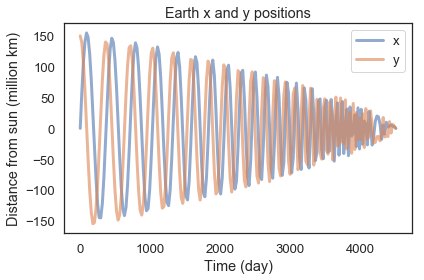

In [18]:
# And plotting
plot(x, label='x')
plot(y, label='y')

decorate(title="Earth x and y positions",
         xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

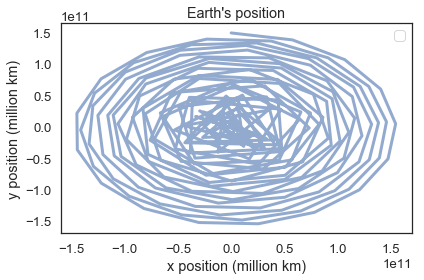

In [17]:
#x vs y plot

plot(results.x, results.y)
decorate(title="Earth's position",
         xlabel='x position (million km)',
         ylabel='y position (million km)')